# Board Game Behavior: An Analysis of Demographics and Gameplay Preferences

## Documentation

[Initial Project Proposal](https://github.com/sevenwwu/sevenwwu.github.io/blob/main/write-ups/initial_project_proposal_revised.md) (11/8/23)

[Milestone One](https://github.com/sevenwwu/sevenwwu.github.io/tree/main/write-ups/milestone_one_delieverable) (11/18/23)

## Data Processing and Modeling

In [645]:
!python -m pip install pandas
!python -m pip install openpyxl
!python -m pip install seaborn
!python -m pip install scikit-learn

### Data Cleaning

In [646]:
import pandas as pd
import numpy as np

raw_df = pd.read_excel("datasets/rawdata.xlsx",keep_default_na=False)

raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 22 columns):
 #   Column                                                                                                                                               Non-Null Count  Dtype         
---  ------                                                                                                                                               --------------  -----         
 0   ID                                                                                                                                                   244 non-null    int64         
 1   Start time                                                                                                                                           244 non-null    datetime64[ns]
 2   Completion time                                                                                                                                      2

##### Drop Metadata

In [647]:
dropped_df = raw_df.drop(columns=["ID","Start time","Completion time","Email","Name","Last modified time"])

dropped_df[:0]

Empty DataFrame
Columns: [I am a:, What is your Gender Identity?, What is your Age?
(this field may remain blank), What is your Race?, What is your current Employment Status?, Do you wear glasses or contact lenses for vision correction?, What best describes your current religious or spiritual beliefs, if any?
, What is your Area of Study or Major? 
(this field may remain blank)
, Do you enjoy playing board games, card games, or similar tabletop games?, How many board/card games do you own? 
(All non-roleplay table top games are included, i.e., chess, playing cards, Uno, Magic: The Gathering, etc.), About how frequently do you play board/card games?, Select what best describes your engagement and style when it comes to board and card games? , I prefer games that include elements of:
(select all that you prefer), List up to 15 board/card games that you enjoy playing. 
(abide by the format: "Game 1", "Game 2", "Game 3")
(this field may remain blank)
, On a scale from 1 to 10, how much do you enjoy playing chess, with 1 being not enjoyable at all and 10 being extremely enjoyable?, Select your all genres of board/card games you enjoy.
(if your preferred genre(s) is/are not listed, please list them in the "other" selection)]
Index: []

#### Rename Raw Fields from Question to Concise Description

In [648]:
renamed_df = dropped_df.rename(columns={
    "I am a:": "WWUStatus",
    "What is your Gender Identity?": "Gender",
    "What is your Age?\n(this field may remain blank)": "Age",
    "What is your Race?": "Race(s)",
    "What is your current Employment Status?": "EmploymentStatus",
    "Do you wear glasses or contact lenses for vision correction?": "Vision",
    "What best describes your current religious or spiritual beliefs, if any?\n": "Religiosity",
    "What is your Area of Study or Major? \n(this field may remain blank)\n": "AOS",
    "Do you enjoy playing board games, card games, or similar tabletop games?": "EnjoysBoardGames",
    "How many board/card games do you own? \n(All non-roleplay table top games are included, i.e., chess, playing cards, Uno, Magic: The Gathering, etc.)": "BoardGamesOwned",
    "About how frequently do you play board/card games?": "FrequencyOfPlay",
    "Select what best describes your engagement and style when it comes to board and card games? ": "Style",
    "I prefer games that include elements of:\n(select all that you prefer)": "PreferredElements",
    "List up to 15 board/card games that you enjoy playing. \n(abide by the format: \"Game 1\", \"Game 2\", \"Game 3\")\n(this field may remain blank)\n": "EnjoyedBoardGames",
    "On a scale from 1 to 10, how much do you enjoy playing chess, with 1 being not enjoyable at all and 10 being extremely enjoyable?": "ChessRating",
    "Select your all genres of board/card games you enjoy.\n(if your preferred genre(s) is/are not listed, please list them in the \"other\" selection)": "EnjoyedGenres"
})

renamed_df[:0]


Empty DataFrame
Columns: [WWUStatus, Gender, Age, Race(s), EmploymentStatus, Vision, Religiosity, AOS, EnjoysBoardGames, BoardGamesOwned, FrequencyOfPlay, Style, PreferredElements, EnjoyedBoardGames, ChessRating, EnjoyedGenres]
Index: []

#### Multiselect Binary/Boolean Features

##### Race(s)

In [649]:
renamed_df["Race(s)"].value_counts()

Race(s)
White;                                           185
Asian;                                            14
Hispanic or Latino;                                9
White;Asian;                                       6
White;Hispanic or Latino;                          5
Black or African American;White;                   4
White;Black or African American;                   3
White;Native Hawaiian or Pacific Islander;         2
Black or African American;                         2
Asian;Hispanic or Latino;                          2
Black or African American;White;Asian;             1
Black or African American;Hispanic or Latino;      1
White;Native American or American Indian;          1
Multiracial;                                       1
Mixed ethnicity;                                   1
Native American or American Indian;                1
Asian;Filipino;                                    1
Hispanic or Latino;White;                          1
Asian;White;                          

In [650]:
raceClean_df = renamed_df.copy()

unique_races = set()
for elements in raceClean_df["Race(s)"].dropna():
    unique_races.update(elements.split(";"))

unique_races = list(unique_races)
unique_races.sort()

In [651]:
# Create a new column for each unique element with binary values (0 or 1 or None)
for element in unique_races:
    raceClean_df[(element + "IsRace").replace(" ", "")] = raceClean_df["Race(s)"].apply(
        lambda x: int(element in x) if pd.notna(x) else None
    )

raceClean_df = raceClean_df.drop(columns={"Race(s)","IsRace"})

##### PreferredElements

In [652]:
raceClean_df["PreferredElements"].value_counts()

PreferredElements
Conflict/Competition;Strategy;                                                                                                                 7
Cooperation;Conflict/Competition;Luck;Strategy;Social Deduction/Hidden Role;Heavy/Immersive Theming;Puzzle-Solving;Trivia;Party/Low-Stakes;    6
Party/Low-Stakes;                                                                                                                              4
Conflict/Competition;Strategy;Trivia;                                                                                                          4
Cooperation;Conflict/Competition;Luck;Strategy;Puzzle-Solving;Party/Low-Stakes;                                                                3
                                                                                                                                              ..
Cooperation;Conflict/Competition;Strategy;Luck;                                                                 

In [653]:
preferredElementsClean_df = raceClean_df.copy()

unique_preferred_elements = set()
for elements in preferredElementsClean_df["PreferredElements"].dropna():
    unique_preferred_elements.update(elements.split(";"))
unique_preferred_elements

unique_preferred_elements = list(unique_preferred_elements)
unique_preferred_elements.sort()

In [654]:
# Create a new column for each unique element with binary values (0 or 1 or None)
for element in unique_preferred_elements:
    preferredElementsClean_df[(element + "IsPreferredElement").replace(" ", "")] = preferredElementsClean_df["PreferredElements"].apply(
        lambda x: int(element in x) if pd.notna(x) else None
    )

preferredElementsClean_df = preferredElementsClean_df.drop(columns={"PreferredElements","IsPreferredElement"})

##### EnjoyedGenres

In [655]:
enjoyedGenresClean_df = preferredElementsClean_df.copy()

unique_enjoyed_genres = set()
for elements in enjoyedGenresClean_df["EnjoyedGenres"].dropna():
    unique_enjoyed_genres.update(elements.split(";"))
unique_enjoyed_genres

unique_enjoyed_genres = list(unique_enjoyed_genres)
unique_enjoyed_genres.sort()

In [656]:
# Create a new column for each unique element with binary values (0 or 1 or None)
for element in unique_enjoyed_genres:
    enjoyedGenresClean_df[(element + "IsEnjoyedGenre").replace(" ", "")] = enjoyedGenresClean_df["EnjoyedGenres"].apply(
        lambda x: int(element in x) if pd.notna(x) else None
    )

enjoyedGenresClean_df = enjoyedGenresClean_df.drop(columns={"EnjoyedGenres","IsEnjoyedGenre"})

In [657]:
enjoyedGenresClean_df.columns.tolist()

['WWUStatus',
 'Gender',
 'Age',
 'EmploymentStatus',
 'Vision',
 'Religiosity',
 'AOS',
 'EnjoysBoardGames',
 'BoardGamesOwned',
 'FrequencyOfPlay',
 'Style',
 'EnjoyedBoardGames',
 'ChessRating',
 'AsianIsRace',
 'BlackorAfricanAmericanIsRace',
 'FilipinoIsRace',
 'HispanicorLatinoIsRace',
 'MixedethnicityIsRace',
 'MultiracialIsRace',
 'NativeAmericanorAmericanIndianIsRace',
 'NativeHawaiianorPacificIslanderIsRace',
 'PrefernottosayIsRace',
 'WhiteIsRace',
 'Conflict/CompetitionIsPreferredElement',
 'CooperationIsPreferredElement',
 'Heavy/ImmersiveThemingIsPreferredElement',
 'LuckIsPreferredElement',
 'Party/Low-StakesIsPreferredElement',
 'Puzzle-SolvingIsPreferredElement',
 'SocialDeduction/HiddenRoleIsPreferredElement',
 'StrategyIsPreferredElement',
 'TriviaIsPreferredElement',
 'AbstractStrategyIsEnjoyedGenre',
 'AdventureIsEnjoyedGenre',
 'AnimalsIsEnjoyedGenre',
 'AuctionIsEnjoyedGenre',
 'CardIsEnjoyedGenre',
 'CardDraftingIsEnjoyedGenre',
 'CivilizationIsEnjoyedGenre',
 '

In [658]:
reformatColumns_df = enjoyedGenresClean_df.rename(columns=lambda x: x.replace("\xa0", ""))

reformatColumns_df.columns.tolist()

['WWUStatus',
 'Gender',
 'Age',
 'EmploymentStatus',
 'Vision',
 'Religiosity',
 'AOS',
 'EnjoysBoardGames',
 'BoardGamesOwned',
 'FrequencyOfPlay',
 'Style',
 'EnjoyedBoardGames',
 'ChessRating',
 'AsianIsRace',
 'BlackorAfricanAmericanIsRace',
 'FilipinoIsRace',
 'HispanicorLatinoIsRace',
 'MixedethnicityIsRace',
 'MultiracialIsRace',
 'NativeAmericanorAmericanIndianIsRace',
 'NativeHawaiianorPacificIslanderIsRace',
 'PrefernottosayIsRace',
 'WhiteIsRace',
 'Conflict/CompetitionIsPreferredElement',
 'CooperationIsPreferredElement',
 'Heavy/ImmersiveThemingIsPreferredElement',
 'LuckIsPreferredElement',
 'Party/Low-StakesIsPreferredElement',
 'Puzzle-SolvingIsPreferredElement',
 'SocialDeduction/HiddenRoleIsPreferredElement',
 'StrategyIsPreferredElement',
 'TriviaIsPreferredElement',
 'AbstractStrategyIsEnjoyedGenre',
 'AdventureIsEnjoyedGenre',
 'AnimalsIsEnjoyedGenre',
 'AuctionIsEnjoyedGenre',
 'CardIsEnjoyedGenre',
 'CardDraftingIsEnjoyedGenre',
 'CivilizationIsEnjoyedGenre',
 '

#### AOS (manual string bucketing)

In [659]:
aos_df = reformatColumns_df
aos_df["AOS"].str.lower().unique()

array(['computer science ', 'data science ', 'data science', 'eece',
       'electrical and computer engineering ', 'statistics',
       'environmental studies', 'applied mathematics', 'chemistry', 'rml',
       'political science', 'elementary education', 'english',
       'music education', 'n/a', 'art', 'psychology', '',
       'psych (probably)', 'music', 'environmental science - toxicology',
       'history/museum studies', 'elementary ed',
       'environmental science ', 'mathematics ', 'business', 'biochem ',
       'vocal performance ', 'secondary education ', 'business ',
       'linguistics', 'history', 'bio/anth', 'mathematics',
       'marine biology ', 'environmental science',
       'communication disorders', 'engineering ', 'biochem',
       'kinesiology', 'economics and mathematics',
       'music education and german', 'art p-12',
       'chemistry either organic or inorganic', 'math',
       'electrical engineering',
       'undecided but leaning towards engineering'

In [660]:
manual_mapping_aos = {
    "computer science": "STEM",
    "data science": "STEM",
    "eece": "STEM",
    "electrical and computer engineering": "STEM",
    "statistics": "STEM",
    "environmental studies": "STEM",
    "applied mathematics": "STEM",
    "chemistry": "STEM",
    "rml": "Other",
    "political science": "Social Studies",
    "elementary education": "Education",
    "english": "Arts & Humanities",
    "music education": "Arts & Humanities",
    "nan": "Other",
    "art": "Arts & Humanities",
    "psychology": "Social Studies",
    "psych (probably)": "Social Studies",
    "music": "Arts & Humanities",
    "environmental science - toxicology": "STEM",
    "history/museum studies": "Arts & Humanities",
    "elementary ed": "Education",
    "environmental science": "STEM",
    "mathematics": "STEM",
    "business": "Business",
    "biochem": "STEM",
    "vocal performance": "Arts & Humanities",
    "secondary education": "Education",
    "linguistics": "Arts & Humanities",
    "history": "Arts & Humanities",
    "bio/anth": "STEM",
    "marine biology": "STEM",
    "communication disorders": "Health & Medicine",
    "engineering": "STEM",
    "kinesiology": "Health & Medicine",
    "economics and mathematics": "STEM",
    "music education and german": "Arts & Humanities",
    "art p-12": "Arts & Humanities",
    "chemistry either organic or inorganic": "STEM",
    "math": "STEM",
    "electrical engineering": "STEM",
    "undecided but leaning towards engineering": "Unknown",  # Assuming lean towards STEM, but no exact match
    "medicine": "Health & Medicine",
    "rec management": "Other",  # Assuming Recreation Management
    "economics": "Social Studies",  # Close to "economics and mathematics", but economics is often considered Social Studies
    "geology": "STEM",
    "geology (paleoclimate)": "STEM",
    "visual journalism": "Arts & Humanities",
    "biology/math": "STEM",  # Combination of two STEM fields
    "behavioral neuroscience": "STEM",  # Close to "psychology" which is Social Studies, but has a heavy STEM component
    "marine biology and theater production": "STEM",  # Marine biology is STEM, theater production could be Arts, but STEM is the primary
    "anthropology": "Social Studies",
    "biology": "STEM",
    "management information systems": "Business",
    "marine bio": "STEM",
    "history/holocaust & genocide studies": "Arts & Humanities",
    "sped & eled": "Education",  # Assuming this refers to special education & elementary education
    "anthropology, communication studies": "Social Studies",
    "theatre": "Arts & Humanities",
    "studio art": "Arts & Humanities",
    "urban planning and sustainable development": "Other",  # Not a clear category, could be Social Studies or another category
    "art and design": "Arts & Humanities",
    "spanish": "Arts & Humanities",  # Language studies are often classified here
    "biochemistry": "STEM",
    "art studio": "Arts & Humanities",
    "art ed": "Arts & Humanities",
    "comm": "Other",  # Assuming "communication", but not explicitly listed, could fit Social Studies or Business,
    
    "environmental studies: eco-social justice and education emphasis": "STEM",  # Falls under Environmental Studies
    "communications": "Other",  # Often classified as Arts & Humanities
    "theatre/education": "Education",  # Falls under Education
    "undecided": "Unknown",  # Assuming still undecided as before
    "marketing": "Business",  # Falls under Business
    "communication studies": "Arts & Humanities",  # Often classified as Arts & Humanities
    "sociology": "Social Studies",  # Social Studies
    "education and public relations": "Education",  # Falls under Education
    "pre nursing": "Health & Medicine",  # Falls under Health & Medicine
    "economics/mathematics": "STEM",  # Combination of Economics and Mathematics - falls under STEM
    "mathematics secondary education": "Education",  # Falls under Education
    "dance": "Arts & Humanities",  # Often classified as Arts & Humanities
    "art studio (ba), art history": "Arts & Humanities",  # Falls under Arts & Humanities
    "narrative and folklore studies (fairhaven major)": "Arts & Humanities",  # Falls under Arts & Humanities
    "pre med and psychology": "Health & Medicine",  # Falls under Health & Medicine
    "archaeology": "Social Studies",  # Falls under Social Studies
    "neuroscience": "STEM",  # Falls under STEM
    "english literature with a teaching emphasis": "Arts & Humanities",  # Falls under Arts & Humanities
    "marine science": "STEM",  # Falls under STEM
    "fairhaven": "Other",  # Falls under Other
    "international business": "Business",  # Falls under Business
    "music composition": "Arts & Humanities",  # Falls under Arts & Humanities
    "creative writing": "Arts & Humanities",  # Falls under Arts & Humanities
    "business and sustainability": "Business",  # Falls under Business
    "early childhood education": "Education",  # Falls under Education
    "graphic design": "Arts & Humanities",  # Falls under Arts & Humanities
    "education": "Education",  # Falls under Education
    "stem": "STEM",  # Falls under STEM
    "envs": "STEM",  # Falls under STEM

    
    "behavioural neuroscience": "STEM",
    "english lit": "Arts & Humanities",
    "food equity and sustainable agriculture": "Other",  # Could be Social Studies, Business, or even STEM, unclear
    "art history and museum studies": "Arts & Humanities",
    "japanese language": "Arts & Humanities",
    "graphic design and marketing": "Arts & Humanities",  # Graphic Design is often in Arts & Humanities, Marketing is Business, but first seems primary
    "music performance major": "Arts & Humanities",
    "environment studies": "STEM",
    "business or elementary education": "Unknown",  # Could be either Business or Education 
    "marine and coastal science": "STEM",
    "undeclared, strongly thinking about history": "Unknown",  # Assuming lean towards Arts & Humanities, but no exact match
    "public health": "Health & Medicine",
    "energy policy and management": "Other",  # Could be Business, Social Studies, or STEM
    "undeclared": "Unknown",
    "fine arts": "Arts & Humanities",
    "english, history of culture": "Arts & Humanities",
    "psychology and elementary education": "Education",  # Both Psychology and Elementary Education could be Education
    "communication science and disordwrs": "Health & Medicine",
    "anthropology/history": "Social Studies",
    "special education and elementary education": "Education",
    "ibus": "Business",  # Assuming International Business
    "energy science": "STEM",
    "politics/philosophy/economics": "Social Studies",  # Combination of three Social Studies fields
    "history/social studies": "Social Studies",
    "energy": "STEM"  # Energy could be a part of STEM disciplines like Physics or Environmental Sciences
}


noncategorized_data = []

def categorize_aos_string(aos):
    if pd.isnull(aos) or aos == "n/a" or aos == "" or aos == "N/A":
        return "Unknown"  # For handling NaN values
    field_clean = aos.lower().rstrip()
    for key, category in manual_mapping_aos.items():
        if key == field_clean:
            return category
    noncategorized_data.append(field_clean)    


aos_df["AOSCat"] = aos_df["AOS"].apply(categorize_aos_string)

if (len(noncategorized_data) > 0):
    raise ValueError(f"Unknown categories: {noncategorized_data}") 

aos_df["AOSCat"].unique()

array(['STEM', 'Other', 'Social Studies', 'Education',
       'Arts & Humanities', 'Unknown', 'Business', 'Health & Medicine'],
      dtype=object)

#### Shorting the Length of Single Select Answer Choices for "Style"

In [661]:
style_df = aos_df 

style_df["Style"].unique()

array(['Not interested in playing board/card games.',
       'Party-only player, primarily playing board/card games at social gatherings or parties.',
       'Strategy-focused player, enjoying games that require planning and tactics, but also participates in more casual games.',
       'Situation-Specific Player, adapts style and enthusiasm based on the specific game or social context. May be casual in some situations and highly strategic in others, depending on the game being played.',
       'None of these describe me.',
       'Casual player, participating for fun and relaxation, without a strong focus on winning. Still willing to engage with complex games.',
       'Simple and straightforward player, preferring uncomplicated games with easy rules.'],
      dtype=object)

In [662]:
player_styles_mapping = {
    "Strategy-focused player, enjoying games that require planning and tactics, but also participates in more casual games.": "Strategic",
    "Situation-Specific Player, adapts style and enthusiasm based on the specific game or social context. May be casual in some situations and highly strategic in others, depending on the game being played.": "Situation-Specific",
    "Casual player, participating for fun and relaxation, without a strong focus on winning. Still willing to engage with complex games.": "Casual",
    "Simple and straightforward player, preferring uncomplicated games with easy rules.": "Simple",
    "Party-only player, primarily playing board/card games at social gatherings or parties.": "Party/Social",
    "Not interested in playing board/card games.": "Not Interested",
    "Never played or never had the opportunity to play board/card games.": "Never Played",
    "None of these describe me.": "Other",
    "Prefer not to say": "Prefer not to say"
}

def map_player_styles(string):
    for key, val in player_styles_mapping.items():
        if key in string:
            return val
    raise ValueError(f"Unknown category: {string}") 

new_style_df = style_df.copy()

new_style_df["Style"] = style_df["Style"].apply(map_player_styles)

new_style_df["Style"].unique()

array(['Not Interested', 'Party/Social', 'Strategic',
       'Situation-Specific', 'Other', 'Casual', 'Simple'], dtype=object)

#### Assigning Order to Particular Catagories

In [663]:
cat_order_df = new_style_df.copy()

cat_order_df["BoardGamesOwned"] = cat_order_df["BoardGamesOwned"].apply(lambda x: "0" if x == "I do not own any board/card games.\xa0" else x)

cat_order_df["BoardGamesOwned"] = pd.Categorical(cat_order_df["BoardGamesOwned"],
    categories=["Prefer not to say","0", "1 or 2", "2 to 5", "5 to 10", "10 to 20", "More than 20"],ordered=True)


cat_order_df["FrequencyOfPlay"] = pd.Categorical(cat_order_df["FrequencyOfPlay"],
    categories=["Daily","Several times a week","Weekly","Several times a month","Monthly","Every few months","Rarely/Seldom","Never","Prefer not to say",],ordered=True)


cat_order_df["ChessRating"] = cat_order_df["ChessRating"].apply(lambda x: "Unknown" if x == "" else x)

cat_order_df["ChessRating"] = pd.Categorical(cat_order_df["ChessRating"].astype(str),
    categories=["Unknown","1","2","3","4","5","6","7","8","9","10"], ordered=True)


#### Convert Features to Int

In [664]:
convert_df = cat_order_df.copy()
convert_df["Age"] = convert_df["Age"].apply(lambda x: -1 if x == "" else x)
convert_df["Age"] = convert_df["Age"].astype(int)

In [665]:
cleaned_df = convert_df

cleaned_df.to_csv("datasets/cleaned.csv")

### Exploratory Data Analysis

In [666]:
single_select_features = ['WWUStatus', 'Gender', 'Age', 'EmploymentStatus', 'Vision',
       'Religiosity', 'AOSCat', 'EnjoysBoardGames', 'BoardGamesOwned',
       'FrequencyOfPlay', 'Style', 'ChessRating']

race_bool_features = ['WhiteIsRace','AsianIsRace', 'BlackorAfricanAmericanIsRace', 'FilipinoIsRace',
       'HispanicorLatinoIsRace','MixedethnicityIsRace', 'MultiracialIsRace', 'NativeAmericanorAmericanIndianIsRace',
       'NativeHawaiianorPacificIslanderIsRace', 'PrefernottosayIsRace',]
       
element_bool_features = ['Conflict/CompetitionIsPreferredElement',
       'CooperationIsPreferredElement',
       'Heavy/ImmersiveThemingIsPreferredElement', 'LuckIsPreferredElement',
       'Party/Low-StakesIsPreferredElement',
       'Puzzle-SolvingIsPreferredElement',
       'SocialDeduction/HiddenRoleIsPreferredElement',
       'StrategyIsPreferredElement', 'TriviaIsPreferredElement',]

genre_bool_features = ['AbstractStrategyIsEnjoyedGenre', 'AdventureIsEnjoyedGenre',
       'AnimalsIsEnjoyedGenre', 'AuctionIsEnjoyedGenre', 'CardIsEnjoyedGenre',
       'CardDraftingIsEnjoyedGenre', 'CivilizationIsEnjoyedGenre',
       'CooperativeIsEnjoyedGenre', 'Deck-BuildingIsEnjoyedGenre',
       'DeductionIsEnjoyedGenre', 'EconomicIsEnjoyedGenre',
       'EducationalIsEnjoyedGenre', 'ExplorationIsEnjoyedGenre',
       'FantasyIsEnjoyedGenre', 'FarmingIsEnjoyedGenre',
       'FightingIsEnjoyedGenre', 'HorrorIsEnjoyedGenre', 'LuckIsEnjoyedGenre',
       'MedievalIsEnjoyedGenre', 'MemoryIsEnjoyedGenre',
       'MiniaturesIsEnjoyedGenre', 'PartyIsEnjoyedGenre',
       'PiratesIsEnjoyedGenre', 'PoliticalIsEnjoyedGenre',
       'PuzzleIsEnjoyedGenre', 'RacingIsEnjoyedGenre',
       'Role-PlayingIsEnjoyedGenre', 'RollandMoveIsEnjoyedGenre',
       'ScienceFictionIsEnjoyedGenre',
       'SocialDeduction/HiddenRoleIsEnjoyedGenre', 'SportsIsEnjoyedGenre',
       'StrategyIsEnjoyedGenre', 'TerritoryBuildingIsEnjoyedGenre',
       'Tile-LayingIsEnjoyedGenre', 'TrainsIsEnjoyedGenre',
       'TransportationIsEnjoyedGenre', 'TravelIsEnjoyedGenre',
       'TriviaIsEnjoyedGenre', 'WarIsEnjoyedGenre', 'WordIsEnjoyedGenre',
       'WorkerPlacementIsEnjoyedGenre', 'WorldWarIIIsEnjoyedGenre',
       'ZombiesIsEnjoyedGenre',]

free_form_features = ['AOS','EnjoyedBoardGames']


In [667]:
len(cleaned_df.columns)

76

In [668]:
len(single_select_features + race_bool_features + element_bool_features + genre_bool_features + free_form_features)

76

In [669]:
cleaned_df["Religiosity"].value_counts()

Religiosity
Atheism                                                        59
No specific belief                                             55
Agnosticism                                                    49
Christianity                                                   32
Spiritual, not affiliated with a specific religion             31
Judaism                                                         4
Prefer not to say                                               2
Pagan                                                           1
Islam                                                           1
Toaism                                                          1
Lutheran                                                        1
Hinduism                                                        1
Buddhism                                                        1
pagan                                                           1
Unitarian                                                       

In [670]:
religious_bucketing = {
    "Christianity": "Religious",
    "Judaism": "Religious",
    "Islam": "Religious",
    "Hinduism": "Religious",
    "Buddhism": "Religious",
    "Lutheran": "Religious",
    "Pagan": "Religious",
    "Paganism": "Religious",
    "Unitarian": "Religious",
    "I believe a god exists but don’t follow any religious texts": "Religious",
    "Toaism": "Religious",
    "pagan": "Religious",

    "Atheism": "Not Religious",
    "No specific belief": "Not Religious",
    "Agnosticism": "Not Religious",
    "Spiritual, not affiliated with a specific religion": "Not Religious",
    "Science": "Not Religious",
    "being with oneself in connection to everything": "Not Religious",
    "Prefer not to say": "Not Religious",
}

#### Defining Functions for Analyzing Categorical Data

In [671]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import pandas as pd



def categories_against_category(df, categories, category):
    for feature in categories:
        print(df.groupby(category)[feature].value_counts())
        # Compute percentage for each category within each cluster
        df_percent = df.groupby(category)[feature].value_counts(normalize=True).rename('Percentage').reset_index()
        df_percent["Percentage"] *= 100  # Convert to %

        # Create seaborn barplot
        plt.figure(figsize=(8, 6))
        sns.barplot(x=feature, y='Percentage', hue=category, data=df_percent)
        plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
        plt.xticks(rotation=90)
        plt.show()

def bools_against_category(df,bools,category):
    # Initialize an empty dataframe to store your percentages
    percentages = pd.DataFrame()

    # Loop through the bool_columns 
    for col in bools:
        # Compute the percentages of True (=1) occurrences in each cluster
        percents = df.groupby(category,observed=True)[col].mean().mul(100).reset_index()
        percents['Feature'] = col
        percents.rename({col: 'Percentage'}, axis=1, inplace=True)

        # Append the computed percentages to your dataframe
        percentages = pd.concat([percentages, percents])

    # Once your dataframe is ready, you can plot it using seaborn
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Feature', y='Percentage', hue=category, data=percentages)
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.xticks(rotation=90)
    plt.title(f"Percentage of 'True' Occurrences in Each Feature by {category}")
    plt.show()

# Intended for single-select/categorical feature comparison
# `x` should be a Panda Series
# `y` should be a Panda Series
def plot_count_and_percentage_heatmaps(x, y):
    data = pd.DataFrame({x.name: x, y.name: y})

    count_matrix = pd.crosstab(data[x.name], data[y.name])
    
    percent_matrix = count_matrix.div(count_matrix.sum(axis=1), axis=0) * 100

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Heatmap for counts
    sns.heatmap(count_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=True, ax=ax[0])
    ax[0].set_title("Count Matrix of Categories")
    ax[0].set_xlabel(y.name)
    ax[0].set_ylabel(x.name)

    # Heatmap for percentages
    sns.heatmap(percent_matrix, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, ax=ax[1],vmin=0.0, vmax=100.0)
    ax[1].set_title("Percentage Matrix of Categories")
    ax[1].set_xlabel(y.name)
    ax[1].set_ylabel(x.name)

    plt.tight_layout()
    plt.show()

# Intended for categorical feature comparison against several bool fields
# `data` should be a Pandas Data Frame
# `x` should be a string that refers to the categorical feature in `data`
# `y` should be an array of strings that refer to the several bool features in `data`
def plot_heatmap_of_bool_features_percent(data, x, y):
    df_melted = data.melt(id_vars=x, value_vars=y, var_name="Bool", value_name="True")

    df_pivot = df_melted.groupby([x,"Bool"]).sum().reset_index().pivot(index=x, columns="Bool", values="True")

    total = data[x].value_counts()

    df_pivot = df_pivot.join(total)
    

    df_pivot.loc[:, df_pivot.columns != "count"] = ((df_pivot.loc[:, df_pivot.columns != "count"].div(df_pivot["count"], axis=0)) * 100).round(4)
    
    print(df_pivot["count"])
    df_pivot = df_pivot.drop(columns=["count"])
    
    df_pivot = df_pivot.transpose()

    sns.heatmap(df_pivot, annot=True, cmap="Blues", fmt=".2f",vmin=0.0, vmax=100.0)

# Intended for categorical feature comparison against several bool fields
# `data` should be a Pandas Data Frame
# `x` should be a string that refers to the categorical feature in `data`
# `y` should be an array of strings that refer to the several bool features in `data`
def plot_heatmap_of_bool_features_val_count(data, x, y):
    df_melted = data.melt(id_vars=x, value_vars=y, var_name="Bool", value_name="True")

    df_pivot = df_melted.groupby([x,"Bool"]).sum().reset_index().pivot(index=x, columns="Bool", values="True")

    total = data[x].value_counts()

    df_pivot = df_pivot.join(total)
    
    df_pivot.rename(columns={"count": "UniqueMembersOfParticular" + x}, inplace=True)
    
    df_pivot = df_pivot.transpose()
    # Plot
    sns.heatmap(df_pivot, annot=True, cmap="Blues", fmt=".2f")

# Used to reduce the number of categories in a feature by setting the value to "Other" for insufficient response quantity of specific catagories
# `df` should be a Pandas Data Frame
# `col_name` should be the string name of the column/feature you'd like to filter
# `threshold` should be the minimum count needed to maintain the categorical variable 

# For example, if `Age` gets a bunch of responses between 18 and 24, and you get a few 40s and one 60. You can use this function to reduce the 
# different categorical variables to simply 18 through 24 and "Other"
def filter_threshold(df, col_name, threshold):
    df_copy = df.copy() 
    counts = df_copy[col_name].value_counts()
    df_copy.loc[df_copy[col_name].isin(counts[counts < threshold].index), col_name] = "Other"
    return df_copy

#### Distribution of Features

The following code is used to filter out feature responses that are underrepresented or minimal in survey data, thus preventing inaccurate conclusions that could arise from only looking at a small sample of a population. Most of features graphed below have at least two prominent catagories for which to perform data analysis, which is sufficient. This includes:

- Gender
- Age (within the range of 18 to 24)
- Employment Status (at least for Part-Time and Unemployed)
- Vision
- Area of Study Catagories
- Number of Board Games Owned
- Frequency of Play
- Style
- Chess Rating

However, a few fields did not get sufficient diverse responses to conclude anything, this includes:
- WWU Status
  - Nearly everyone who took this survey was a student
- Religiosity
  - Most people who filled out this survey were secular, and the largest minority religious group is simply too small to make any meaningful conclusions
- Does person enjoys board games
  - The overwhelming majority of people who filled out this survey liked playing board games making relationships between demographics hard to draw

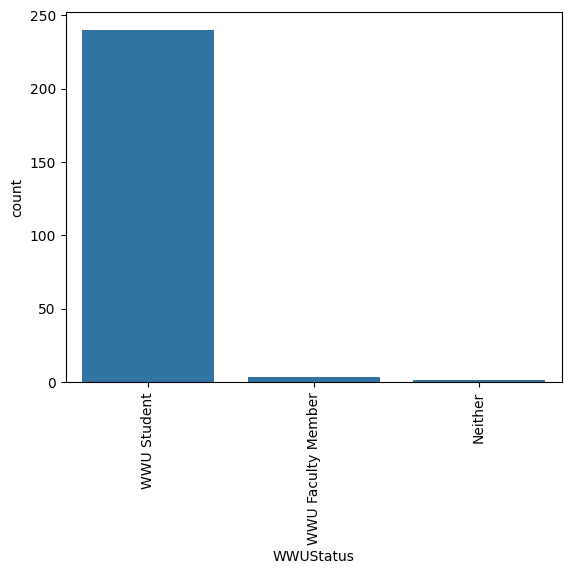

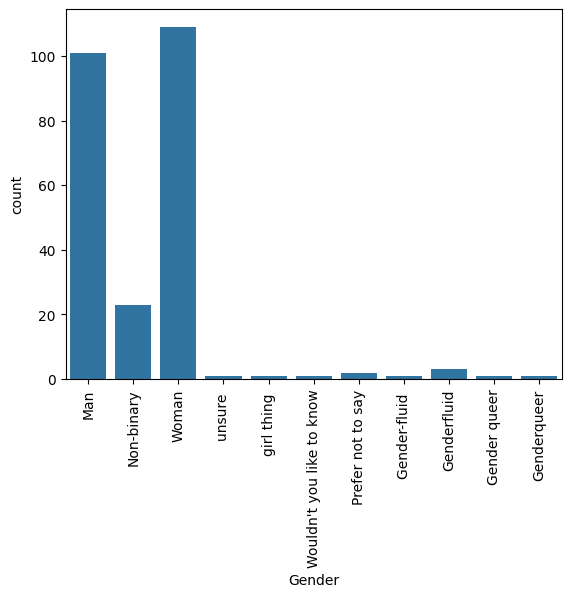

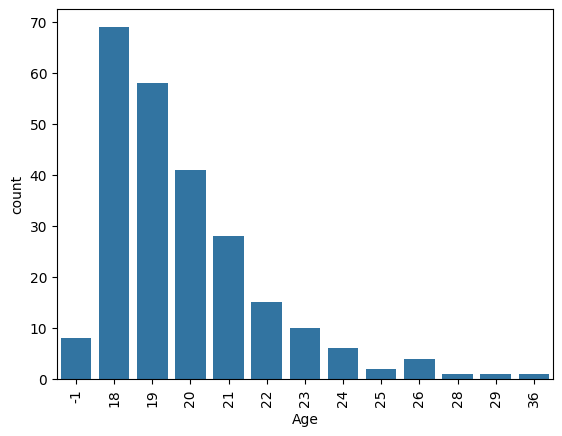

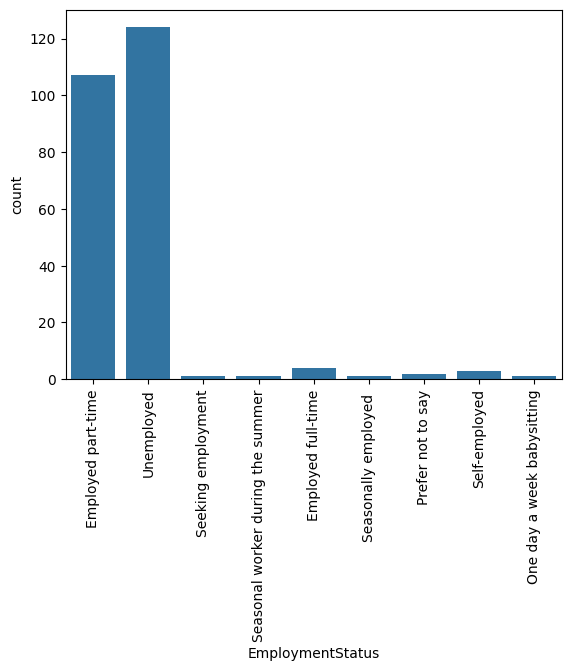

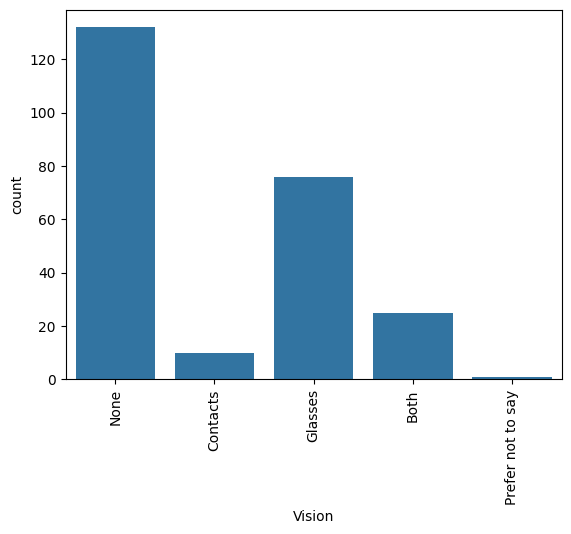

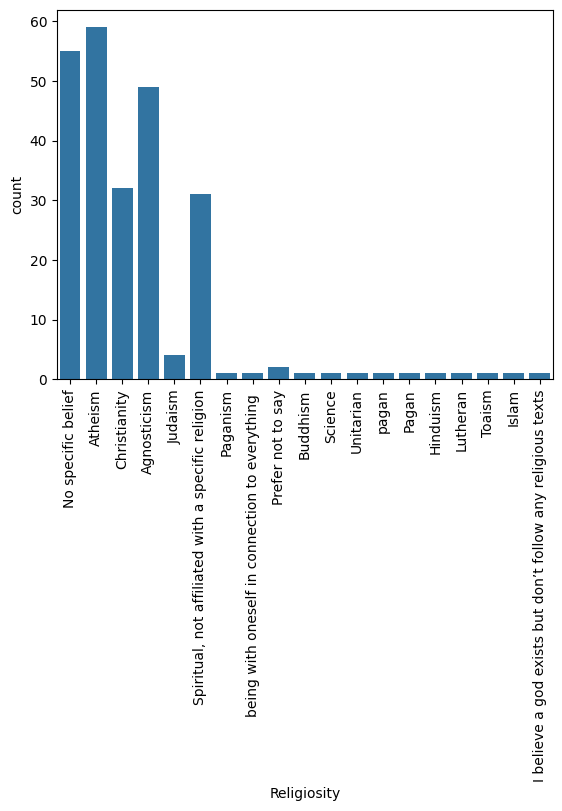

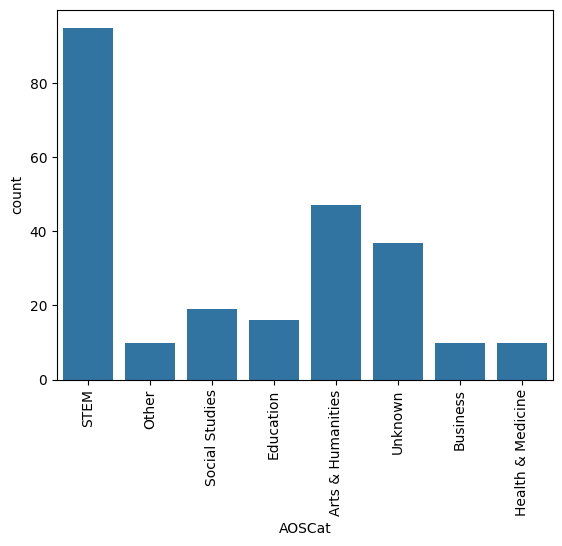

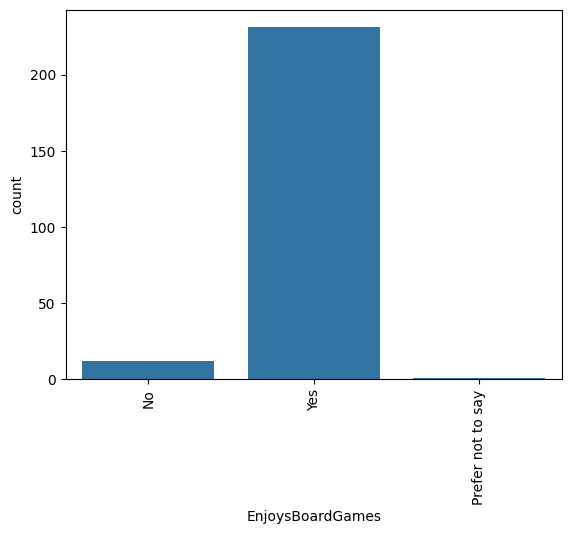

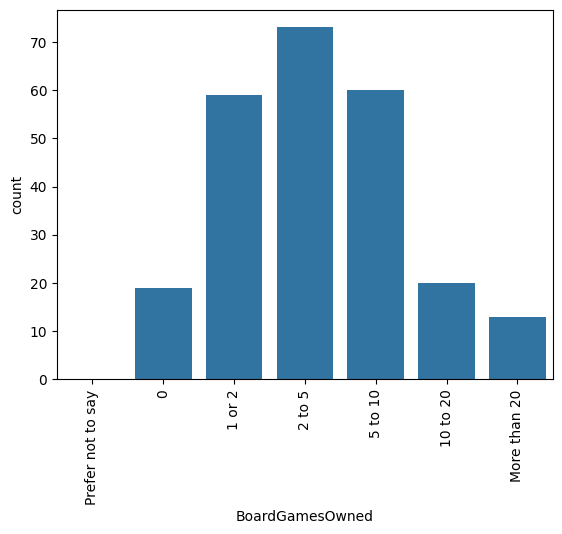

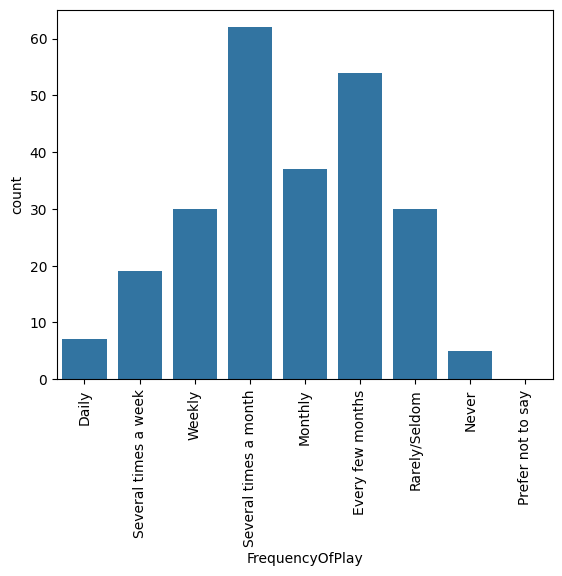

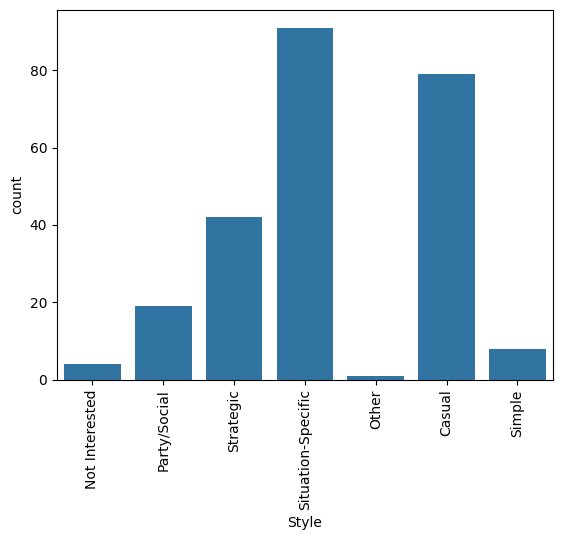

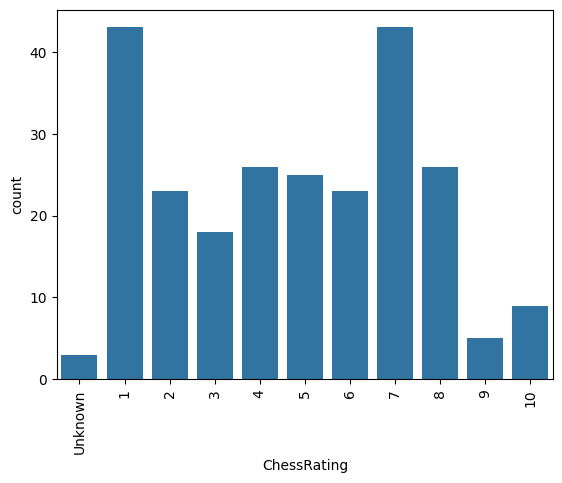

In [672]:
for feature in single_select_features:
    sns.countplot(x=feature, data=cleaned_df)
    plt.xticks(rotation=90) 
    plt.show()

#### Distribution of Features (cont'd)

The following questions were multi-select and resulted in bool fields. Because of this, we need to display the data slightly differently: totalling all "True"/selected values from the related features.

The multi-select questions were in regard to Race, Preferred Gameplay Elements, and Enjoyed Genres.

Preferred Gameplay Elements and Enjoyed Genres got a sufficient distribution of responses, however, Race did not receive sufficiently diverse responses for analysis.

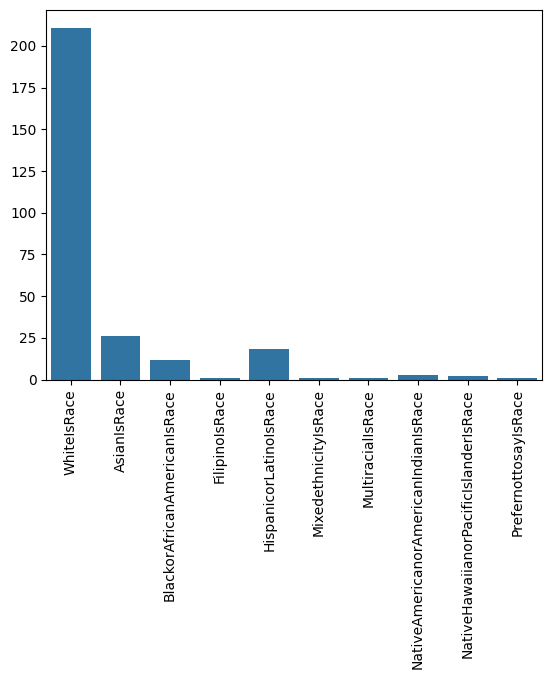

In [673]:
true_counts = {}

for col in race_bool_features:
    true_counts[col] = cleaned_df[cleaned_df[col] == 1].shape[0]

true_counts_series = pd.Series(true_counts)

sns.barplot(true_counts_series)
plt.xticks(rotation=90)
plt.show()

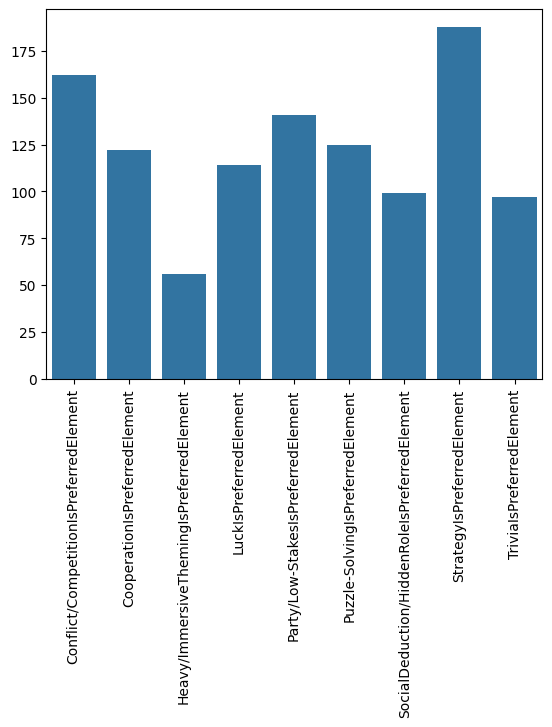

In [674]:
true_counts = {}

for col in element_bool_features:
    true_counts[col] = cleaned_df[cleaned_df[col] == 1].shape[0]

true_counts_series = pd.Series(true_counts)

sns.barplot(true_counts_series)
plt.xticks(rotation=90)
plt.show()

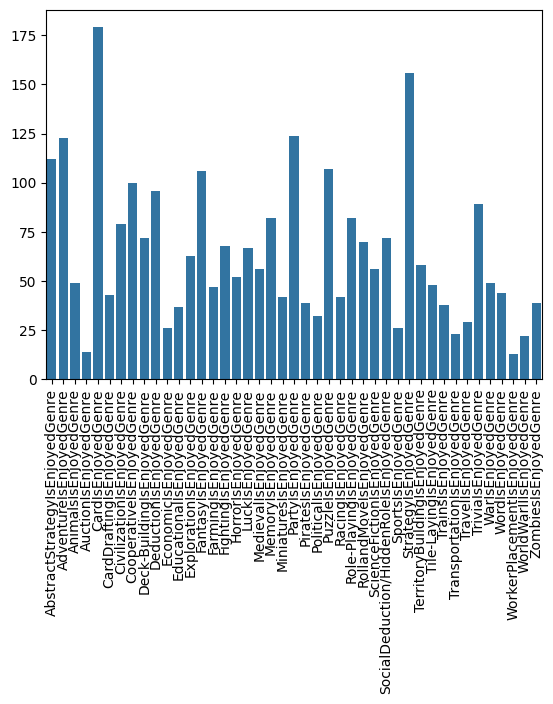

In [675]:
true_counts = {}

for col in genre_bool_features:
    true_counts[col] = cleaned_df[cleaned_df[col] == 1].shape[0]

true_counts_series = pd.Series(true_counts)

sns.barplot(true_counts_series)
plt.xticks(rotation=90)
plt.show()

#### (Random) Exploratory Analysis

This section is dedicated to graphing random sufficient features against one another in hopes of uncovering hidden relationships.

In [676]:
# There were many different responses for various types of non-binary gender identities, because of this, graphing the data becomes a bit muddled
# This is solved by grouping the non-binary responses into an "Other" category
genderForAnalysis_df = filter_threshold(cleaned_df,"Gender",25)
genderForAnalysis_df["Gender"].value_counts()

Gender
Woman    109
Man      101
Other     34
Name: count, dtype: int64

In [677]:
genderForAnalysis_df = genderForAnalysis_df[genderForAnalysis_df["Gender"] != "Other"]

Gender  WWUStatus         
Man     WWU Student            98
        WWU Faculty Member      2
        Neither                 1
Woman   WWU Student           108
        WWU Faculty Member      1
Name: count, dtype: int64


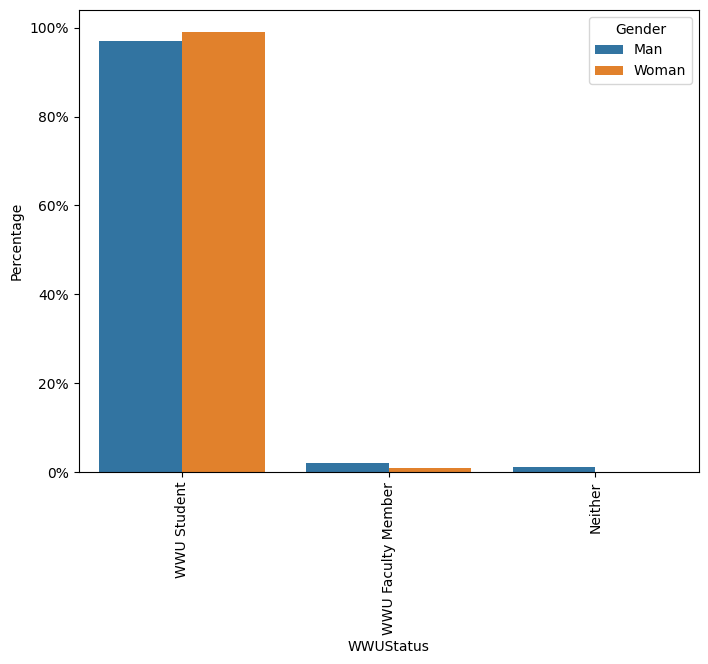

Gender
Man      101
Woman    109
Name: count, dtype: int64


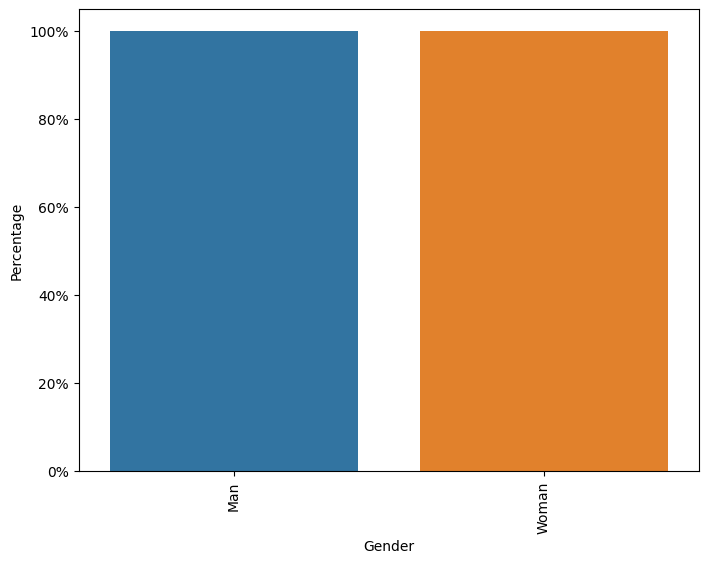

Gender  Age
Man      18    28
         19    23
         20    16
         21    11
         22     6
         23     6
        -1      5
         26     3
         24     2
         25     1
Woman    18    29
         19    23
         20    21
         21    15
         22     8
         23     4
         24     4
        -1      1
         25     1
         28     1
         29     1
         36     1
Name: count, dtype: int64


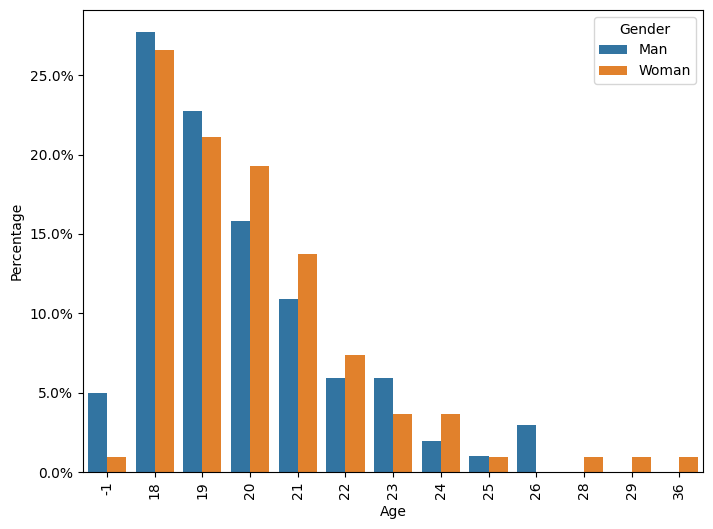

Gender  EmploymentStatus                 
Man     Unemployed                           51
        Employed part-time                   45
        Employed full-time                    2
        Seasonal worker during the summer     1
        Seeking employment                    1
        Self-employed                         1
Woman   Unemployed                           53
        Employed part-time                   50
        Prefer not to say                     2
        Employed full-time                    1
        One day a week babysitting            1
        Seasonally employed                   1
        Self-employed                         1
Name: count, dtype: int64


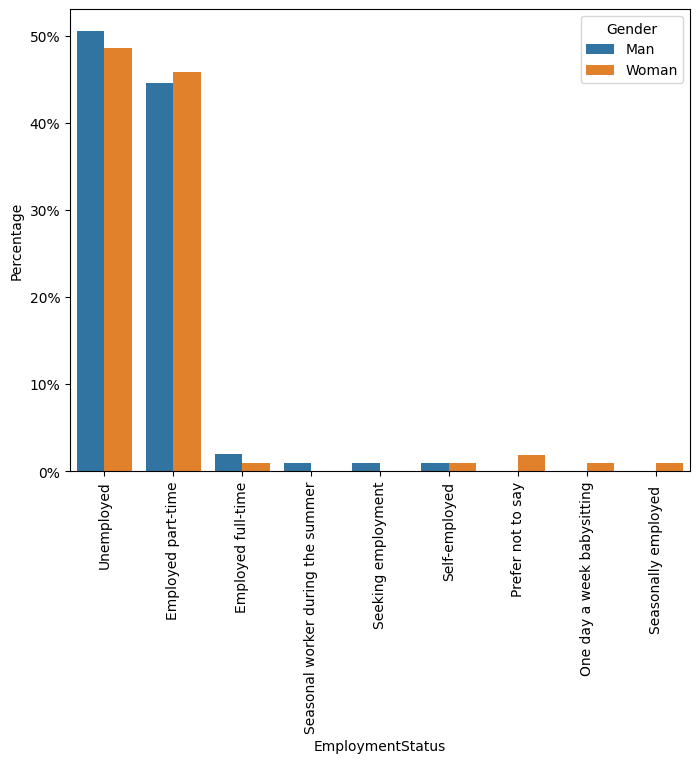

Gender  Vision           
Man     None                 61
        Glasses              27
        Both                  7
        Contacts              5
        Prefer not to say     1
Woman   None                 55
        Glasses              31
        Both                 18
        Contacts              5
Name: count, dtype: int64


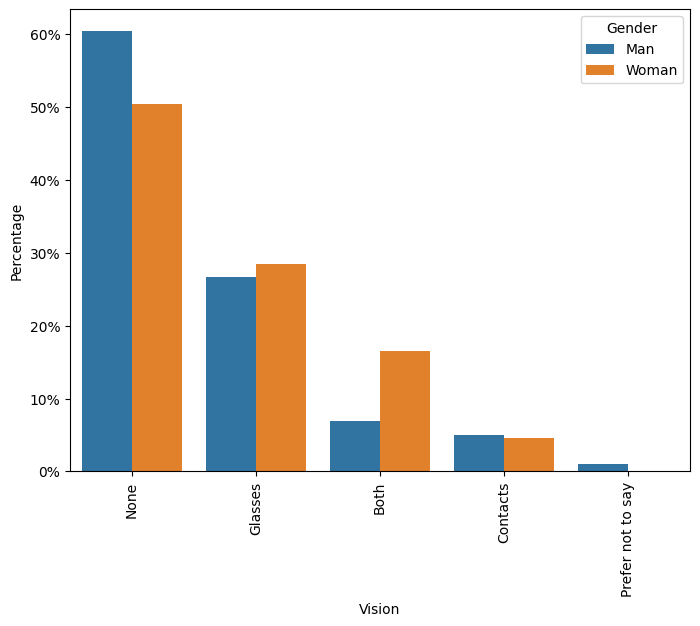

Gender  Religiosity                                                
Man     Agnosticism                                                    26
        Atheism                                                        25
        No specific belief                                             24
        Christianity                                                   12
        Spiritual, not affiliated with a specific religion              6
        Judaism                                                         3
        Toaism                                                          1
        Science                                                         1
        Prefer not to say                                               1
        Islam                                                           1
        Buddhism                                                        1
Woman   No specific belief                                             26
        Atheism                             

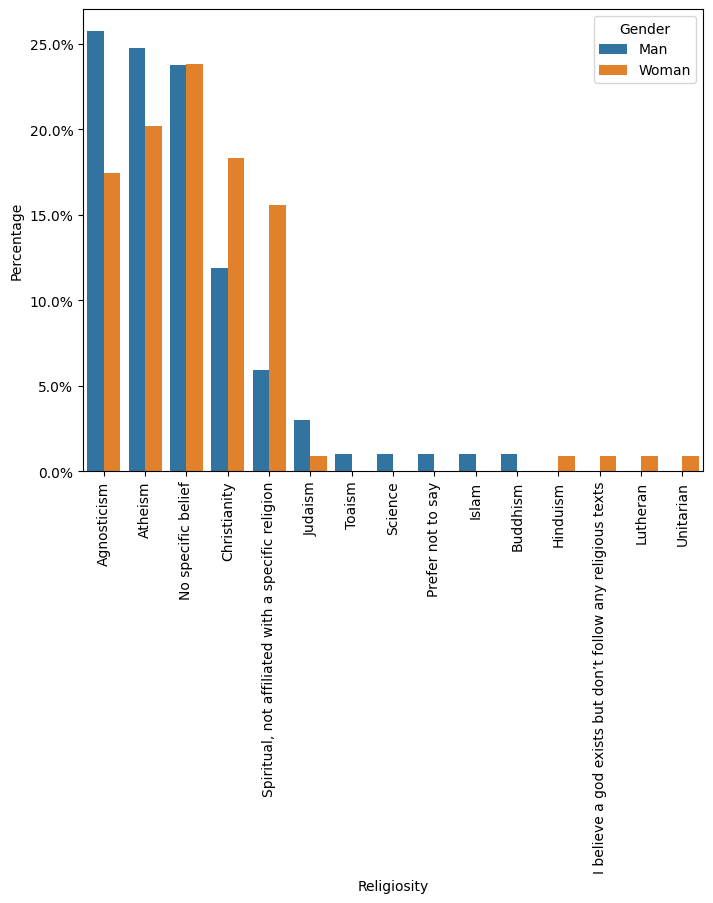

Gender  AOSCat           
Man     STEM                 48
        Arts & Humanities    16
        Unknown              14
        Social Studies        7
        Business              6
        Education             5
        Other                 3
        Health & Medicine     2
Woman   STEM                 35
        Arts & Humanities    21
        Unknown              16
        Education            10
        Health & Medicine     8
        Social Studies        8
        Other                 7
        Business              4
Name: count, dtype: int64


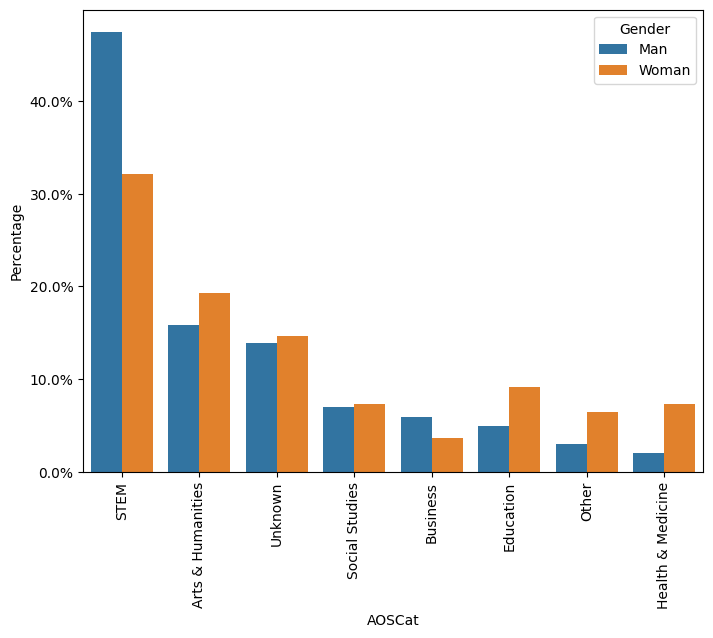

Gender  EnjoysBoardGames 
Man     Yes                   93
        No                     8
Woman   Yes                  106
        No                     2
        Prefer not to say      1
Name: count, dtype: int64


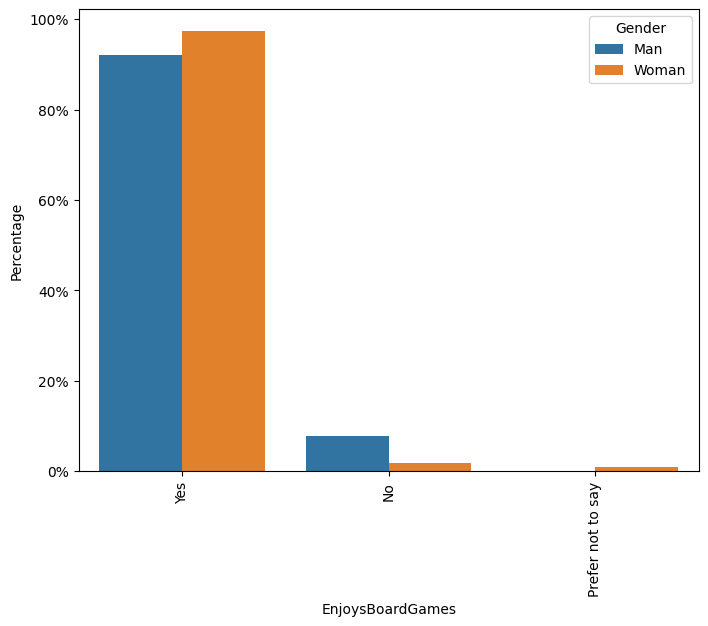

Gender  BoardGamesOwned  
Man     2 to 5               29
        1 or 2               24
        5 to 10              24
        0                    10
        10 to 20              7
        More than 20          7
        Prefer not to say     0
Woman   5 to 10              34
        2 to 5               31
        1 or 2               27
        10 to 20              9
        0                     4
        More than 20          4
        Prefer not to say     0
Name: count, dtype: int64


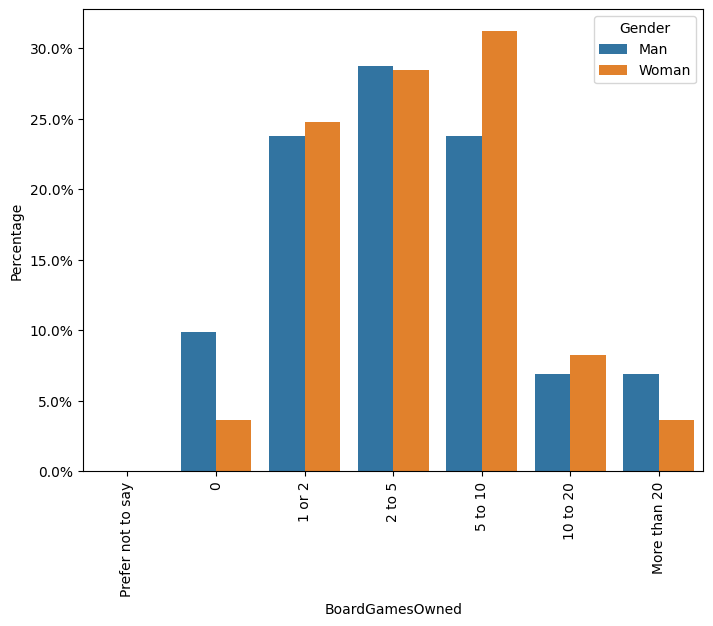

Gender  FrequencyOfPlay      
Man     Several times a month    24
        Every few months         18
        Rarely/Seldom            17
        Weekly                   14
        Monthly                  13
        Several times a week     10
        Never                     3
        Daily                     2
        Prefer not to say         0
Woman   Every few months         28
        Several times a month    27
        Monthly                  21
        Weekly                   12
        Rarely/Seldom             9
        Several times a week      7
        Daily                     4
        Never                     1
        Prefer not to say         0
Name: count, dtype: int64


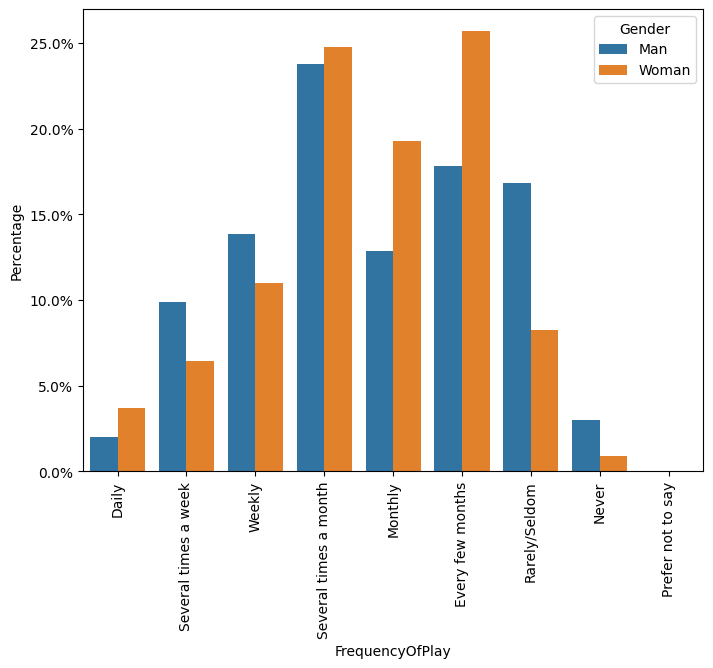

Gender  Style             
Man     Situation-Specific    38
        Casual                31
        Strategic             20
        Party/Social           6
        Not Interested         3
        Simple                 2
        Other                  1
Woman   Situation-Specific    43
        Casual                41
        Strategic             15
        Party/Social           6
        Simple                 4
Name: count, dtype: int64


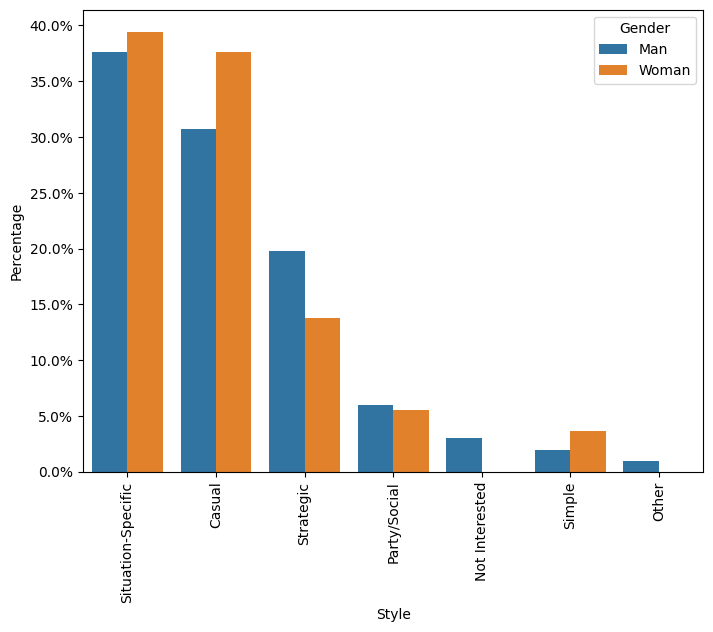

Gender  ChessRating
Man     7              25
        8              17
        6              12
        4              11
        3               8
        5               8
        1               8
        9               4
        10              4
        2               4
        Unknown         0
Woman   1              28
        5              14
        2              14
        7              12
        4              10
        6               9
        8               8
        3               7
        Unknown         3
        10              3
        9               1
Name: count, dtype: int64


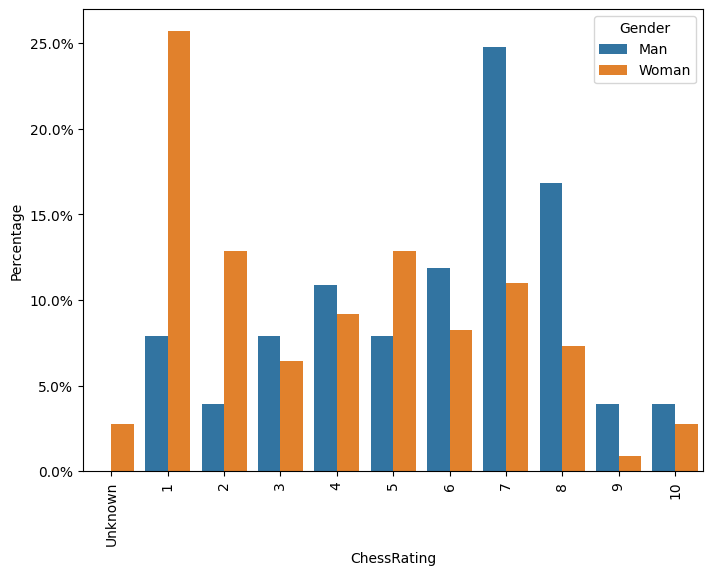

In [678]:
categories_against_category(genderForAnalysis_df,single_select_features,"Gender")

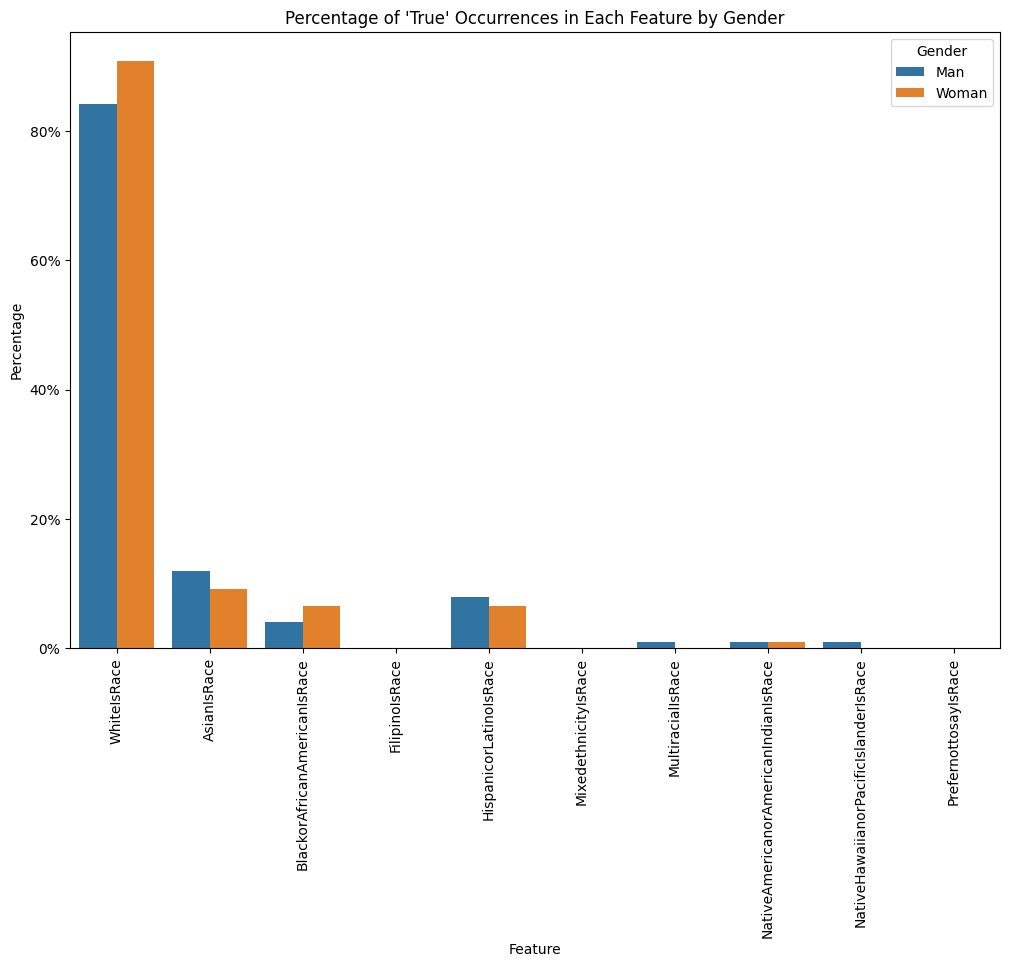

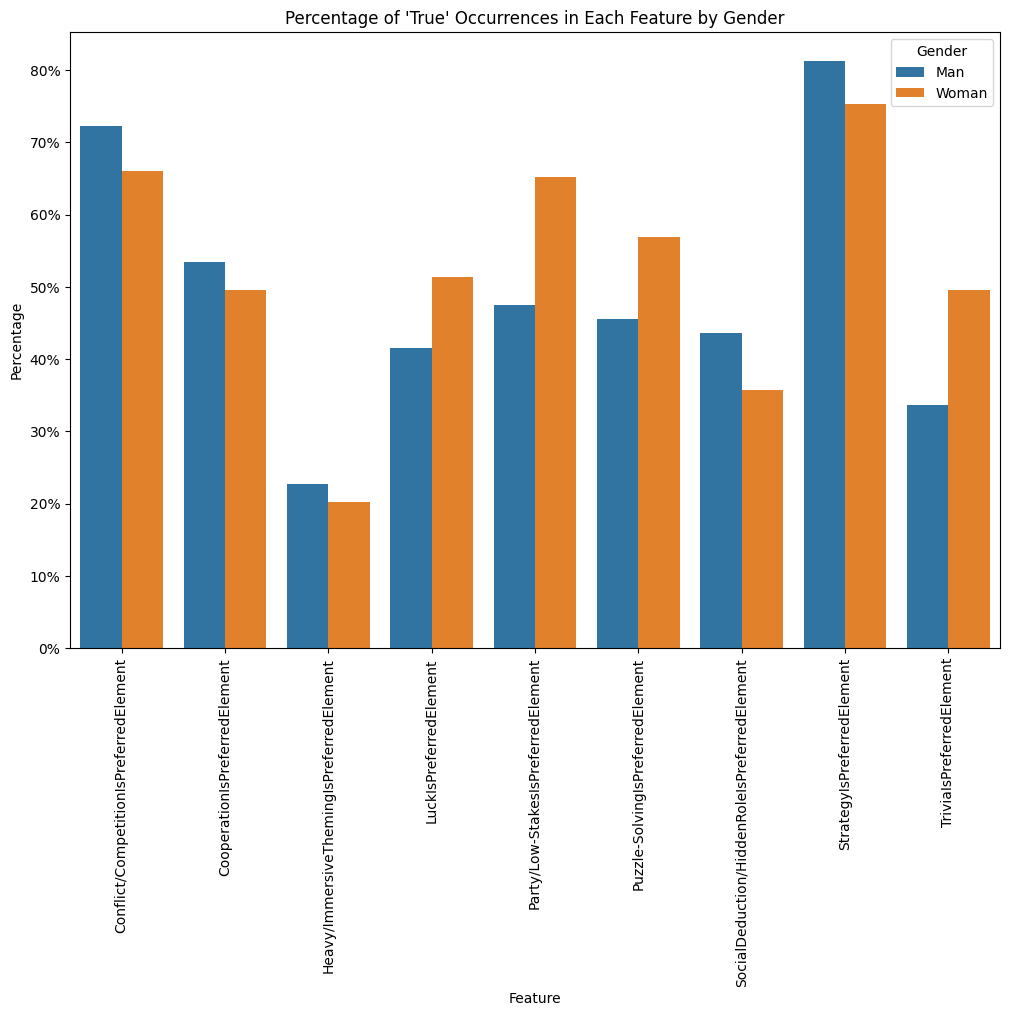

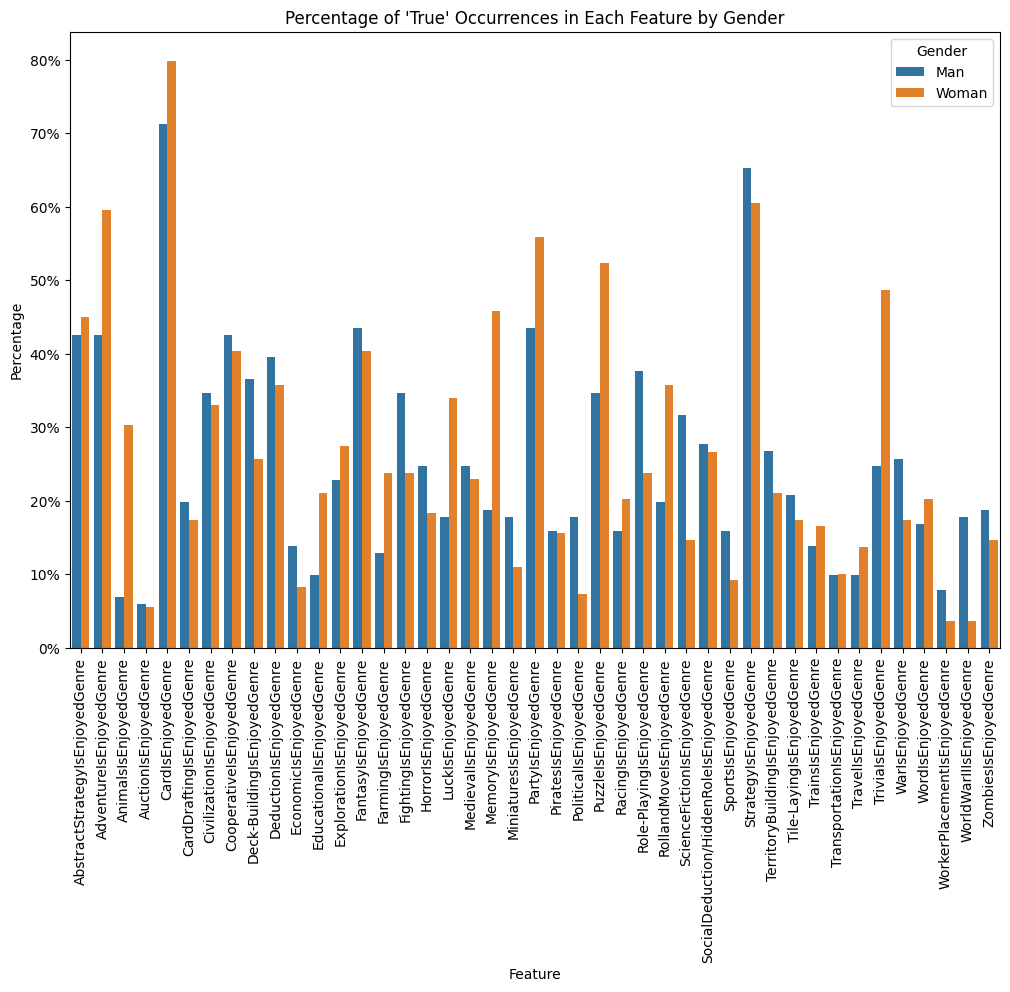

In [679]:
bools_against_category(genderForAnalysis_df,race_bool_features,"Gender")
bools_against_category(genderForAnalysis_df,element_bool_features,"Gender")
bools_against_category(genderForAnalysis_df,genre_bool_features,"Gender")

`All Single Select` Against `ChessRating` Box Plot

There does appear to be a substantial difference in ratings between Men and Women within in the data.

In [680]:
genderForAnalysis_df["Gender"].value_counts()

Gender
Woman    109
Man      101
Name: count, dtype: int64

<Axes: xlabel='ChessRating', ylabel='Count'>

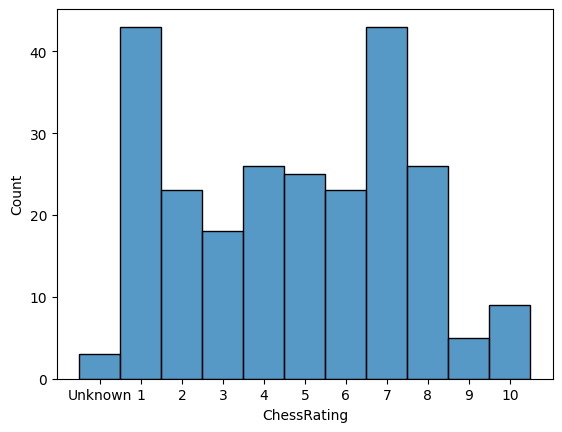

In [681]:
sns.histplot(x=cleaned_df["ChessRating"])

Gender
Woman    109
Man      101
Other     34
Name: count, dtype: int64


C:\Users\Seven\AppData\Local\Temp\ipykernel_30984\2003744585.py:123: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Other' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_copy.loc[df_copy[col_name].isin(counts[counts < threshold].index), col_name] = "Other"


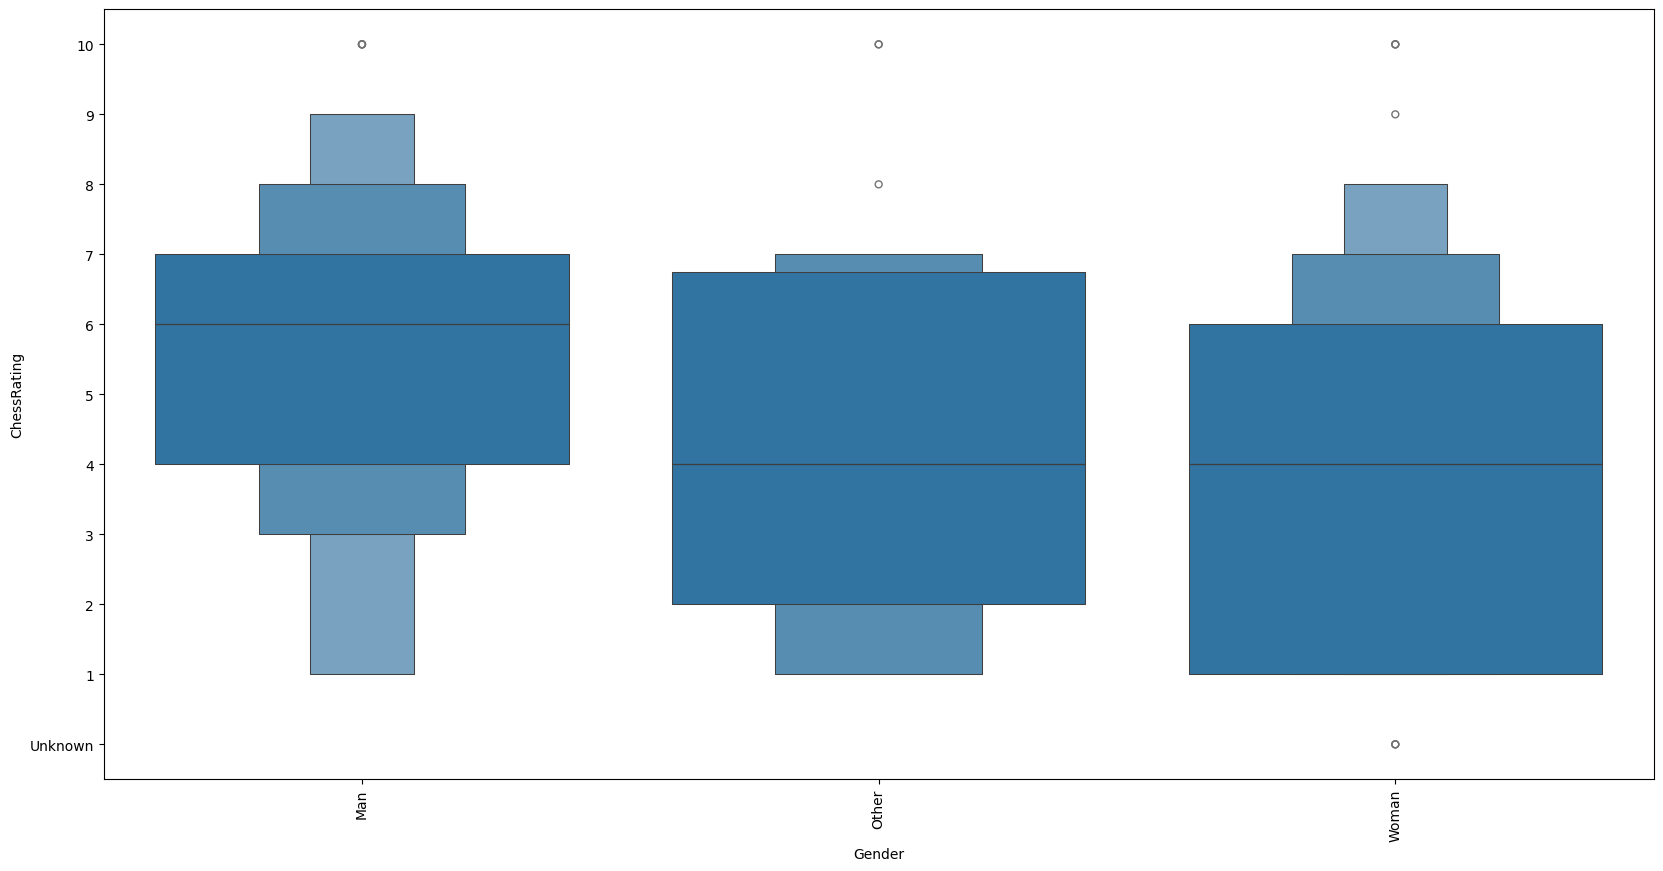

Age
18       69
19       58
20       41
21       28
Other    23
22       15
23       10
Name: count, dtype: int64


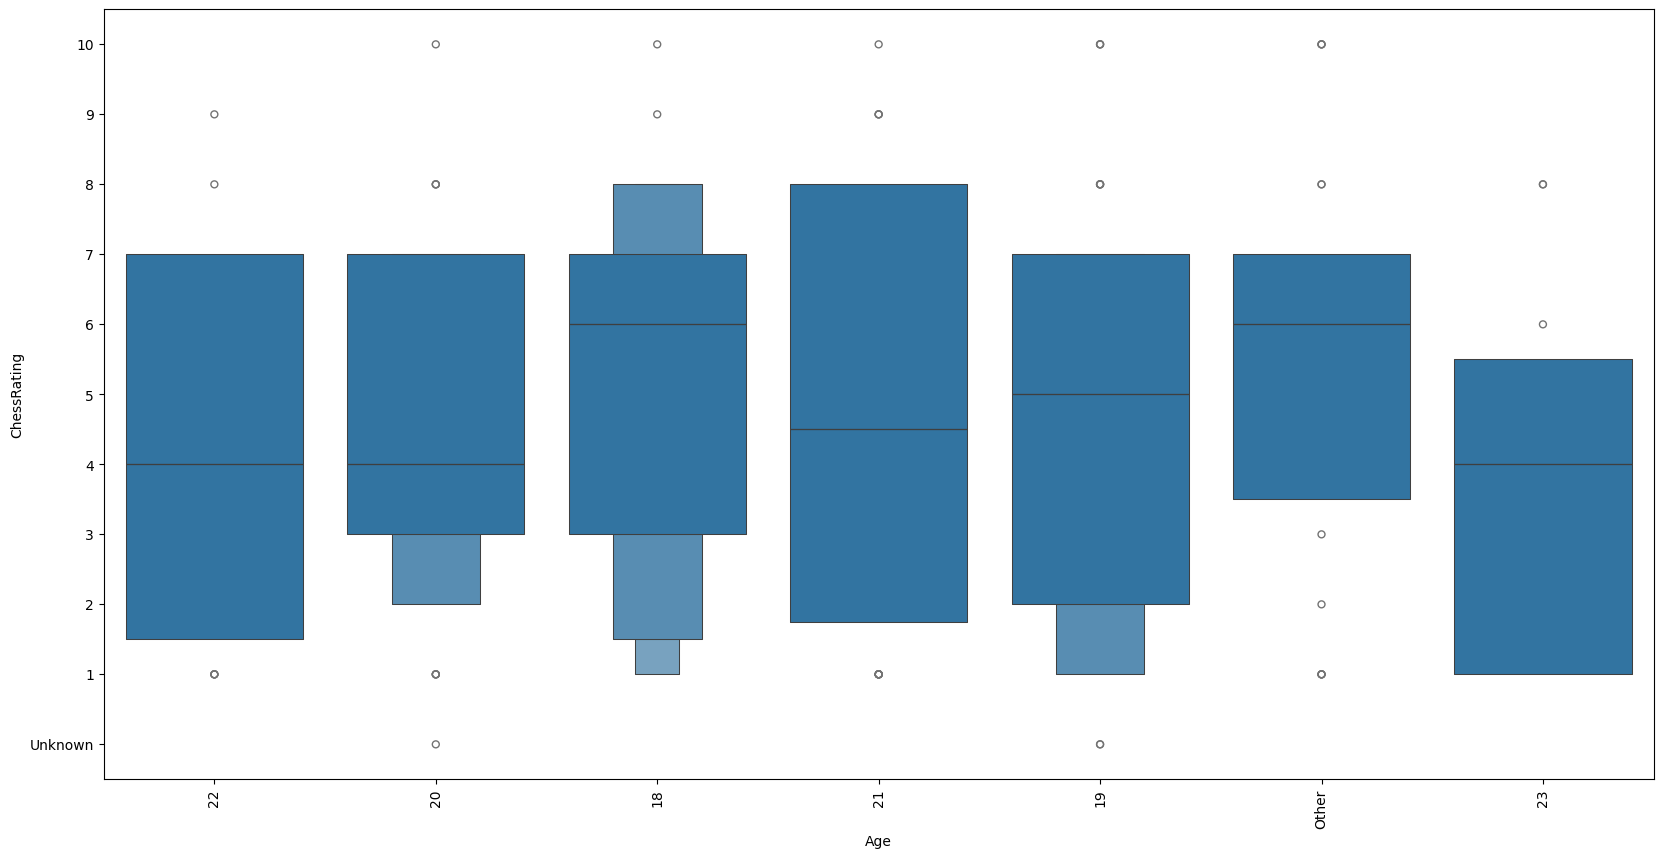

EmploymentStatus
Unemployed            124
Employed part-time    107
Other                  13
Name: count, dtype: int64


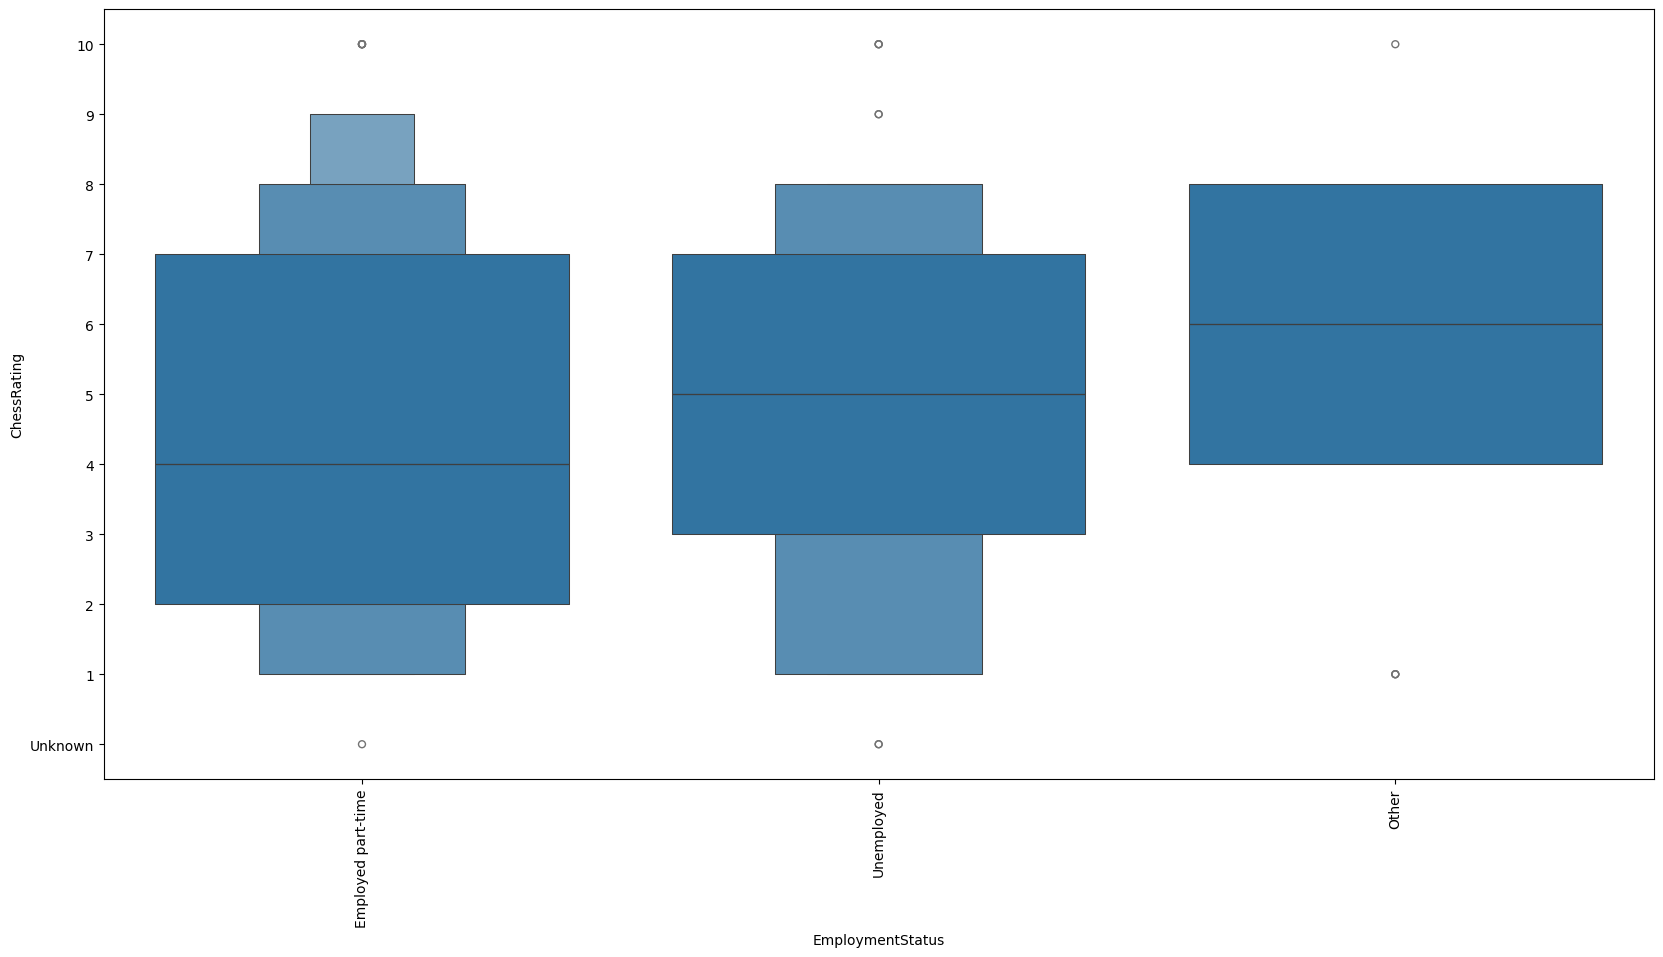

Vision
None                 132
Glasses               76
Both                  25
Contacts              10
Prefer not to say      1
Name: count, dtype: int64


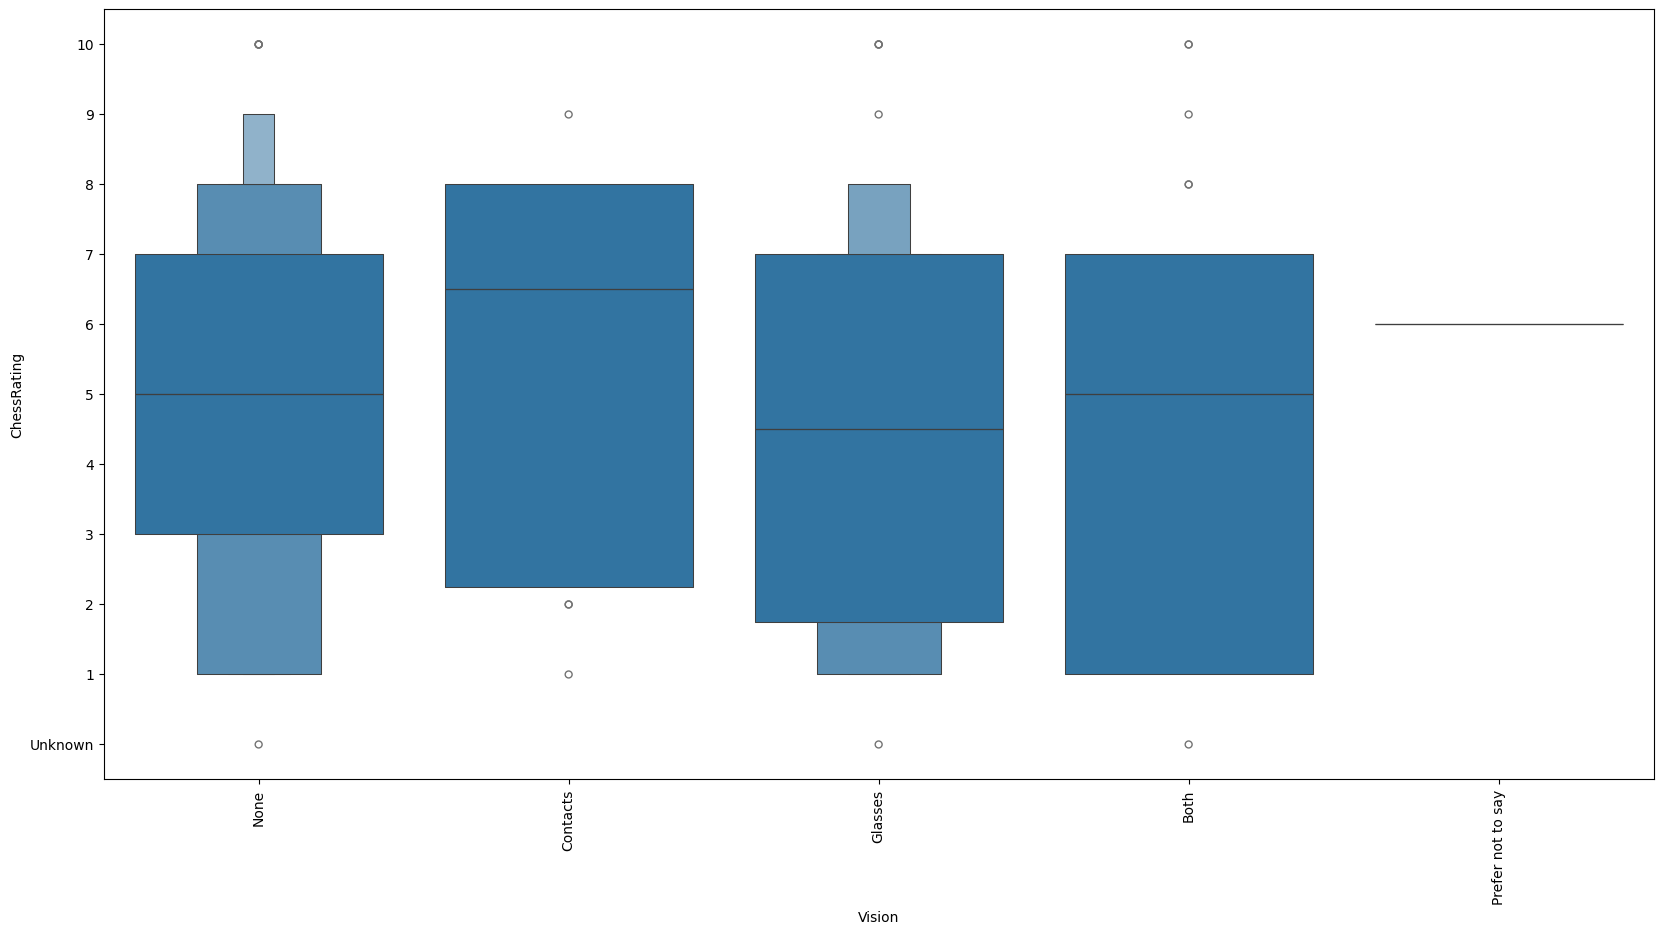

Religiosity
Not Religious    197
Religious         46
Name: count, dtype: int64


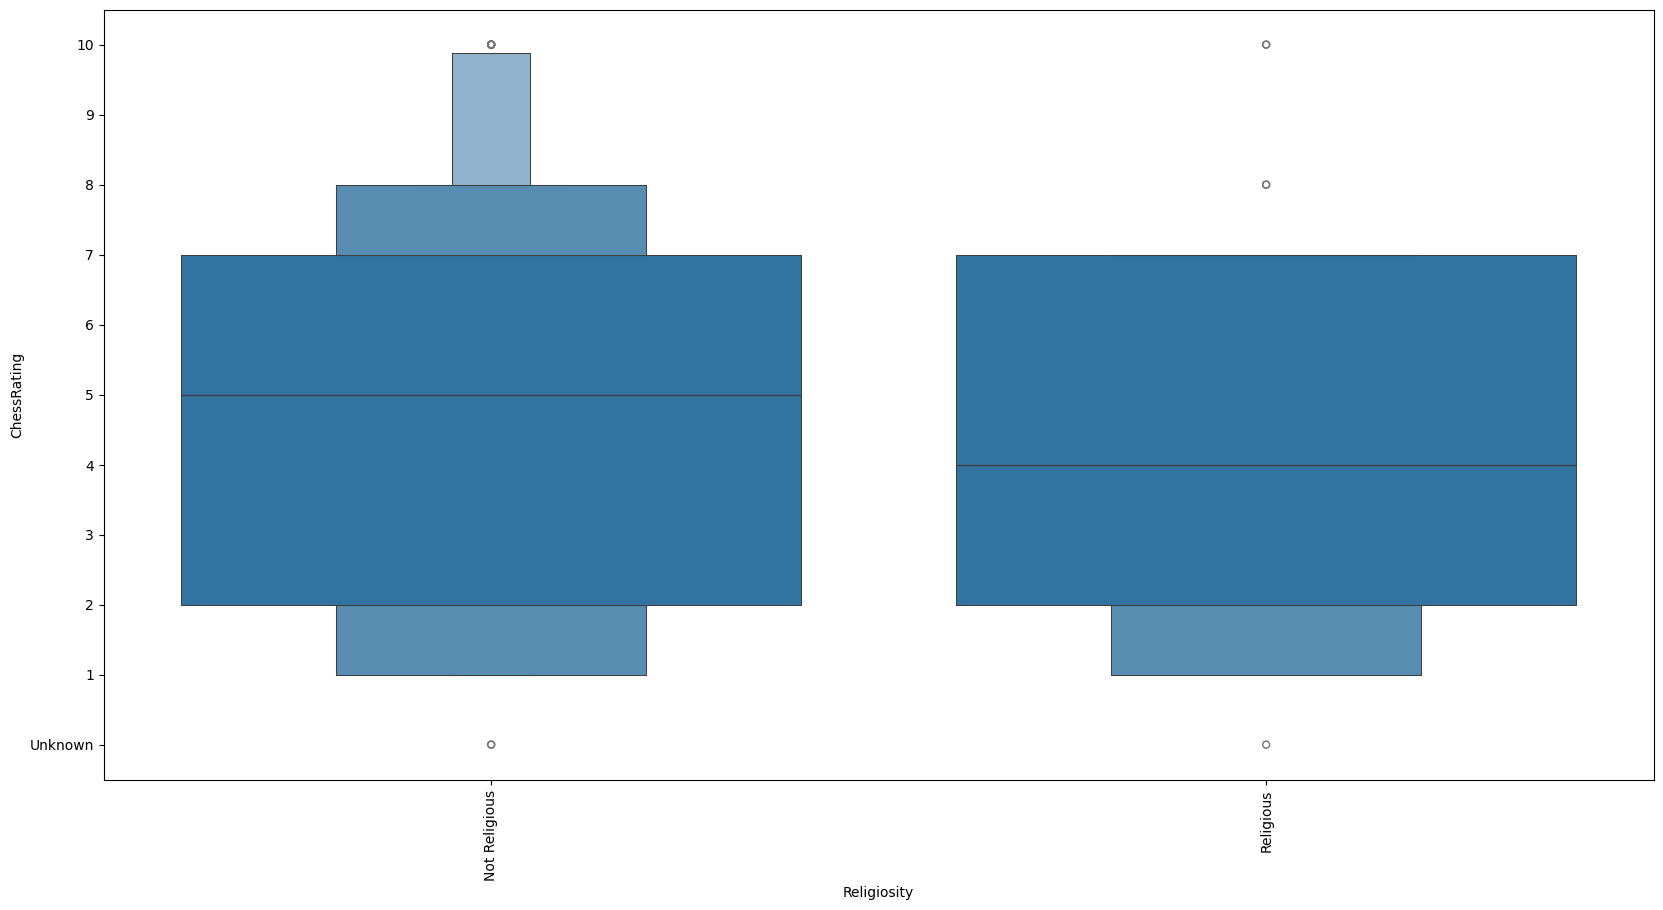

AOSCat
STEM                 95
Other                65
Arts & Humanities    47
Unknown              37
Name: count, dtype: int64


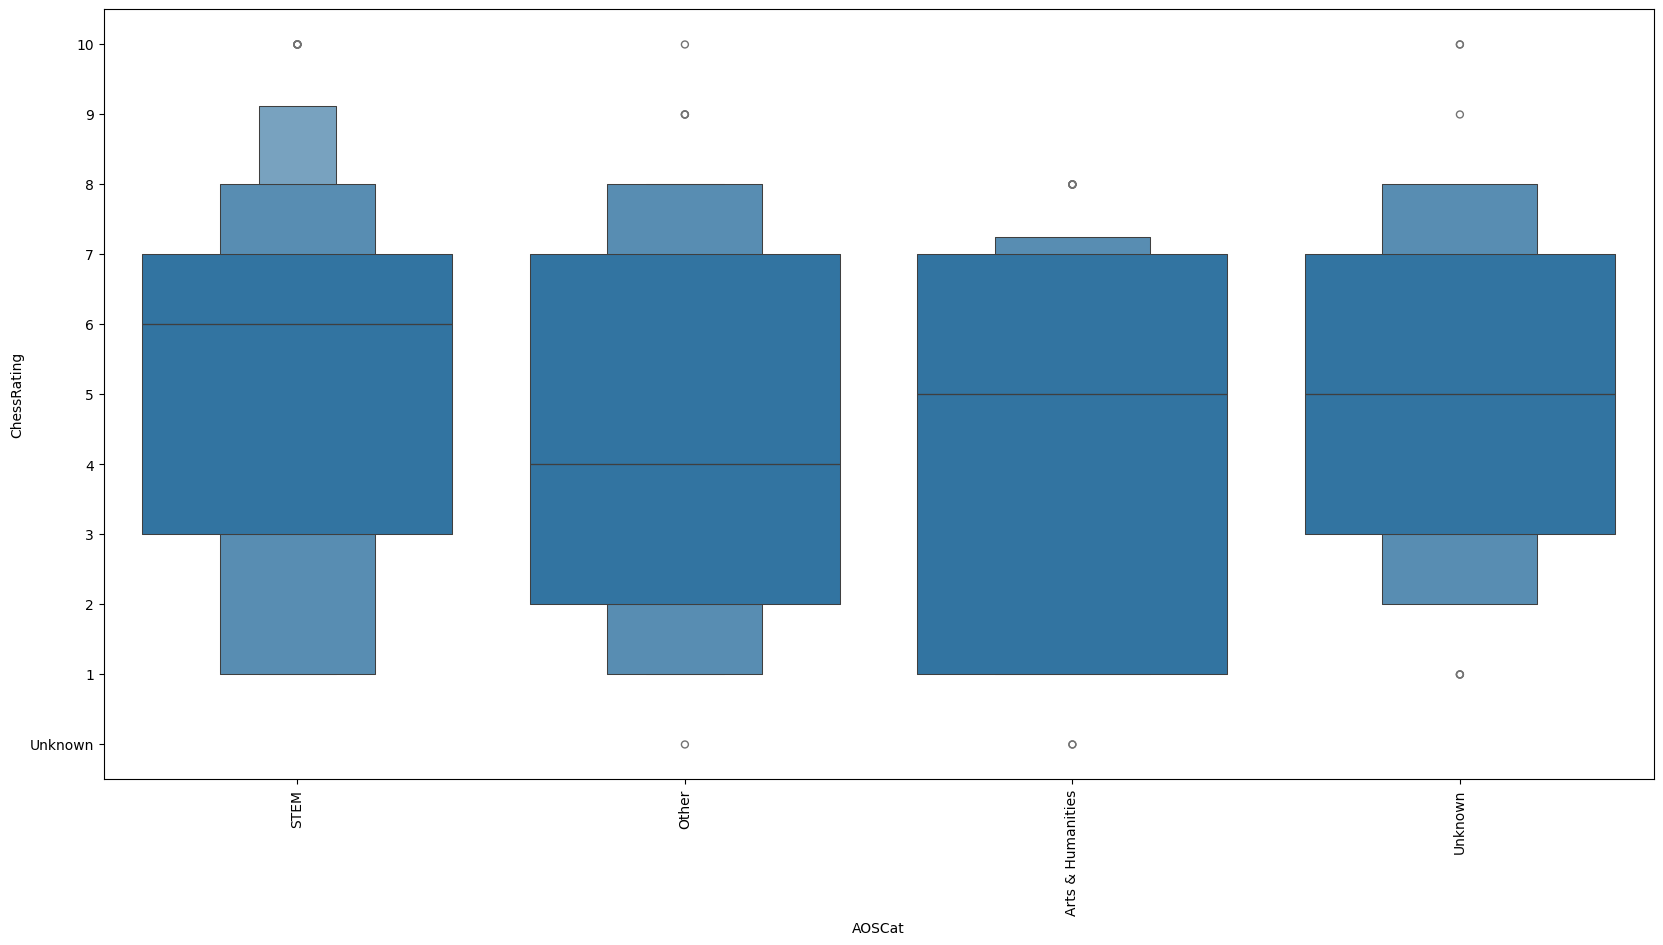

EnjoysBoardGames
Yes                  231
No                    12
Prefer not to say      1
Name: count, dtype: int64


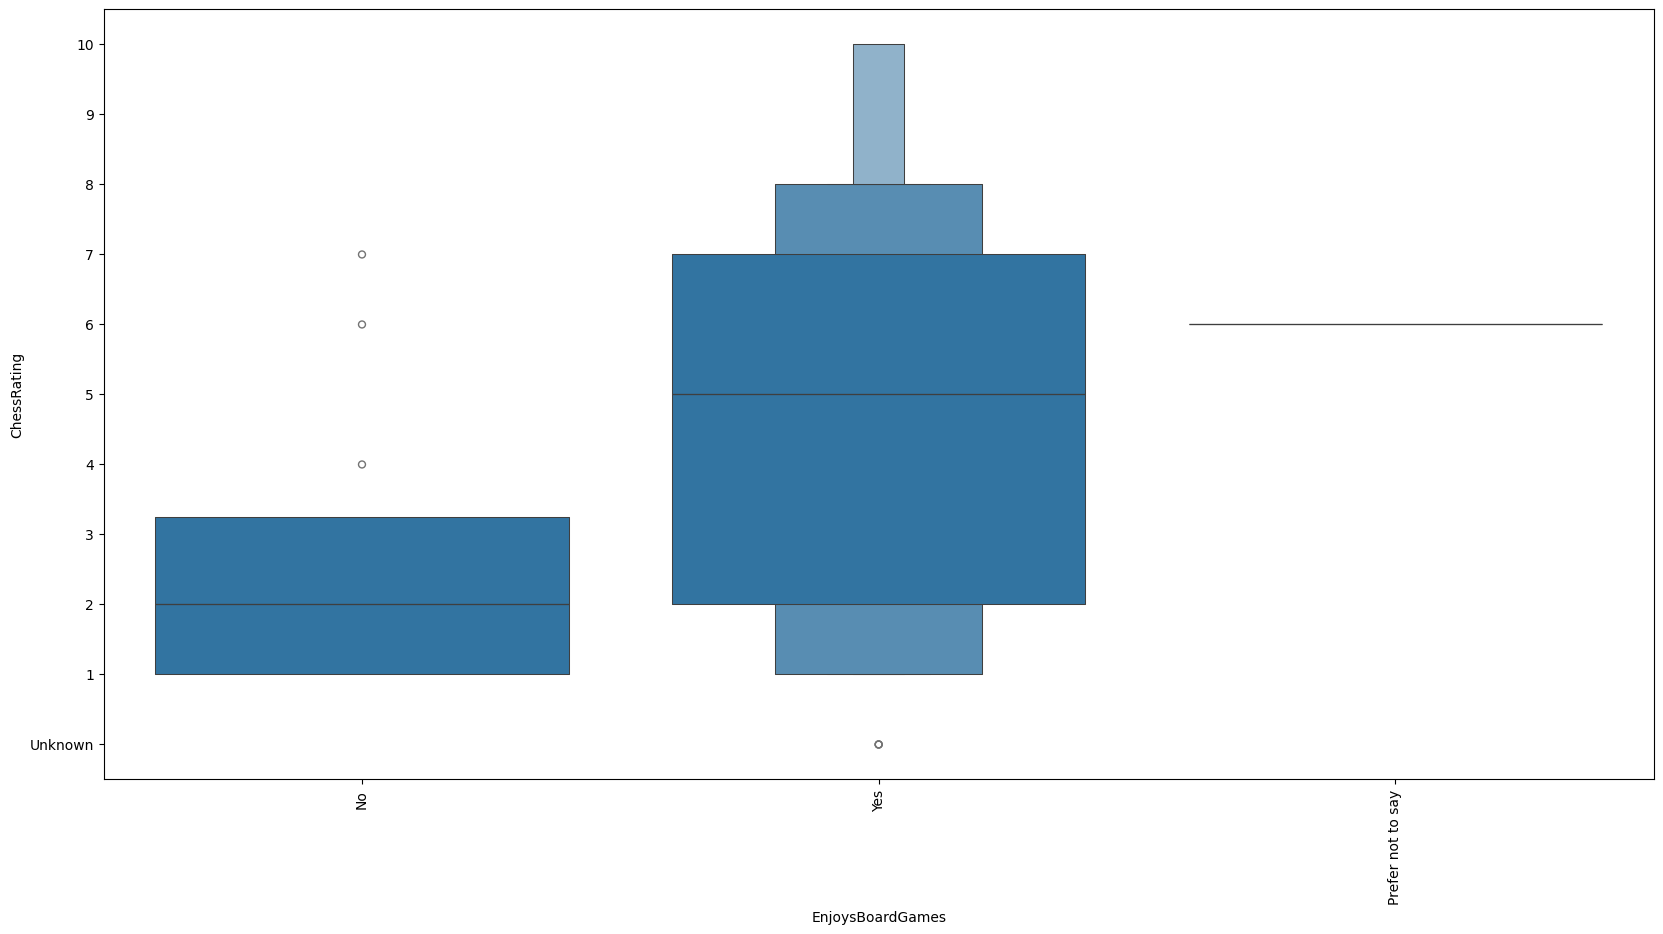

BoardGamesOwned
2 to 5               73
5 to 10              60
1 or 2               59
10 to 20             20
0                    19
More than 20         13
Prefer not to say     0
Name: count, dtype: int64


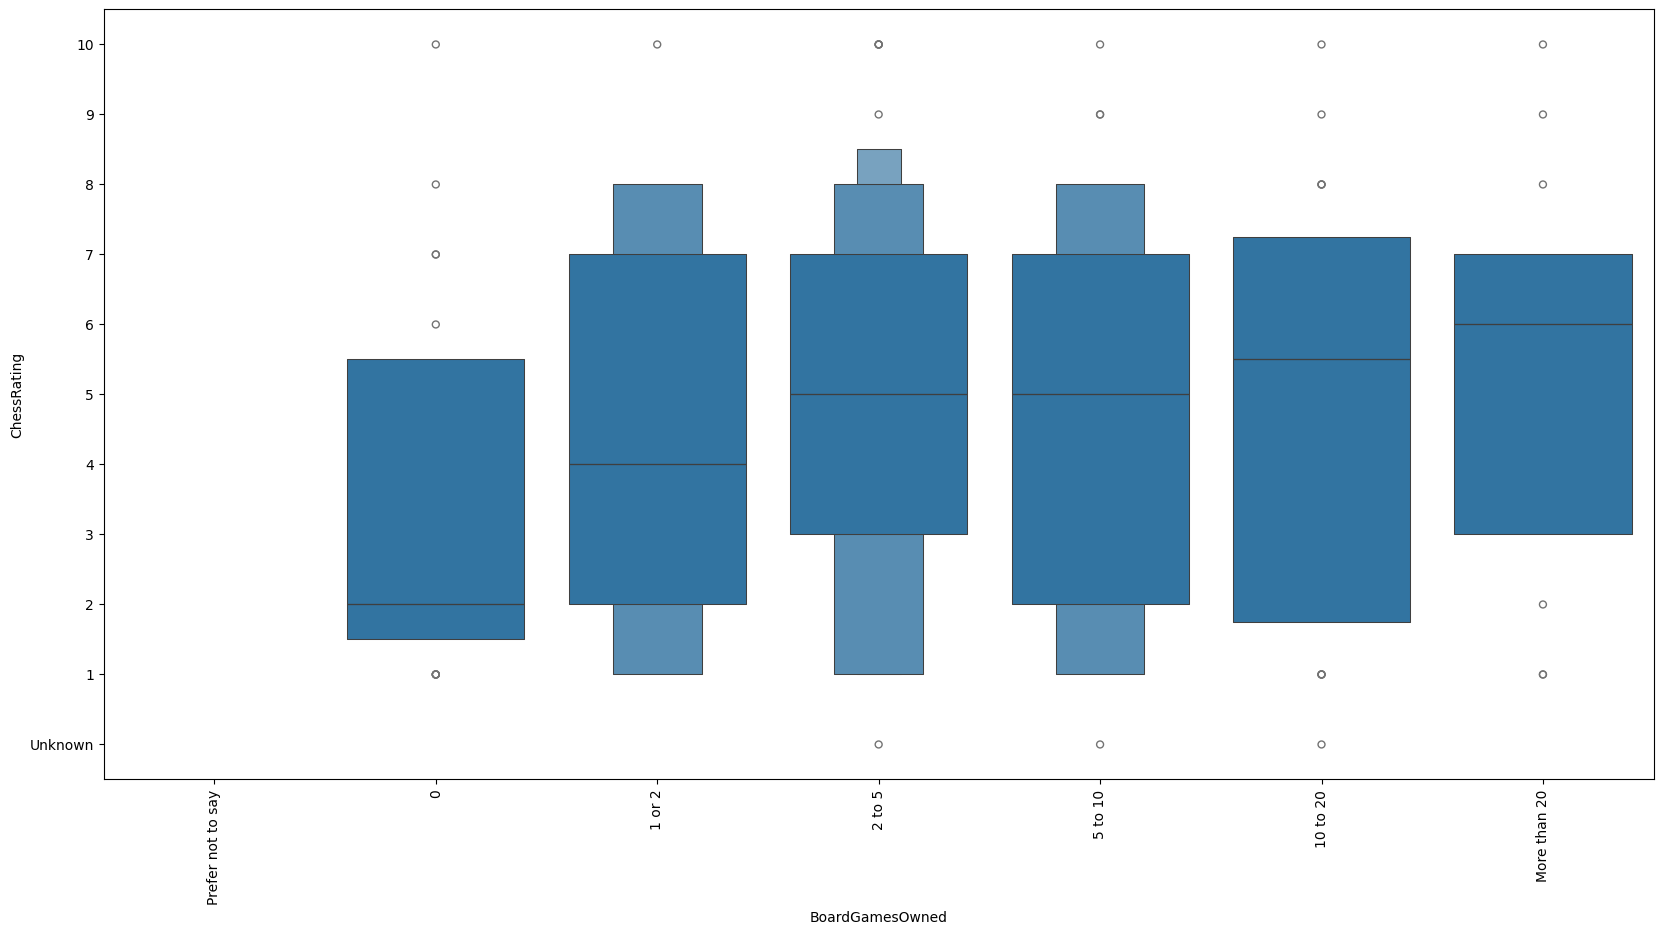

FrequencyOfPlay
Several times a month    62
At Least Weekly          56
Every few months         54
Monthly                  37
Rarely/Seldom            30
Never                     5
Prefer not to say         0
Name: count, dtype: int64


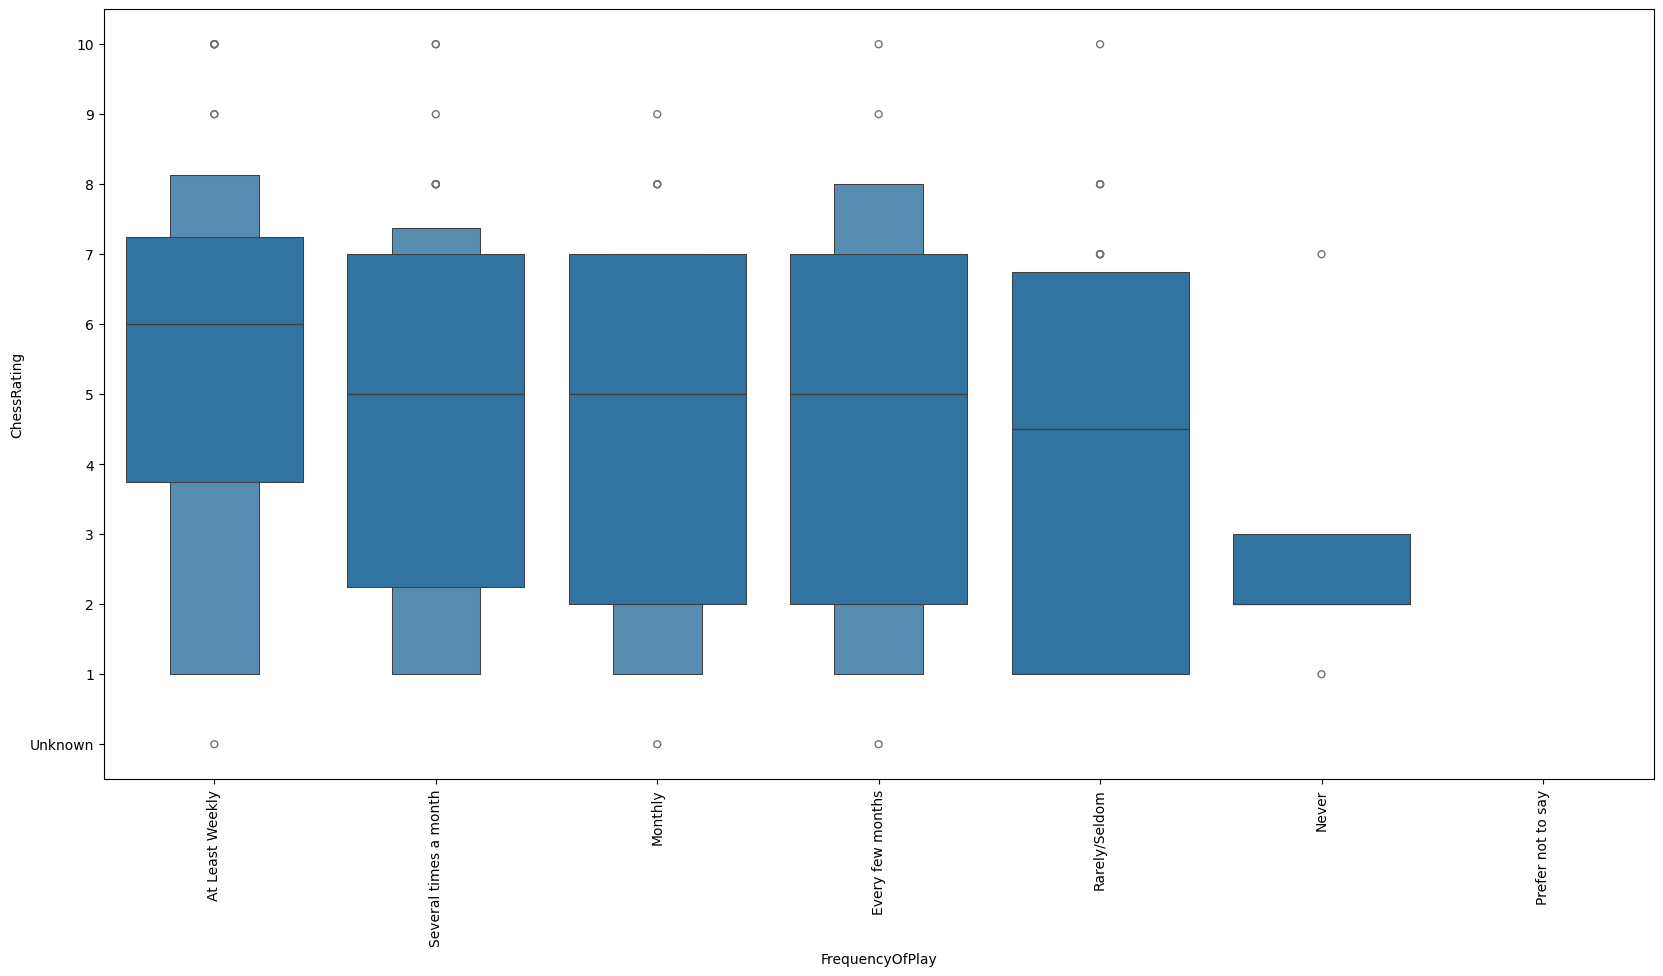

Style
Situation-Specific    91
Casual                79
Strategic             42
Party/Social          19
Simple                 8
Not Interested         4
Other                  1
Name: count, dtype: int64


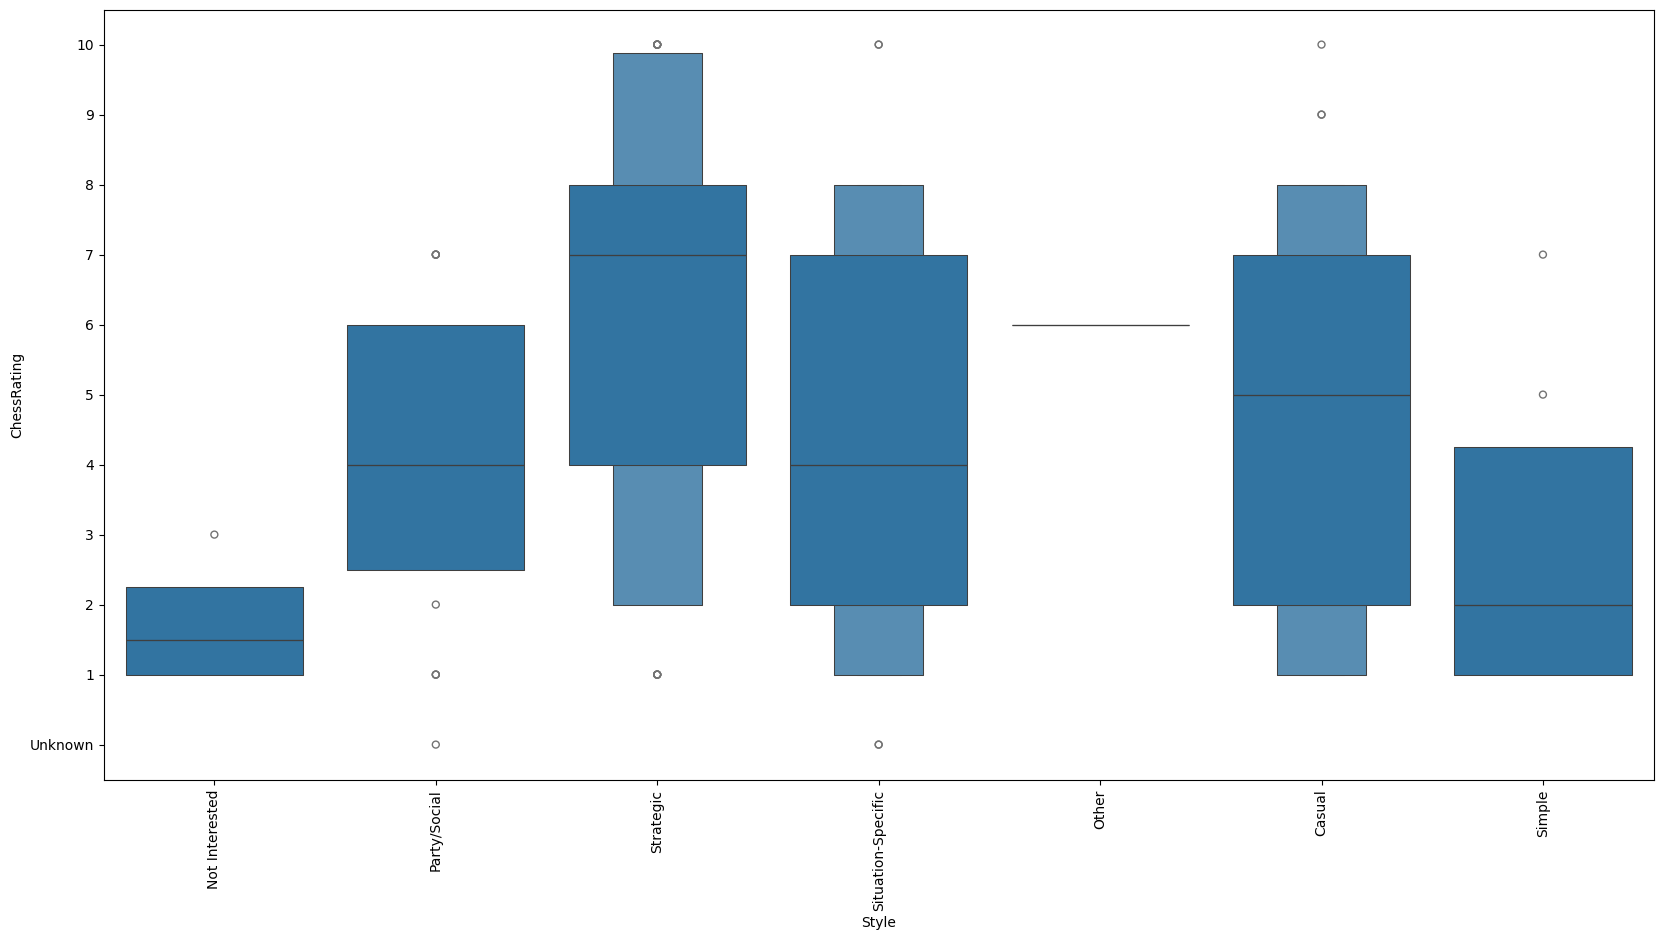

ChessRating
1          43
7          43
4          26
8          26
5          25
2          23
6          23
3          18
10          9
9           5
Unknown     3
Name: count, dtype: int64


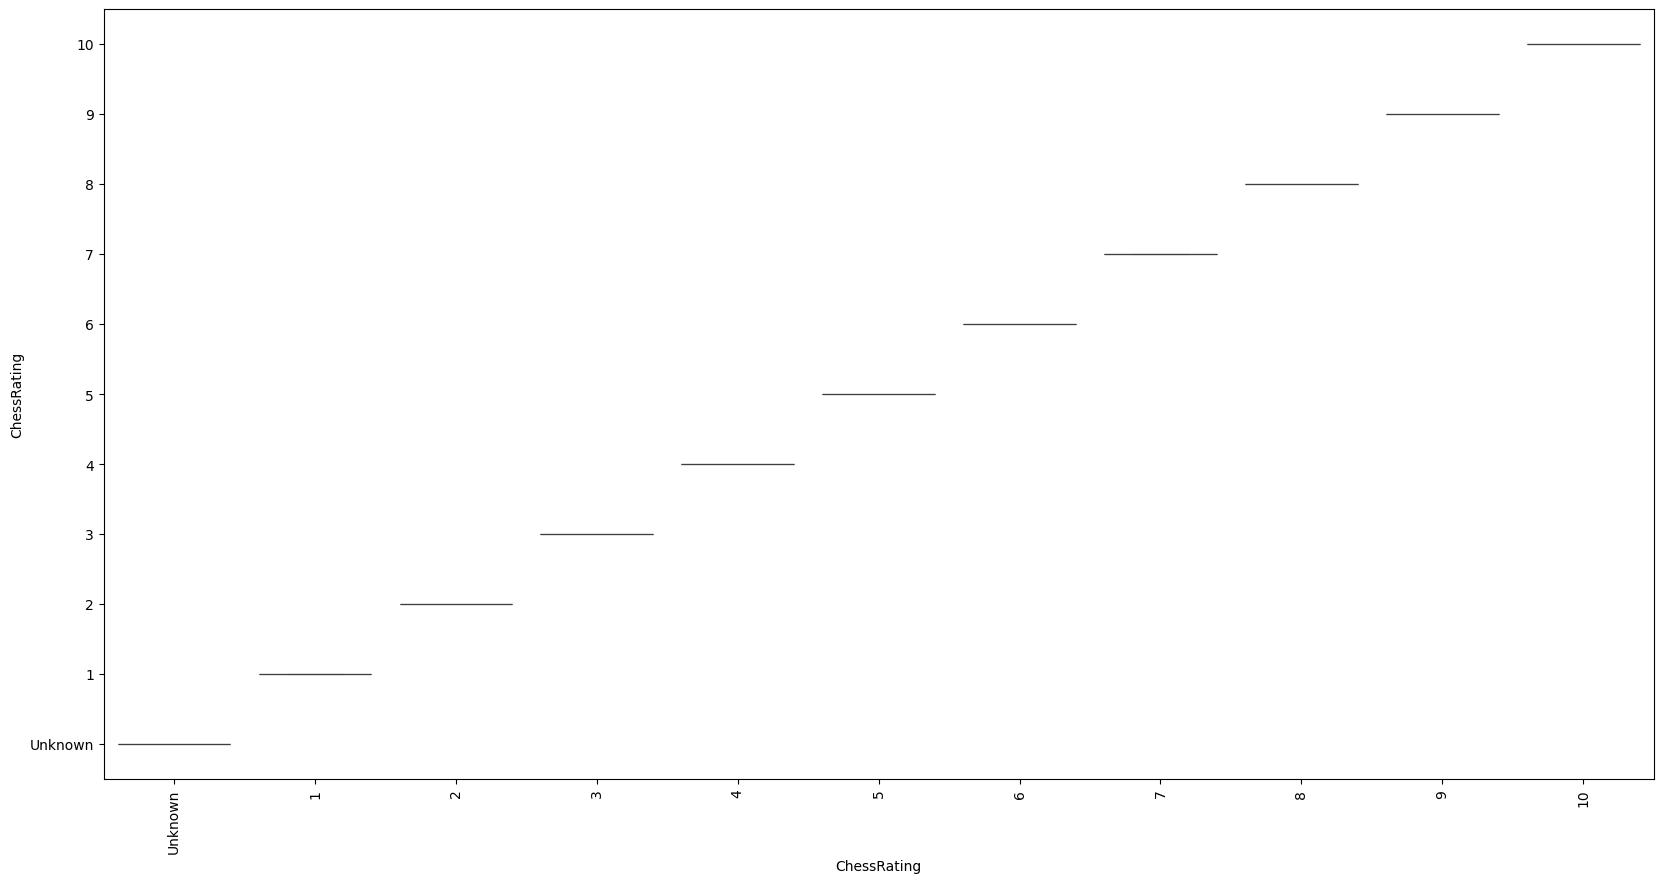

In [682]:
modified_df = cleaned_df.copy()
modified_df = filter_threshold(modified_df,"Gender",30)
modified_df = filter_threshold(modified_df,"Age",10)
modified_df = filter_threshold(modified_df,"EmploymentStatus",30)
modified_df["Religiosity"] = modified_df["Religiosity"].map(religious_bucketing)
modified_df = filter_threshold(modified_df,"AOSCat",30)
modified_df["FrequencyOfPlay"] = modified_df["FrequencyOfPlay"].apply(lambda x: "At Least Weekly" if x in ["Daily","Several times a week","Weekly"] else x)
modified_df["FrequencyOfPlay"] = pd.Categorical(modified_df["FrequencyOfPlay"],
    categories=["At Least Weekly","Several times a month","Monthly","Every few months","Rarely/Seldom","Never","Prefer not to say"],ordered=True)


features = single_select_features.copy()
features.remove("WWUStatus")
for feature in features:
    print(modified_df[feature].value_counts())
    plt.figure(figsize=(20, 10))
    sns.boxenplot(x=modified_df[feature],y=modified_df["ChessRating"])
    plt.ylim(reversed(plt.ylim()))
    plt.xticks(rotation=90)
    plt.show()

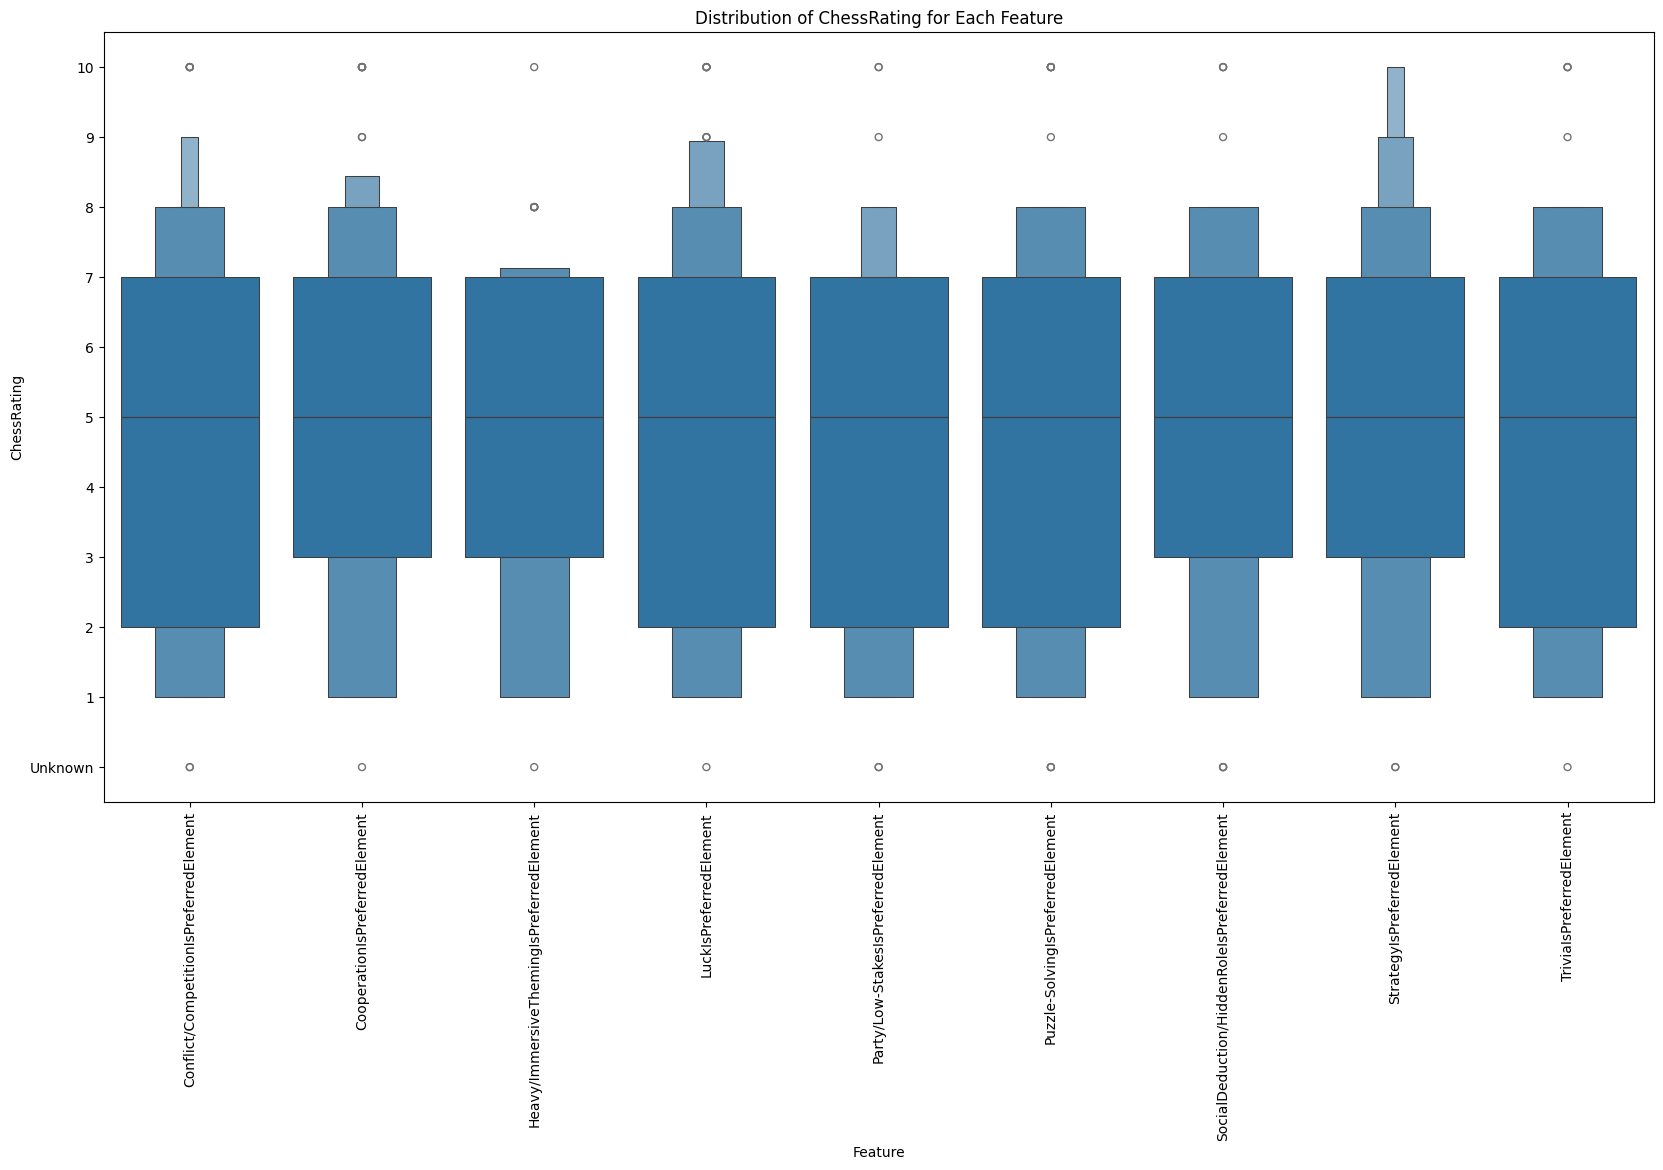

In [683]:
# Concatenate the boolean columns with the "ChessRating" column
df_bool = cleaned_df[element_bool_features + ['ChessRating']]

# Reshape your DataFrame so that each boolean feature and its corresponding "ChessRating" are in a single row
df_melt = df_bool.melt(id_vars='ChessRating', var_name='Feature', value_name='Value')

# Select only the rows where the category is marked as True
df_melt = df_melt[df_melt['Value'] == 1]

# Now you can plot everything on the same plot
plt.figure(figsize=(20, 10))
sns.boxenplot(x='Feature', y='ChessRating', data=df_melt)
plt.ylim(reversed(plt.ylim()))
plt.xticks(rotation=90)
plt.title('Distribution of ChessRating for Each Feature')
plt.show()

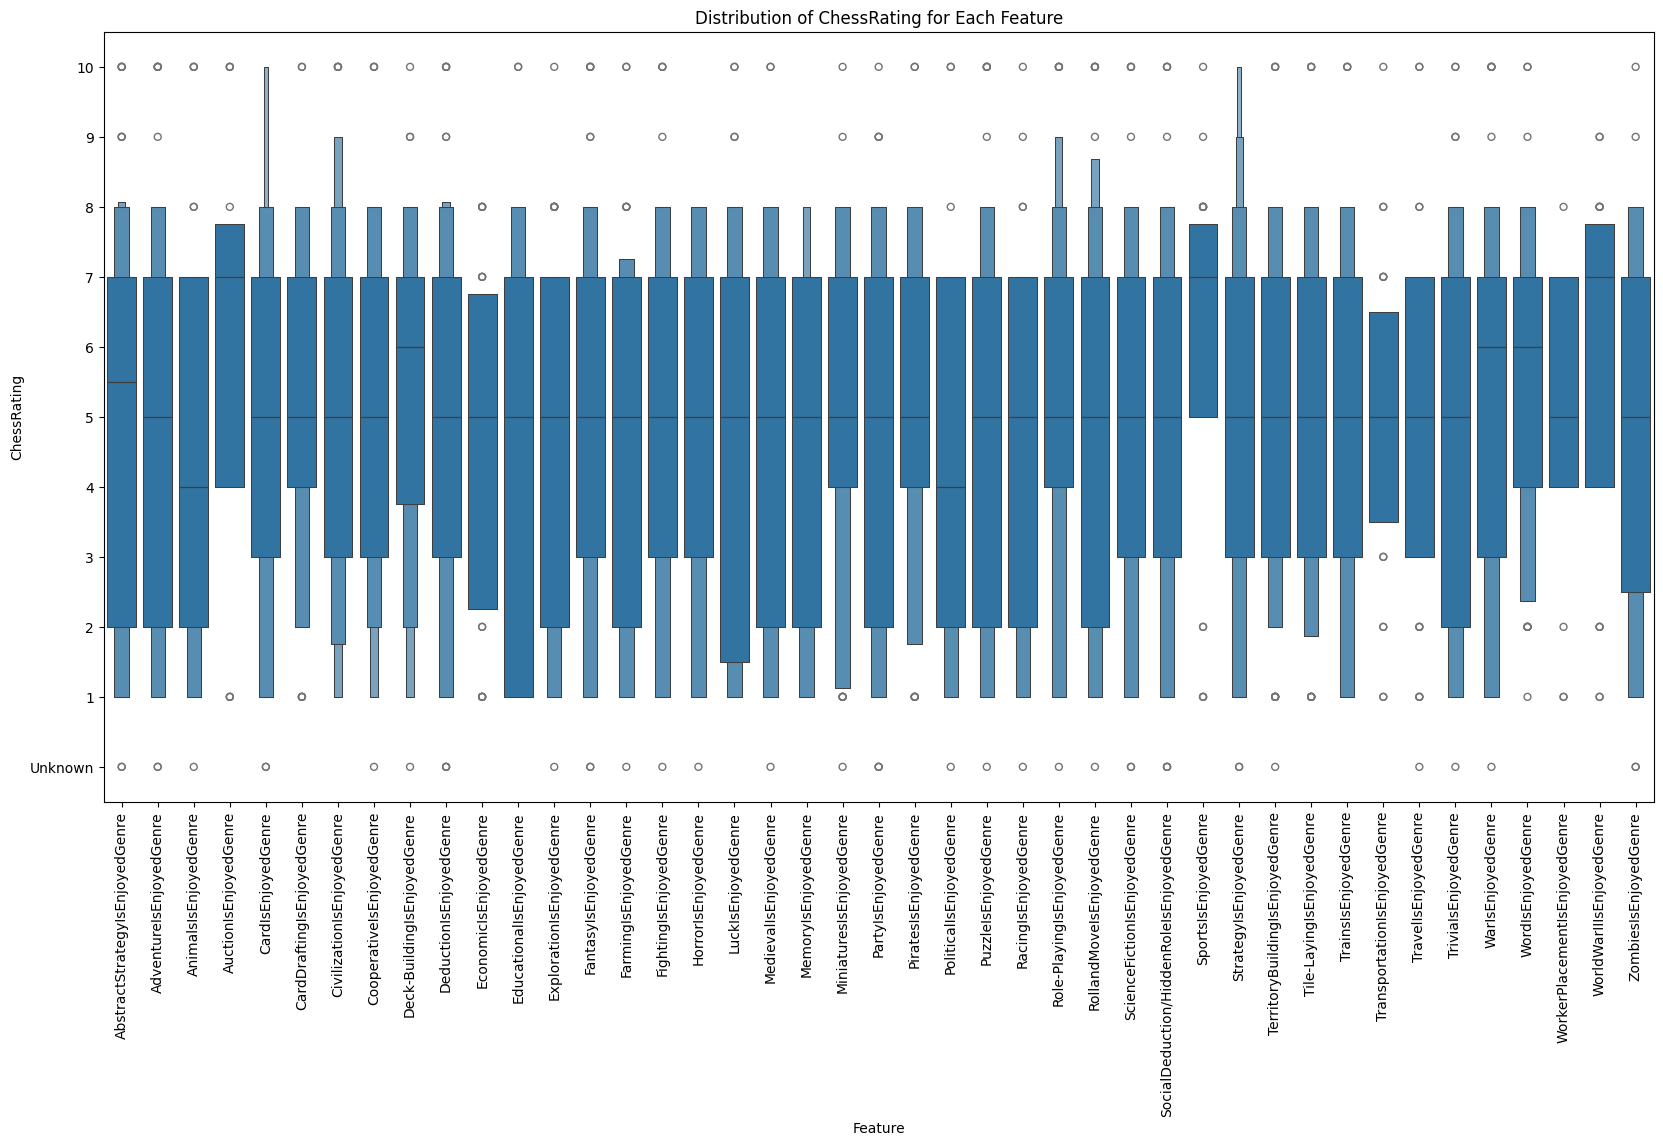

In [684]:
# Concatenate the boolean columns with the "ChessRating" column
df_bool = cleaned_df[genre_bool_features + ['ChessRating']]

# Reshape your DataFrame so that each boolean feature and its corresponding "ChessRating" are in a single row
df_melt = df_bool.melt(id_vars='ChessRating', var_name='Feature', value_name='Value')

# Select only the rows where the category is marked as True
df_melt = df_melt[df_melt['Value'] == 1]

# Now you can plot everything on the same plot
plt.figure(figsize=(20, 10))
sns.boxenplot(x='Feature', y='ChessRating', data=df_melt)
plt.ylim(reversed(plt.ylim()))
plt.xticks(rotation=90)
plt.title('Distribution of ChessRating for Each Feature')
plt.show()

In [685]:
# This produces a bunch of plots, but it's hard to interpret as it is currently, and their is not an amazing amount of discovery

# modified_df = cleaned_df.copy()
# modified_df = filter_threshold(modified_df,"Gender",30)
# modified_df = filter_threshold(modified_df,"Age",10)
# modified_df = filter_threshold(modified_df,"EmploymentStatus",30)
# modified_df["Religiosity"] = modified_df["Religiosity"].map(religious_bucketing)
# modified_df = filter_threshold(modified_df,"AOSCat",30)

# features = single_select_features.copy()
# features.remove("WWUStatus")
# for feature in features:
#     print(modified_df[feature].value_counts())
#     bools_against_category(modified_df,element_bool_features,feature)

In [686]:
# This produces a bunch of plots, but it's hard to interpret as it is currently, and their is not an amazing amount of discovery


# modified_df = cleaned_df.copy()
# modified_df = filter_threshold(modified_df,"Gender",30)
# modified_df = filter_threshold(modified_df,"Age",10)
# modified_df = filter_threshold(modified_df,"EmploymentStatus",30)
# modified_df["Religiosity"] = modified_df["Religiosity"].map(religious_bucketing)
# modified_df = filter_threshold(modified_df,"AOSCat",30)

# features = single_select_features.copy()
# features.remove("WWUStatus")
# for feature in features:
#     print(modified_df[feature].value_counts())
#     bools_against_category(modified_df,genre_bool_features,feature)

In [687]:
cleaned_df["BoardGamesOwned"].value_counts()

BoardGamesOwned
2 to 5               73
5 to 10              60
1 or 2               59
10 to 20             20
0                    19
More than 20         13
Prefer not to say     0
Name: count, dtype: int64

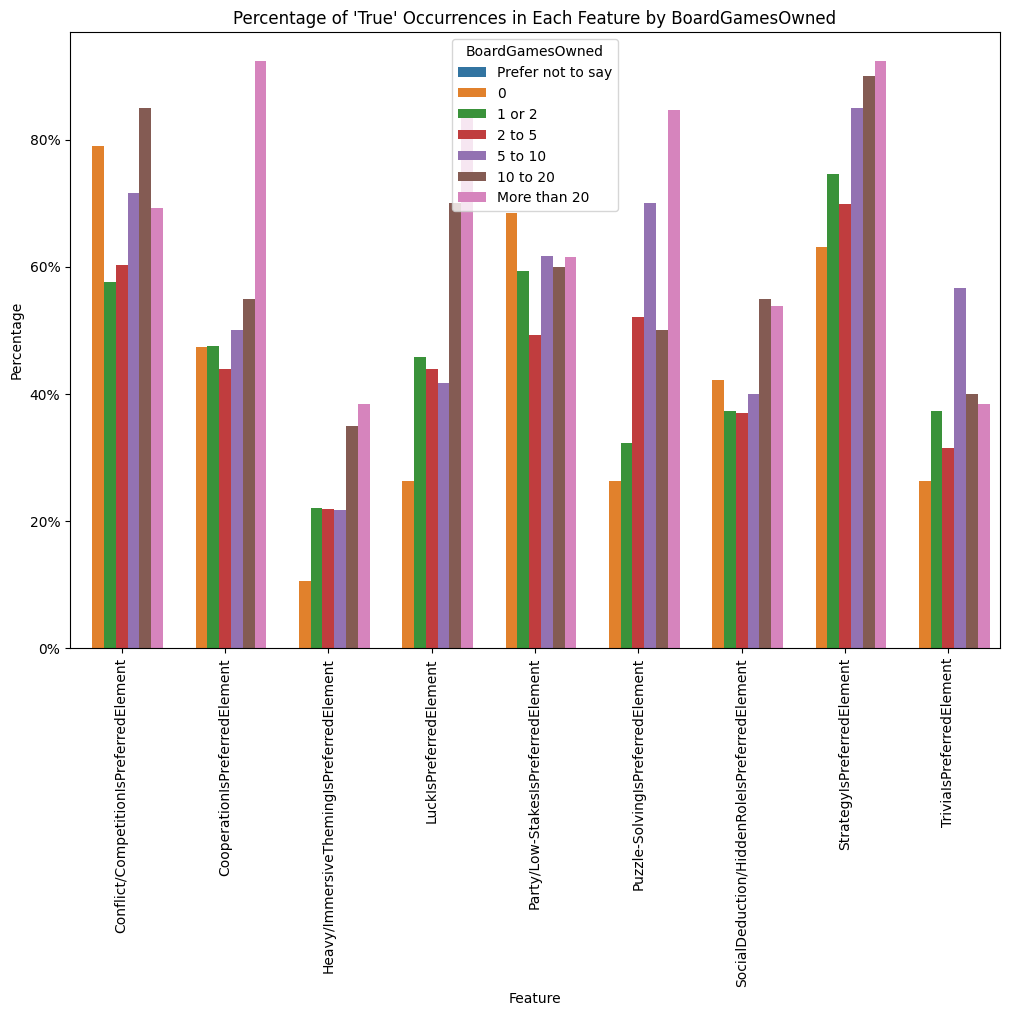

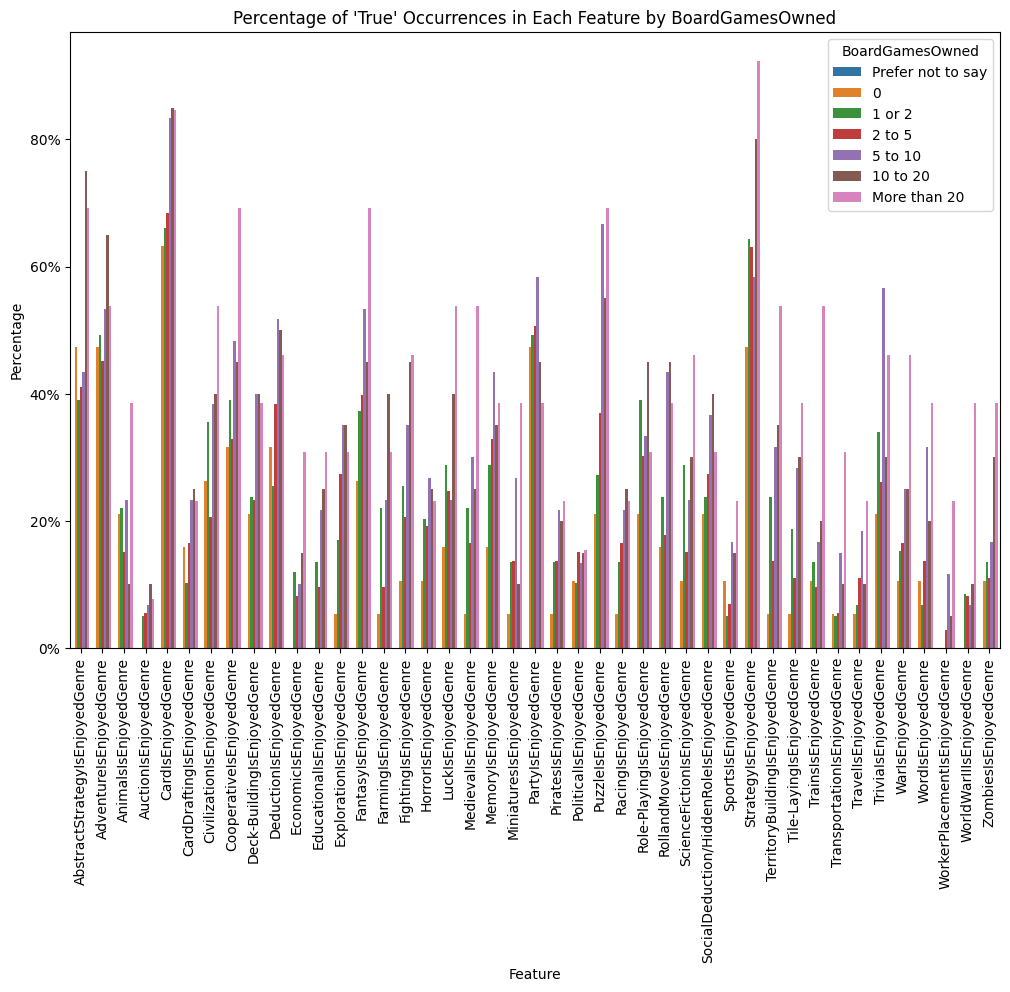

In [688]:
selected_rows = cleaned_df.copy()

bools_against_category(selected_rows,element_bool_features,"BoardGamesOwned")
bools_against_category(selected_rows,genre_bool_features,"BoardGamesOwned")

Style
Situation-Specific    91
Casual                79
Strategic             42
Name: count, dtype: int64


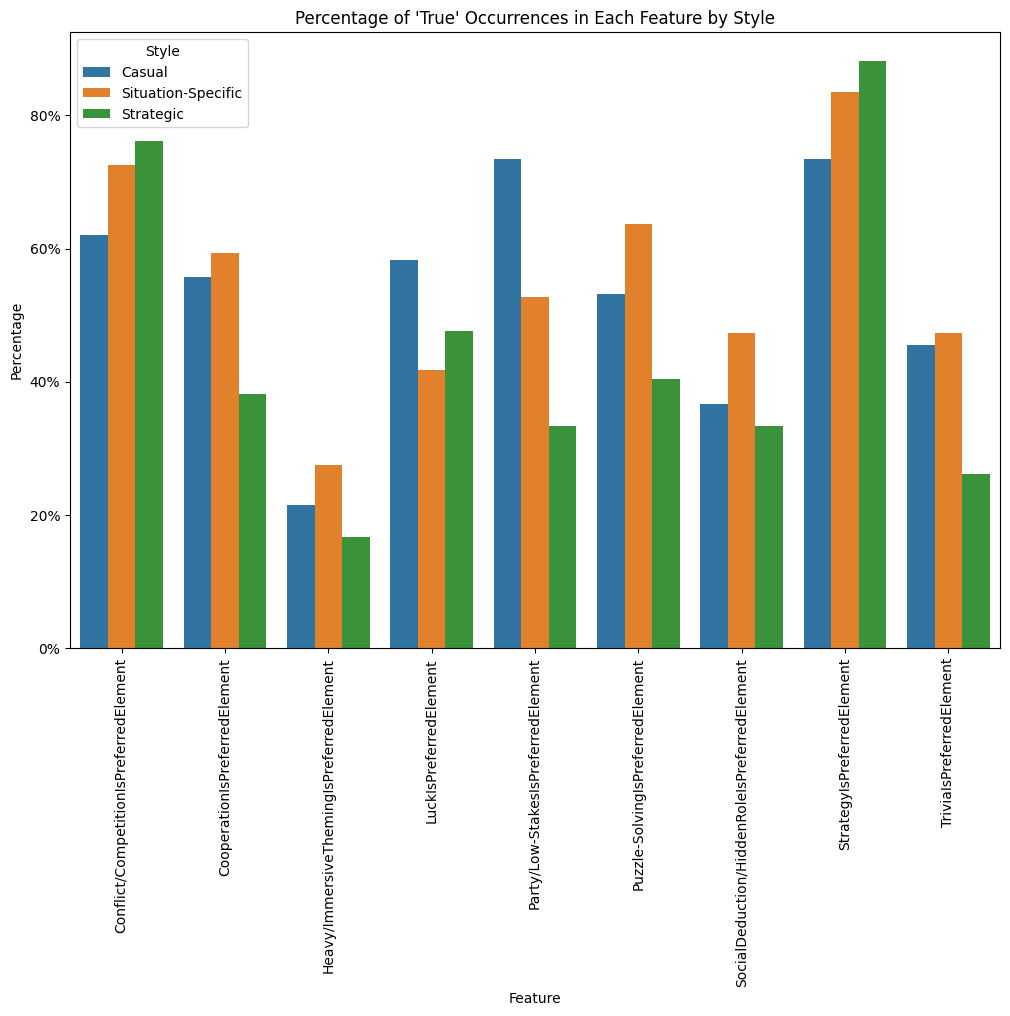

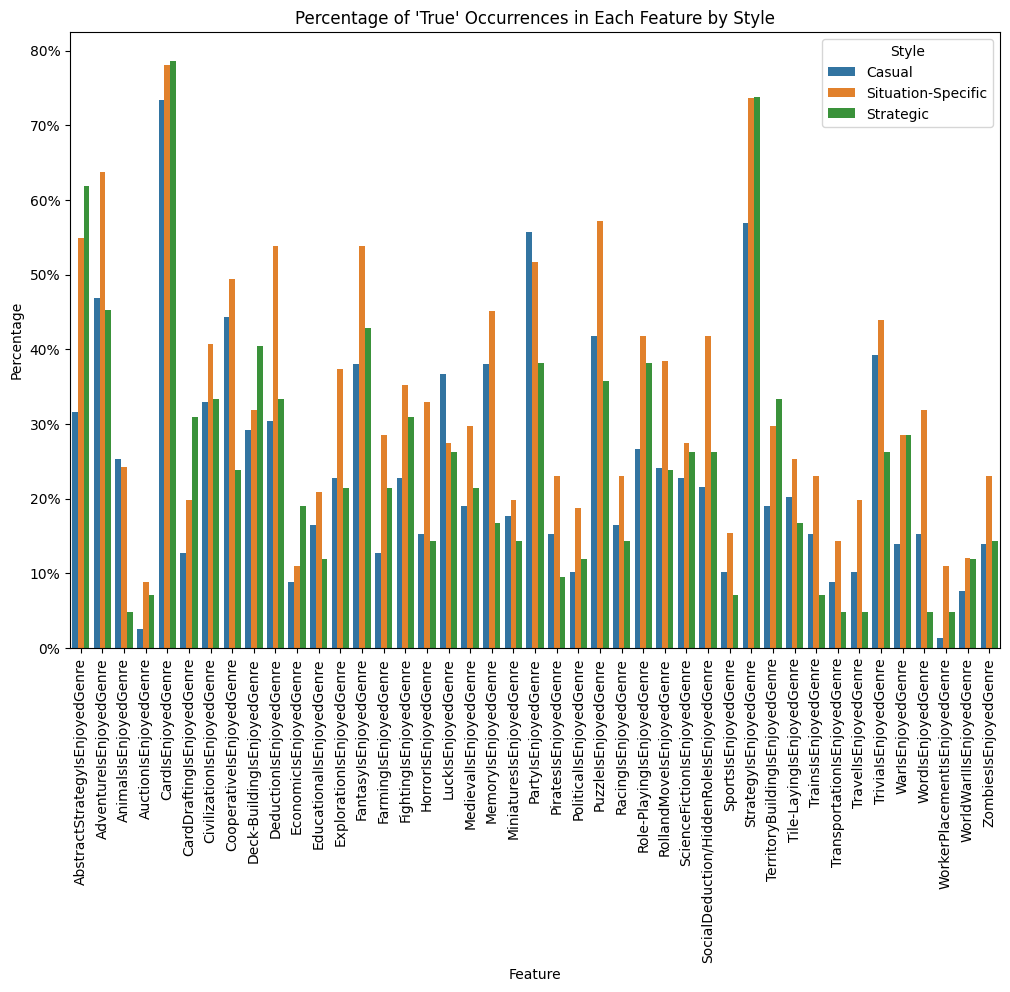

In [689]:
modified_df = cleaned_df.copy()
modified_df = filter_threshold(modified_df,"Style",20)
modified_df = modified_df[modified_df["Style"] != "Other"]


print(modified_df["Style"].value_counts())
bools_against_category(modified_df,element_bool_features,"Style")
bools_against_category(modified_df,genre_bool_features,"Style")

AOSCat
STEM                 95
Other                65
Arts & Humanities    47
Unknown              37
Name: count, dtype: int64


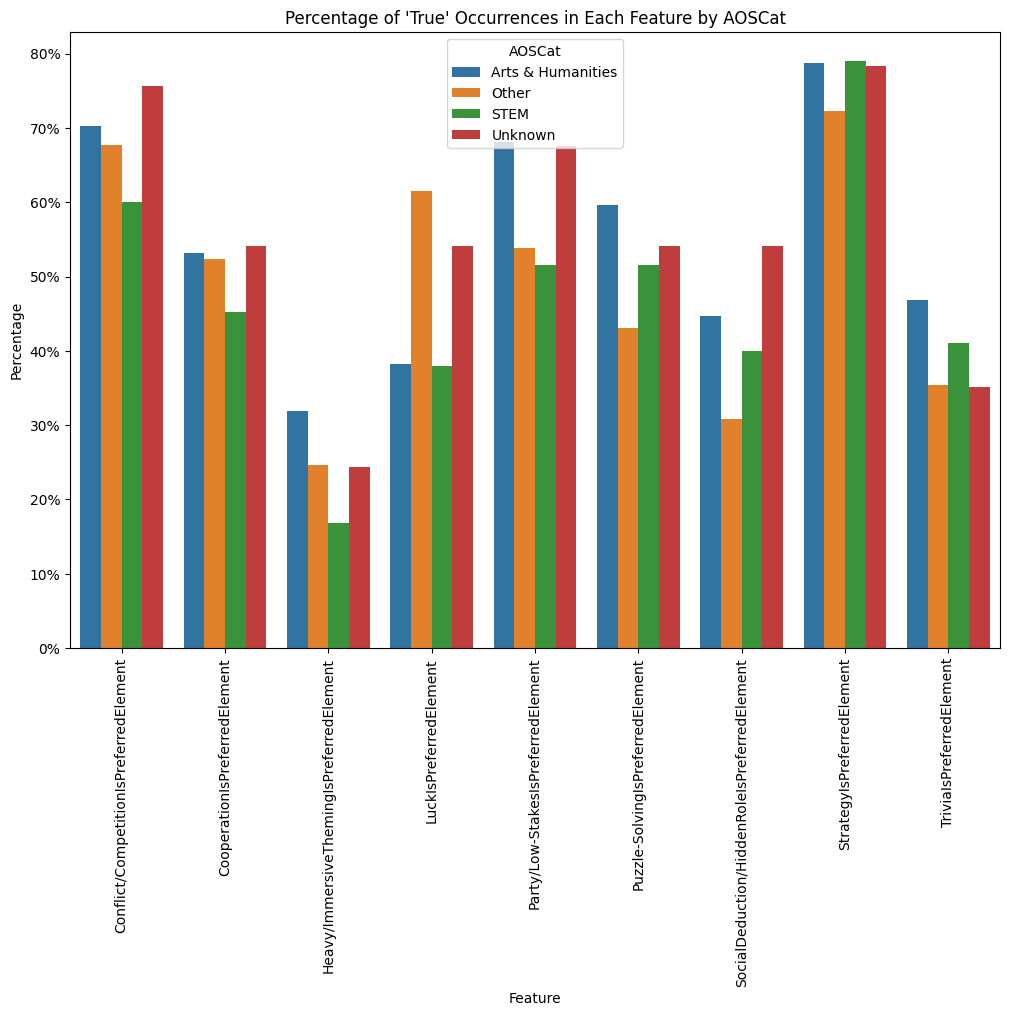

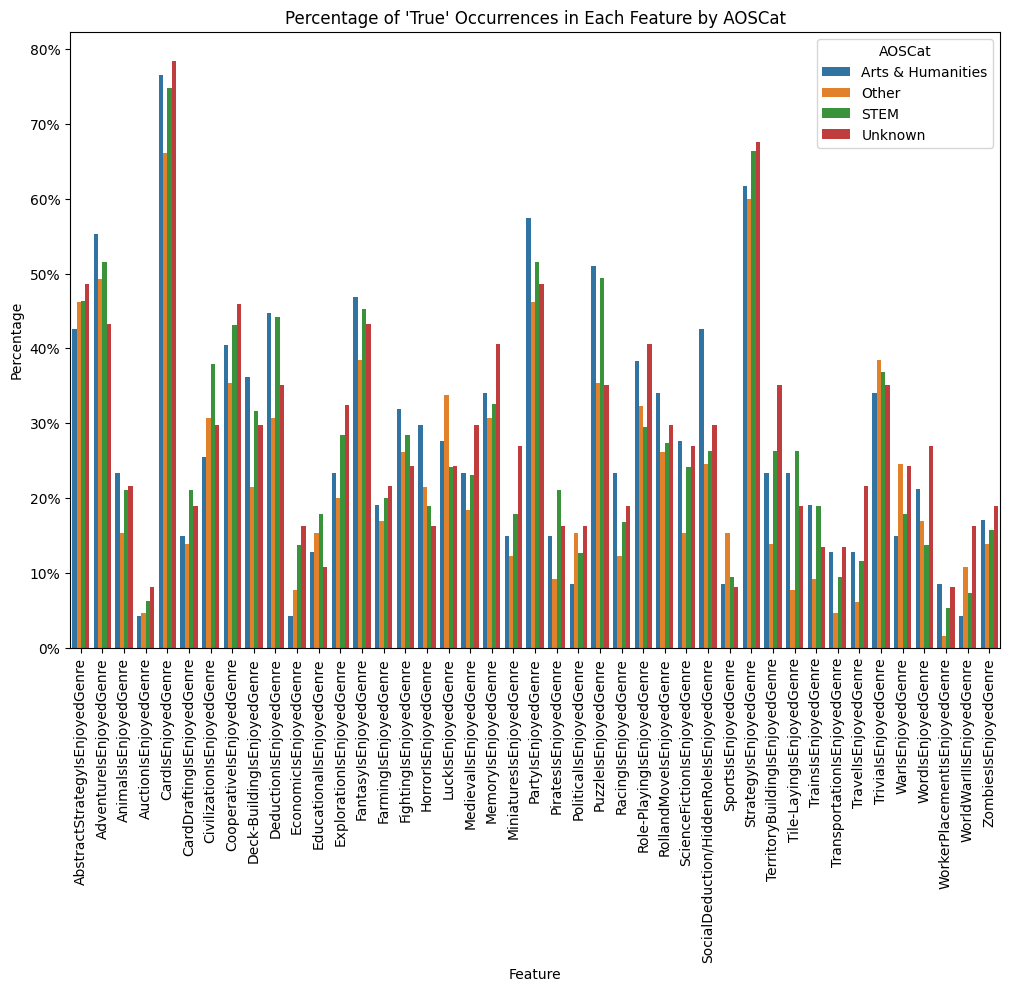

In [690]:
modified_df = cleaned_df.copy()
modified_df = filter_threshold(modified_df,"AOSCat",20)
print(modified_df["AOSCat"].value_counts())

features = single_select_features.copy()
features.remove("WWUStatus")
bools_against_category(modified_df,element_bool_features,"AOSCat")
bools_against_category(modified_df,genre_bool_features,"AOSCat")

#### Machine Learning Clustering for Exploratory Analysis

In [691]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

from sklearn.calibration import LabelEncoder
from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, make_scorer, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier


from sklearn import metrics
from sklearn.cluster import KMeans

data = cleaned_df.copy()
X = data.drop(columns=["EnjoyedBoardGames","AOS"])

onehot_and_ordinal_transform = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), ["WWUStatus","EmploymentStatus","Vision","Religiosity","EnjoysBoardGames","Gender","Style","AOSCat"]),
        ("ordinal", make_pipeline(OrdinalEncoder(categories=[["Prefer not to say", "0", "1 or 2", "2 to 5", "5 to 10", "10 to 20", "More than 20"],
                                               ["Daily", "Several times a week", "Weekly", "Several times a month", "Monthly", "Every few months", "Rarely/Seldom", "Never", "Prefer not to say"],
                                               ["Unknown", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]]),StandardScaler()),
                                                
                                               ["BoardGamesOwned",
                                                "FrequencyOfPlay",
                                                "ChessRating"]),
        ("scale numeric types", StandardScaler(), ["Age"])                      
    ], remainder="passthrough"
    )


X_transformed = onehot_and_ordinal_transform.fit_transform(X)



for i in range(2,10):
    k_means_model = KMeans(n_clusters=i, random_state=5, n_init=10)
    clusters = k_means_model.fit_predict(X_transformed)
    score = metrics.silhouette_score(X_transformed, clusters)
    print(f'Fitting for {i} clusters')
    print(f'score: {score}')
    print()


Fitting for 2 clusters
score: 0.11863466543320195

Fitting for 3 clusters
score: 0.05927103971485946

Fitting for 4 clusters
score: 0.053179399224910384

Fitting for 5 clusters
score: 0.05032617609897155

Fitting for 6 clusters
score: 0.05323918691389219

Fitting for 7 clusters
score: 0.05310292323114009

Fitting for 8 clusters
score: 0.04638618458724722

Fitting for 9 clusters
score: 0.047447314603493905



In [692]:
k_means_model = KMeans(n_clusters=2, random_state=5, n_init=10)
clusters = k_means_model.fit_predict(X_transformed)
score = metrics.silhouette_score(X_transformed, clusters)
print(f'Fitting for {2} clusters')
print(f'score: {score}')
print()

Fitting for 2 clusters
score: 0.11863466543320195



In [693]:
X["Cluster"] = k_means_model.fit_predict(X_transformed)
X

WWUStatus      Gender  Age    EmploymentStatus    Vision  \
0    WWU Student         Man   22  Employed part-time      None   
1    WWU Student         Man   20  Employed part-time  Contacts   
2    WWU Student  Non-binary   18          Unemployed      None   
3    WWU Student         Man   21  Employed part-time      None   
4    WWU Student         Man   22  Employed part-time      None   
..           ...         ...  ...                 ...       ...   
239  WWU Student         Man   19  Employed part-time      None   
240  WWU Student  Non-binary   19          Unemployed   Glasses   
241  WWU Student  Non-binary   19  Employed part-time      None   
242  WWU Student         Man   18          Unemployed   Glasses   
243  WWU Student         Man   19          Unemployed   Glasses   

            Religiosity EnjoysBoardGames BoardGamesOwned  \
0    No specific belief               No               0   
1               Atheism              Yes          2 to 5   
2               Atheism              Yes        10 to 20   
3               Atheism              Yes        10 to 20   
4          Christianity              Yes    More than 20   
..                  ...              ...             ...   
239  No specific belief               No          2 to 5   
240         Agnosticism              Yes          1 or 2   
241         Agnosticism              Yes          2 to 5   
242         Agnosticism              Yes         5 to 10   
243         Agnosticism              Yes          2 to 5   

           FrequencyOfPlay               Style  ...  \
0                    Never      Not Interested  ...   
1            Rarely/Seldom        Party/Social  ...   
2     Several times a week           Strategic  ...   
3    Several times a month           Strategic  ...   
4                   Weekly  Situation-Specific  ...   
..                     ...                 ...  ...   
239          Rarely/Seldom  Situation-Specific  ...   
240          Rarely/Seldom              Casual  ...   
241  Several times a month  Situation-Specific  ...   
242   Several times a week              Casual  ...   
243          Rarely/Seldom        Party/Social  ...   

    TransportationIsEnjoyedGenre  TravelIsEnjoyedGenre  TriviaIsEnjoyedGenre  \
0                              0                     0                     0   
1                              0                     0                     0   
2                              0                     0                     0   
3                              0                     0                     0   
4                              0                     0                     1   
..                           ...                   ...                   ...   
239                            0                     0                     0   
240                            0                     0                     0   
241                            0                     1                     1   
242                            1                     0                     1   
243                            0                     0                     0   

     WarIsEnjoyedGenre  WordIsEnjoyedGenre  WorkerPlacementIsEnjoyedGenre  \
0                    0                   0                              0   
1                    0                   0                              0   
2                    0                   0                              0   
3                    1                   0                              0   
4                    1                   1                              1   
..                 ...                 ...                            ...   
239                  0                   0                              0   
240                  0                   0                              0   
241                  0                   1                              0   
242                  0                   1                              1   
243         

In [694]:
X["Cluster"].value_counts()

Cluster
0    187
1     57
Name: count, dtype: int64

In [695]:
X["Cluster"].value_counts(normalize=True)

Cluster
0    0.766393
1    0.233607
Name: proportion, dtype: float64

Cluster  WWUStatus         
0        WWU Student           184
         WWU Faculty Member      3
1        WWU Student            56
         Neither                 1
Name: count, dtype: int64


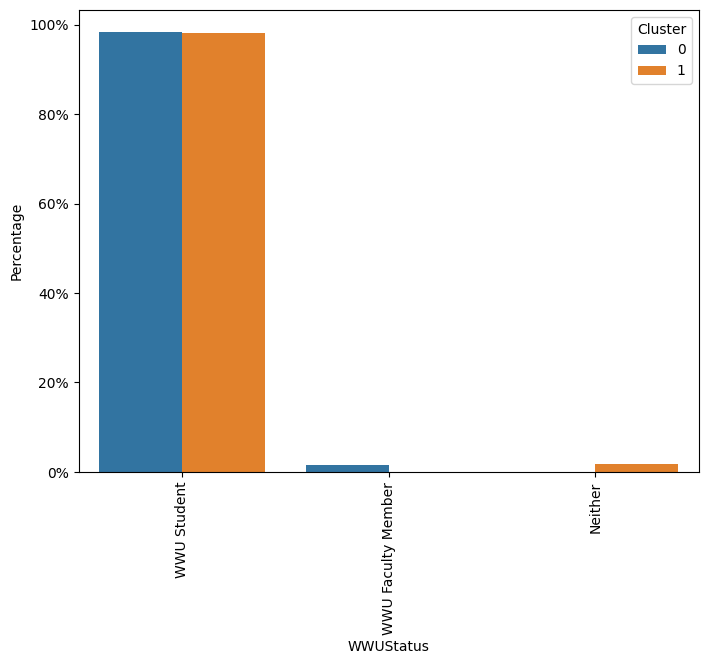

Cluster  Gender                   
0        Woman                        82
         Man                          78
         Non-binary                   17
         Genderfluid                   3
         Prefer not to say             2
         Gender-fluid                  1
         Genderqueer                   1
         Wouldn't you like to know     1
         girl thing                    1
         unsure                        1
1        Woman                        27
         Man                          23
         Non-binary                    6
         Gender queer                  1
Name: count, dtype: int64


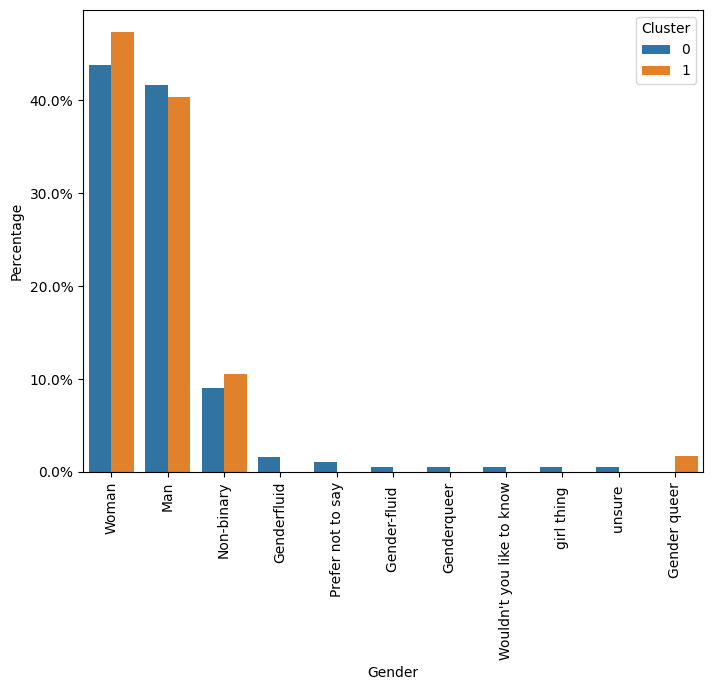

Cluster  Age
0         18    57
          19    38
          20    30
          21    24
          22    11
          23     9
         -1      7
          24     4
          26     3
          25     2
          36     1
          28     1
1         19    20
          18    12
          20    11
          21     4
          22     4
          24     2
          26     1
          23     1
         -1      1
          29     1
Name: count, dtype: int64


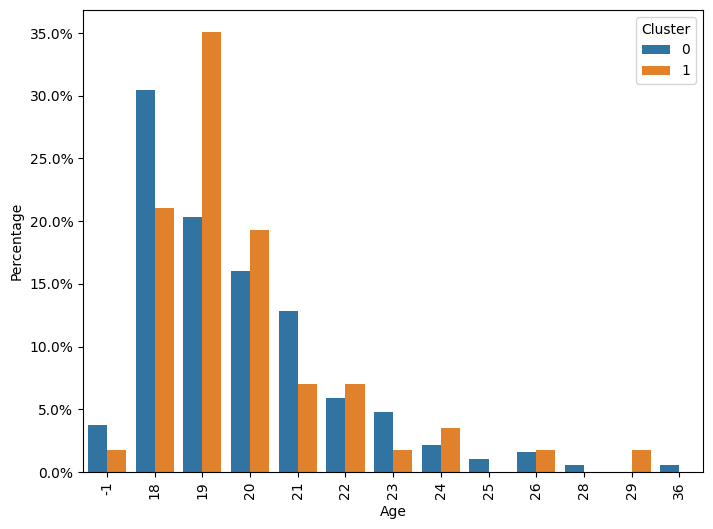

Cluster  EmploymentStatus                 
0        Unemployed                           92
         Employed part-time                   85
         Employed full-time                    3
         Self-employed                         3
         One day a week babysitting            1
         Prefer not to say                     1
         Seasonal worker during the summer     1
         Seeking employment                    1
1        Unemployed                           32
         Employed part-time                   22
         Employed full-time                    1
         Prefer not to say                     1
         Seasonally employed                   1
Name: count, dtype: int64


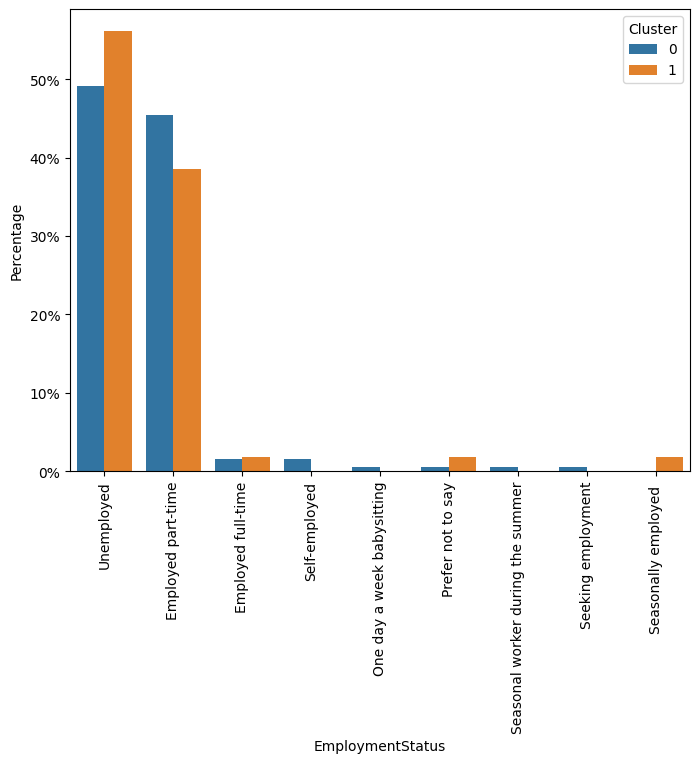

Cluster  Vision           
0        None                 108
         Glasses               53
         Both                  16
         Contacts              10
1        None                  24
         Glasses               23
         Both                   9
         Prefer not to say      1
Name: count, dtype: int64


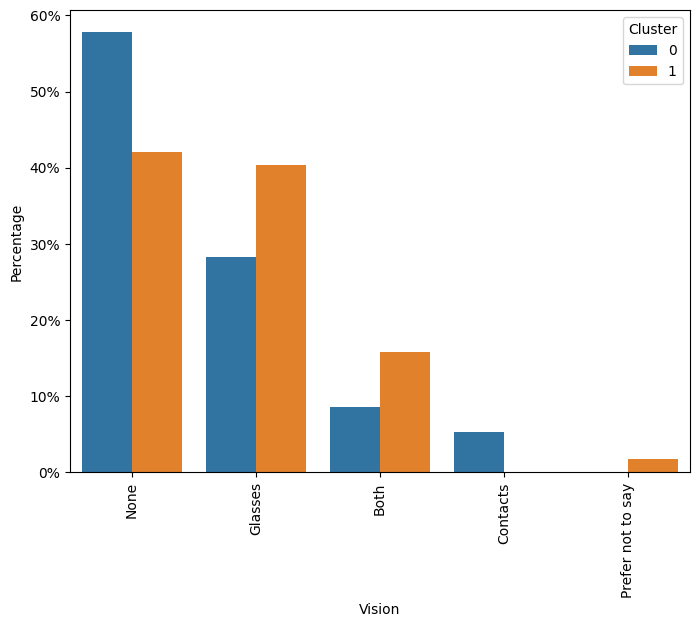

Cluster  Religiosity                                                
0        Atheism                                                        46
         No specific belief                                             40
         Agnosticism                                                    37
         Spiritual, not affiliated with a specific religion             27
         Christianity                                                   22
         Judaism                                                         3
         Prefer not to say                                               2
         pagan                                                           1
         Science                                                         1
         being with oneself in connection to everything                  1
         Toaism                                                          1
         Paganism                                                        1
         Pagan                 

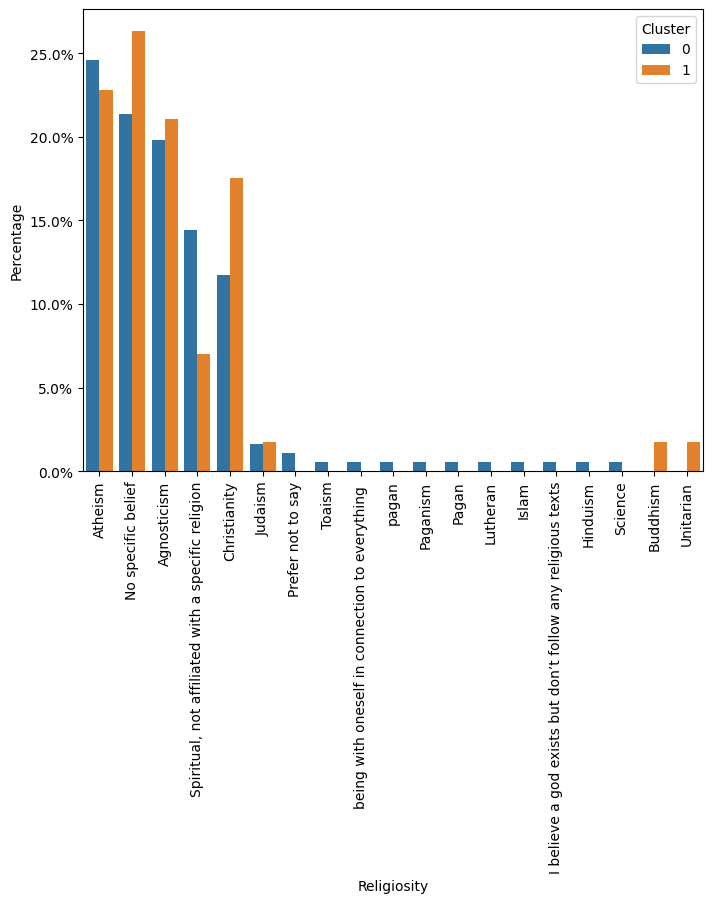

Cluster  AOSCat           
0        STEM                 74
         Arts & Humanities    33
         Unknown              26
         Education            16
         Social Studies       14
         Business              8
         Health & Medicine     8
         Other                 8
1        STEM                 21
         Arts & Humanities    14
         Unknown              11
         Social Studies        5
         Business              2
         Health & Medicine     2
         Other                 2
Name: count, dtype: int64


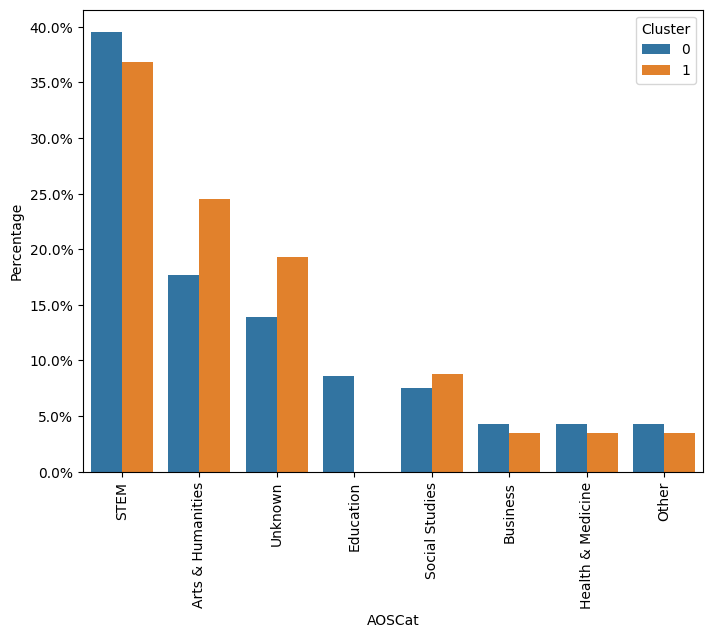

Cluster  EnjoysBoardGames 
0        Yes                  175
         No                    11
         Prefer not to say      1
1        Yes                   56
         No                     1
Name: count, dtype: int64


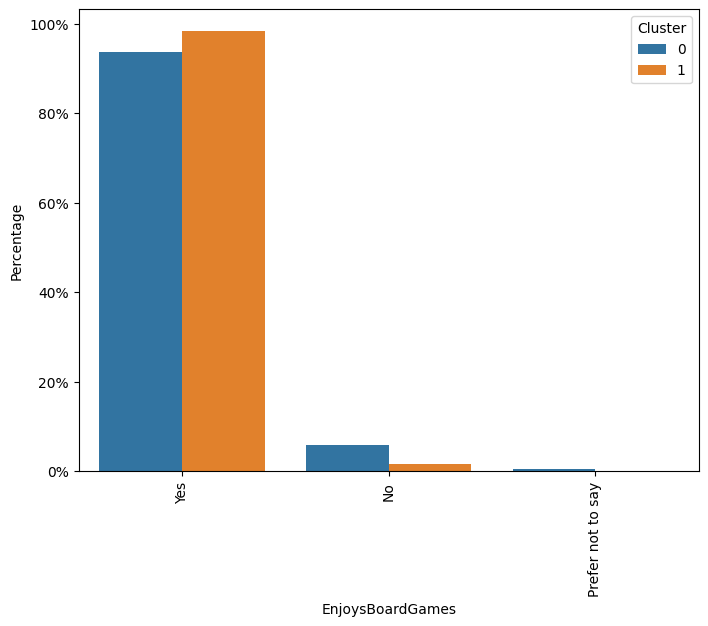

Cluster  BoardGamesOwned  
0        2 to 5               62
         1 or 2               54
         5 to 10              40
         0                    19
         10 to 20              8
         More than 20          4
         Prefer not to say     0
1        5 to 10              20
         10 to 20             12
         2 to 5               11
         More than 20          9
         1 or 2                5
         Prefer not to say     0
         0                     0
Name: count, dtype: int64


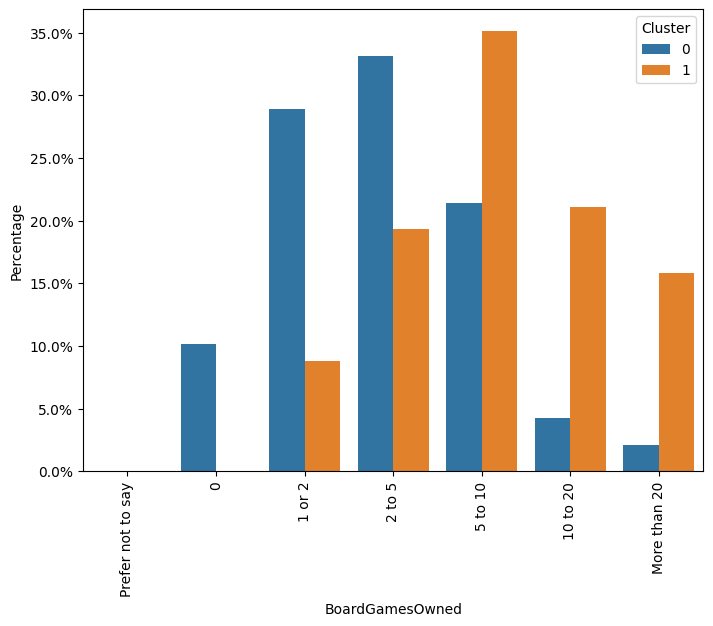

Cluster  FrequencyOfPlay      
0        Every few months         44
         Several times a month    43
         Monthly                  29
         Rarely/Seldom            28
         Weekly                   23
         Several times a week     10
         Daily                     5
         Never                     5
         Prefer not to say         0
1        Several times a month    19
         Every few months         10
         Several times a week      9
         Monthly                   8
         Weekly                    7
         Rarely/Seldom             2
         Daily                     2
         Never                     0
         Prefer not to say         0
Name: count, dtype: int64


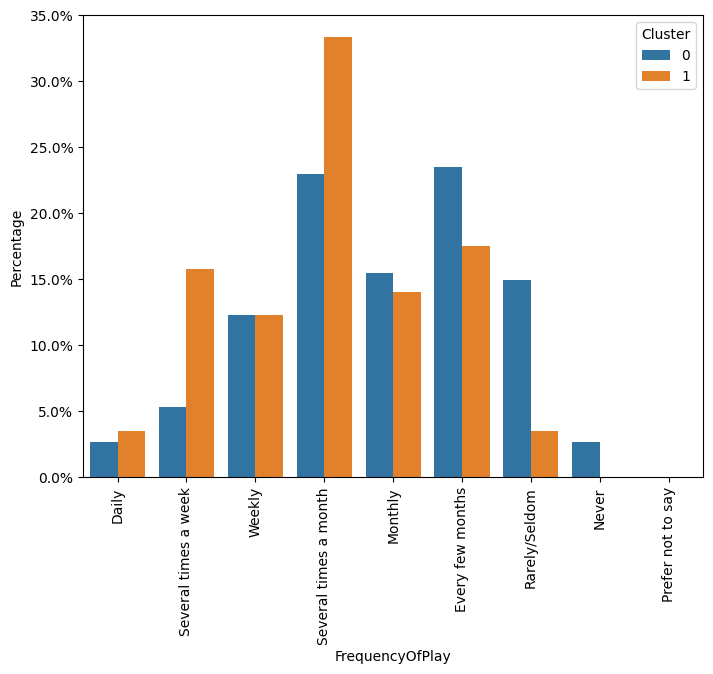

Cluster  Style             
0        Casual                68
         Situation-Specific    54
         Strategic             33
         Party/Social          19
         Simple                 8
         Not Interested         4
         Other                  1
1        Situation-Specific    37
         Casual                11
         Strategic              9
Name: count, dtype: int64


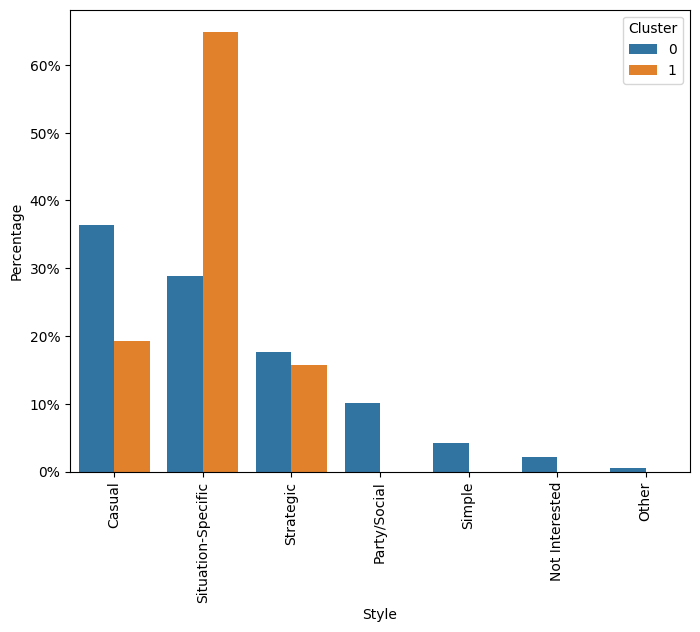

Cluster  ChessRating
0        1              37
         7              36
         2              21
         4              18
         8              18
         5              16
         6              16
         3              15
         10              5
         9               4
         Unknown         1
1        5               9
         4               8
         8               8
         6               7
         7               7
         1               6
         10              4
         3               3
         Unknown         2
         2               2
         9               1
Name: count, dtype: int64


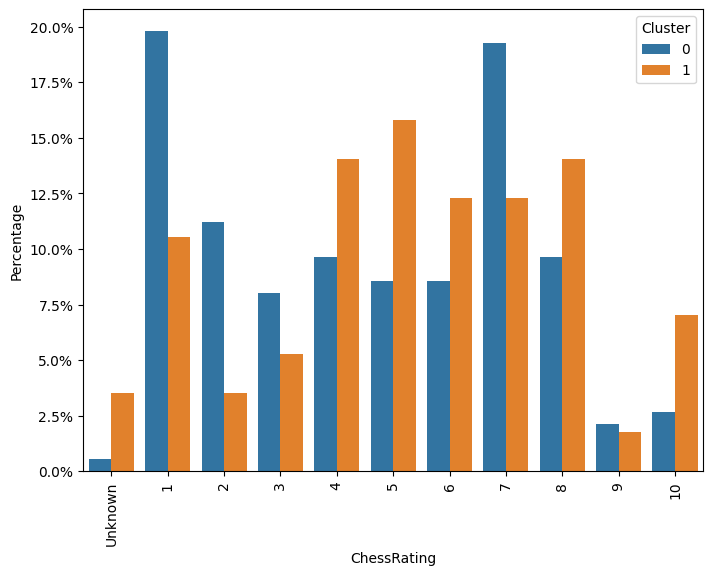

In [696]:
categories_against_category(X,single_select_features,"Cluster")

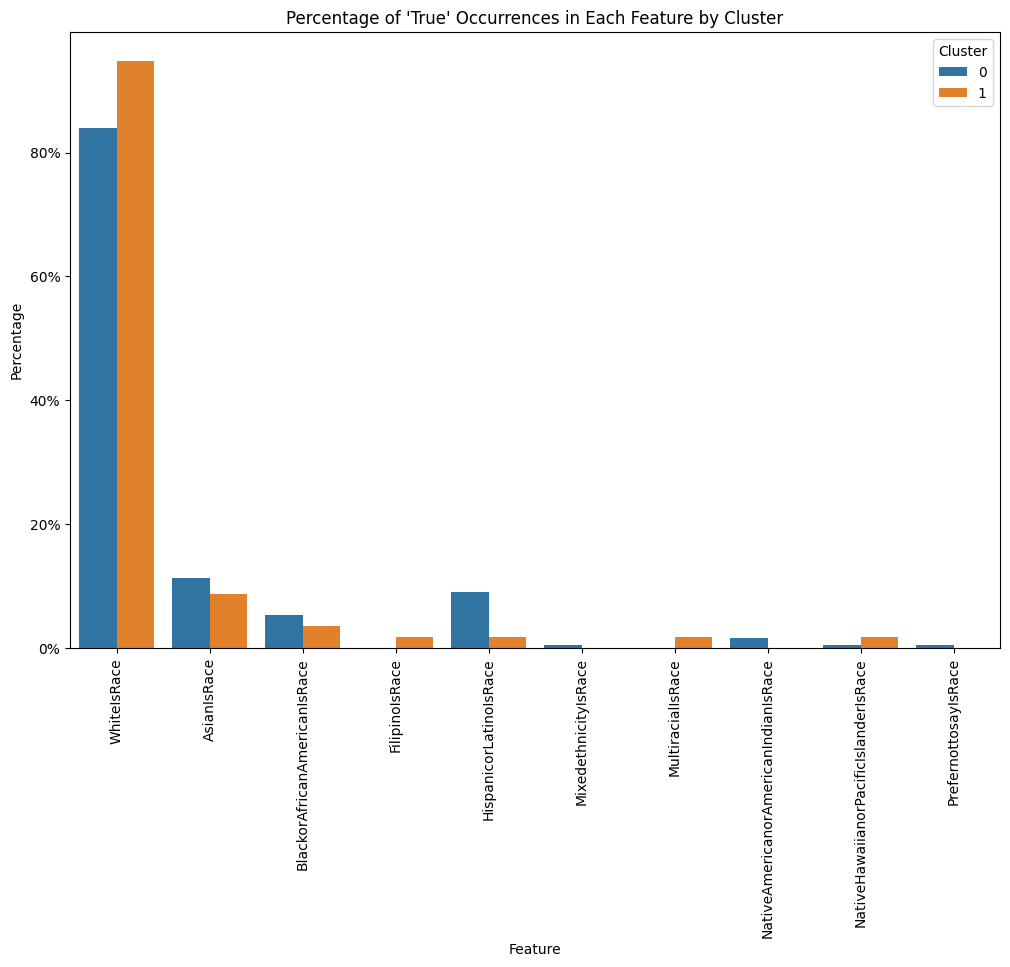

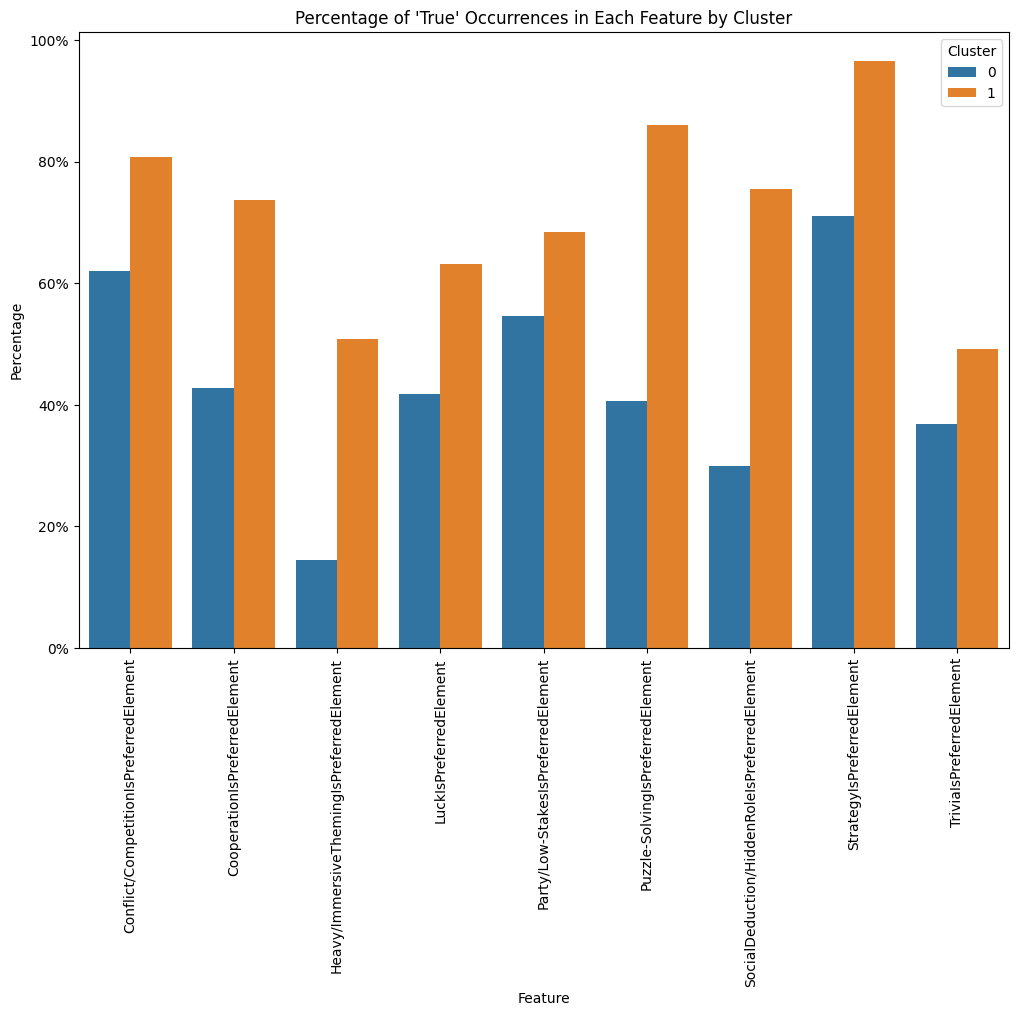

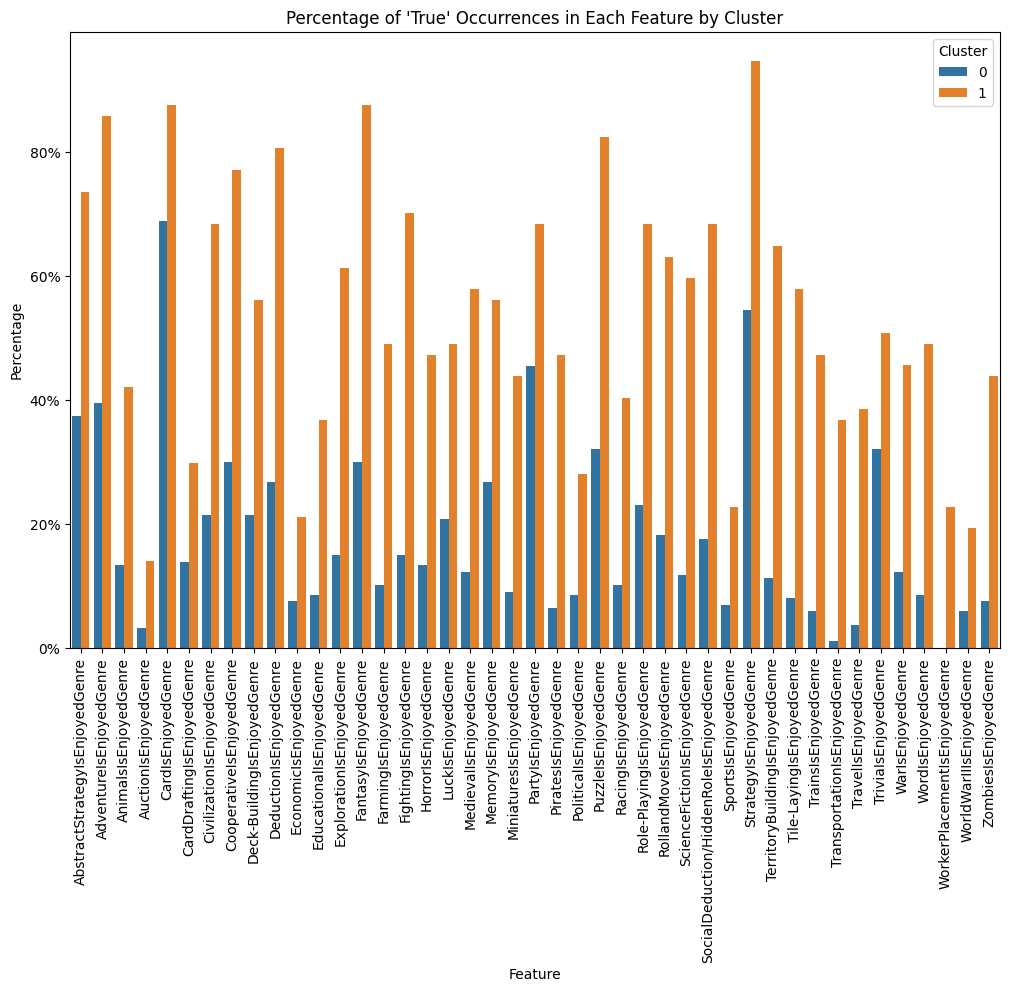

In [697]:
bools_against_category(X,race_bool_features,"Cluster")
bools_against_category(X,element_bool_features,"Cluster")
bools_against_category(X,genre_bool_features,"Cluster")

In [698]:
from sklearn.cluster import SpectralClustering

data = cleaned_df.copy()
X = data.drop(columns=["EnjoyedBoardGames","AOS","Age"])

onehot_and_ordinal_transform = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), ["WWUStatus","EmploymentStatus","Vision","Religiosity","EnjoysBoardGames","Gender","Style","AOSCat"]),
        ("ordinal", make_pipeline(OrdinalEncoder(categories=[["Prefer not to say", "0", "1 or 2", "2 to 5", "5 to 10", "10 to 20", "More than 20"],
                                               ["Daily", "Several times a week", "Weekly", "Several times a month", "Monthly", "Every few months", "Rarely/Seldom", "Never", "Prefer not to say"],
                                               ["Unknown", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]]),StandardScaler()),
                                                
                                               ["BoardGamesOwned",
                                                "FrequencyOfPlay",
                                                "ChessRating"])                
    ], remainder="passthrough"
    )


X_transformed = onehot_and_ordinal_transform.fit_transform(X)



for i in range(2,10):
    spectral_clustering_model = SpectralClustering(n_clusters=i, random_state=5, n_init=10)
    clusters = spectral_clustering_model.fit_predict(X_transformed)
    score = metrics.silhouette_score(X_transformed, clusters)
    print(f'Fitting for {i} clusters')
    print(f'score: {score}')
    print()


Fitting for 2 clusters
score: 0.14680586026949505

Fitting for 3 clusters
score: 0.10914232473605325

Fitting for 4 clusters
score: 0.10934645867499983

Fitting for 5 clusters
score: 0.024757839925838684

Fitting for 6 clusters
score: 0.0063701089375894915

Fitting for 7 clusters
score: 0.00015076200052050633

Fitting for 8 clusters
score: 0.04811153060588329

Fitting for 9 clusters
score: 0.029402134891755263



In [699]:
spectral_clustering_model = SpectralClustering(n_clusters=2, random_state=5, n_init=10)
clusters = spectral_clustering_model.fit_predict(X_transformed)
score = metrics.silhouette_score(X_transformed, clusters)
print(f'Fitting for {2} clusters')
print(f'score: {score}')
print()

Fitting for 2 clusters
score: 0.14680586026949505



In [700]:
X["Cluster"] = k_means_model.fit_predict(X_transformed)
X

WWUStatus      Gender    EmploymentStatus    Vision  \
0    WWU Student         Man  Employed part-time      None   
1    WWU Student         Man  Employed part-time  Contacts   
2    WWU Student  Non-binary          Unemployed      None   
3    WWU Student         Man  Employed part-time      None   
4    WWU Student         Man  Employed part-time      None   
..           ...         ...                 ...       ...   
239  WWU Student         Man  Employed part-time      None   
240  WWU Student  Non-binary          Unemployed   Glasses   
241  WWU Student  Non-binary  Employed part-time      None   
242  WWU Student         Man          Unemployed   Glasses   
243  WWU Student         Man          Unemployed   Glasses   

            Religiosity EnjoysBoardGames BoardGamesOwned  \
0    No specific belief               No               0   
1               Atheism              Yes          2 to 5   
2               Atheism              Yes        10 to 20   
3               Atheism              Yes        10 to 20   
4          Christianity              Yes    More than 20   
..                  ...              ...             ...   
239  No specific belief               No          2 to 5   
240         Agnosticism              Yes          1 or 2   
241         Agnosticism              Yes          2 to 5   
242         Agnosticism              Yes         5 to 10   
243         Agnosticism              Yes          2 to 5   

           FrequencyOfPlay               Style ChessRating  ...  \
0                    Never      Not Interested           3  ...   
1            Rarely/Seldom        Party/Social           6  ...   
2     Several times a week           Strategic           8  ...   
3    Several times a month           Strategic           9  ...   
4                   Weekly  Situation-Specific           7  ...   
..                     ...                 ...         ...  ...   
239          Rarely/Seldom  Situation-Specific           6  ...   
240          Rarely/Seldom              Casual           2  ...   
241  Several times a month  Situation-Specific           5  ...   
242   Several times a week              Casual           8  ...   
243          Rarely/Seldom        Party/Social           7  ...   

     TransportationIsEnjoyedGenre  TravelIsEnjoyedGenre  TriviaIsEnjoyedGenre  \
0                               0                     0                     0   
1                               0                     0                     0   
2                               0                     0                     0   
3                               0                     0                     0   
4                               0                     0                     1   
..                            ...                   ...                   ...   
239                             0                     0                     0   
240                             0                     0                     0   
241                             0                     1                     1   
242                             1                     0                     1   
243                             0                     0                     0   

     WarIsEnjoyedGenre  WordIsEnjoyedGenre  WorkerPlacementIsEnjoyedGenre  \
0                    0                   0                              0   
1                    0                   0                              0   
2                    0                   0                              0   
3                    1                   0                              0   
4                    1                   1                              1   
..                 ...                 ...                            ...   
239                  0                   0                              0   
240                  0                   0                              0   
241                  0                   1                            

In [701]:
X["Cluster"].value_counts()

Cluster
0    183
1     61
Name: count, dtype: int64

In [702]:
X["Cluster"].value_counts(normalize=True)

Cluster
0    0.75
1    0.25
Name: proportion, dtype: float64

Cluster  WWUStatus         
0        WWU Student           180
         WWU Faculty Member      3
1        WWU Student            60
         Neither                 1
Name: count, dtype: int64


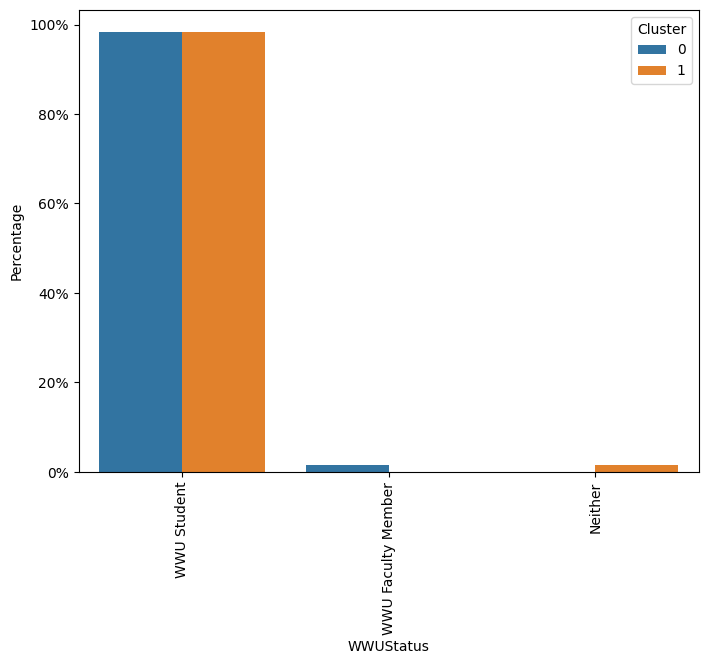

Cluster  Gender                   
0        Woman                        83
         Man                          74
         Non-binary                   16
         Genderfluid                   3
         Prefer not to say             2
         Gender-fluid                  1
         Genderqueer                   1
         Wouldn't you like to know     1
         girl thing                    1
         unsure                        1
1        Man                          27
         Woman                        26
         Non-binary                    7
         Gender queer                  1
Name: count, dtype: int64


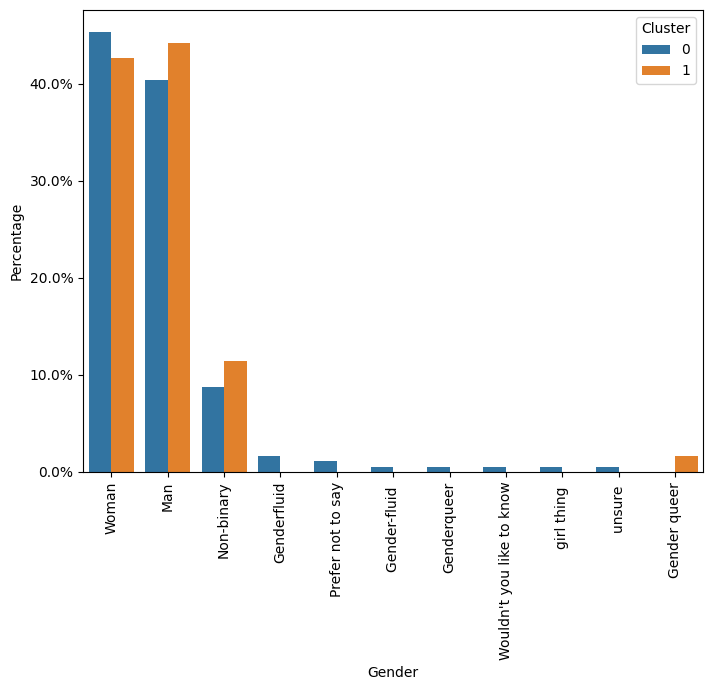

Cluster  EmploymentStatus                 
0        Unemployed                           89
         Employed part-time                   85
         Self-employed                         3
         Employed full-time                    2
         One day a week babysitting            1
         Prefer not to say                     1
         Seasonal worker during the summer     1
         Seeking employment                    1
1        Unemployed                           35
         Employed part-time                   22
         Employed full-time                    2
         Prefer not to say                     1
         Seasonally employed                   1
Name: count, dtype: int64


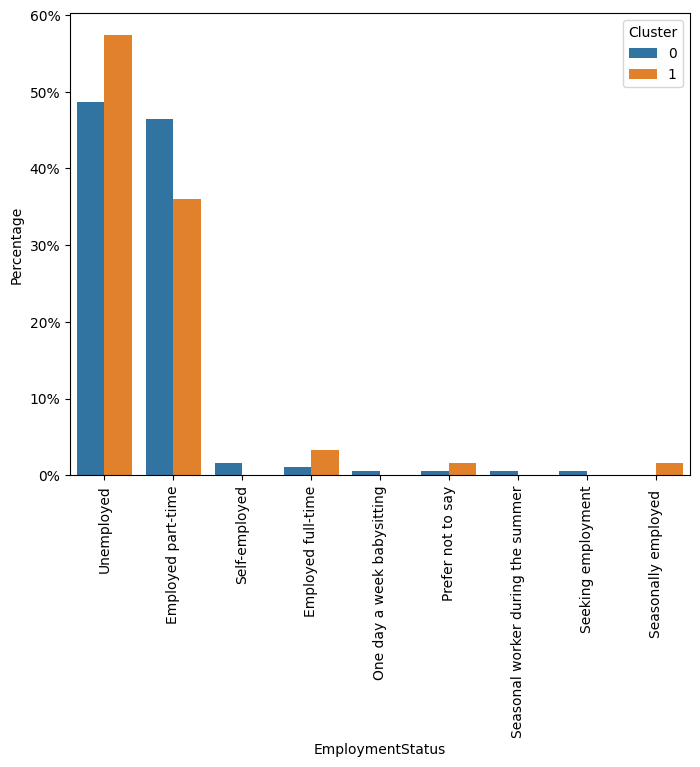

Cluster  Vision           
0        None                 107
         Glasses               51
         Both                  15
         Contacts              10
1        Glasses               25
         None                  25
         Both                  10
         Prefer not to say      1
Name: count, dtype: int64


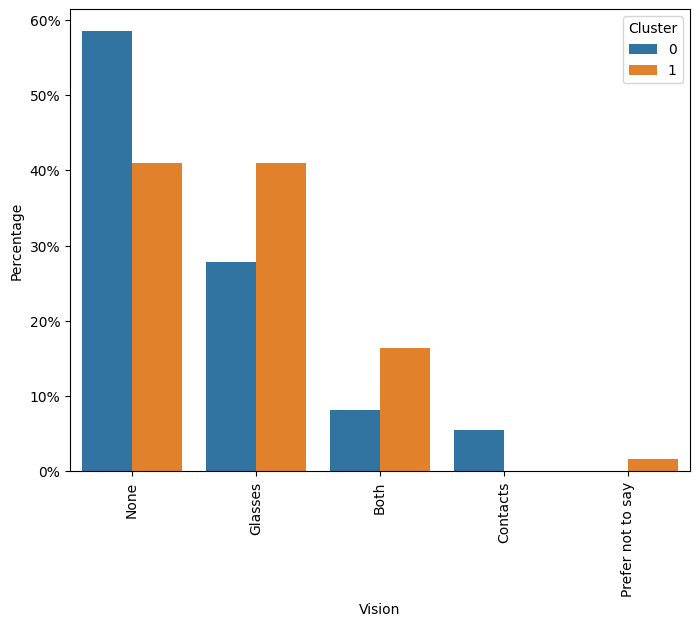

Cluster  Religiosity                                                
0        Atheism                                                        44
         No specific belief                                             40
         Agnosticism                                                    36
         Spiritual, not affiliated with a specific religion             26
         Christianity                                                   22
         Judaism                                                         3
         Prefer not to say                                               2
         pagan                                                           1
         Science                                                         1
         being with oneself in connection to everything                  1
         Toaism                                                          1
         Paganism                                                        1
         Pagan                 

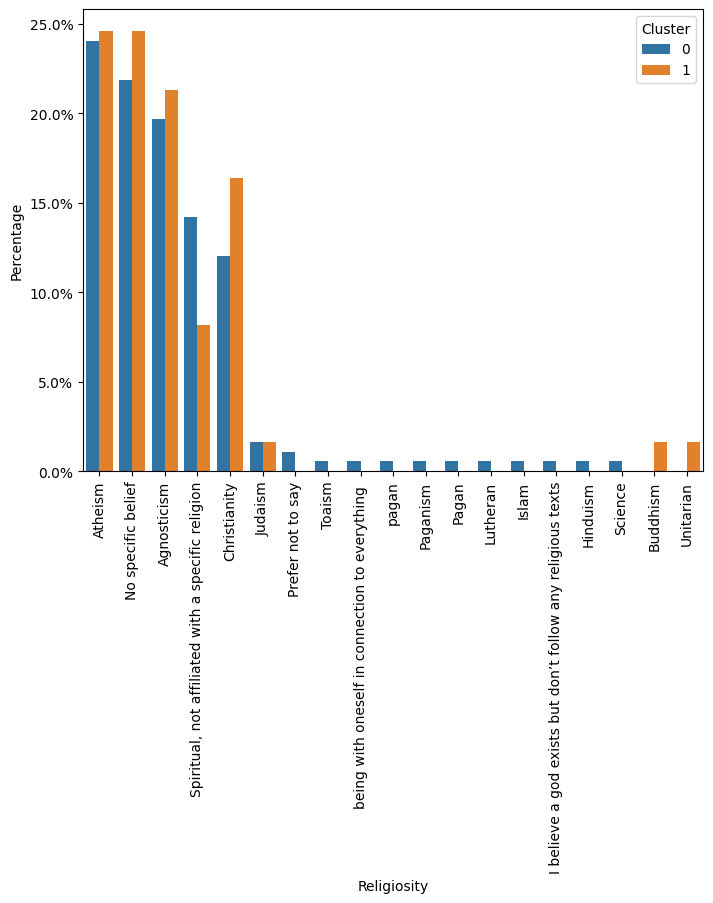

Cluster  AOSCat           
0        STEM                 71
         Arts & Humanities    33
         Unknown              26
         Education            15
         Social Studies       14
         Business              8
         Health & Medicine     8
         Other                 8
1        STEM                 24
         Arts & Humanities    14
         Unknown              11
         Social Studies        5
         Business              2
         Health & Medicine     2
         Other                 2
         Education             1
Name: count, dtype: int64


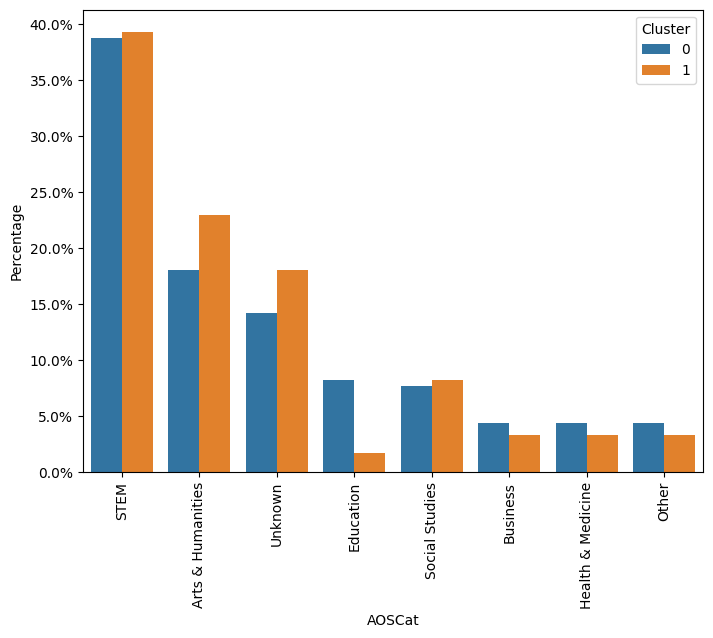

Cluster  EnjoysBoardGames 
0        Yes                  171
         No                    11
         Prefer not to say      1
1        Yes                   60
         No                     1
Name: count, dtype: int64


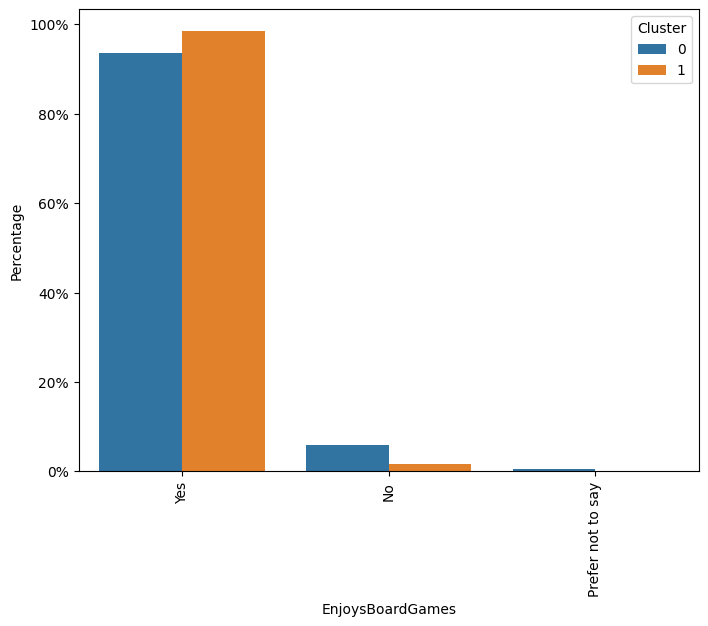

Cluster  BoardGamesOwned  
0        2 to 5               60
         1 or 2               53
         5 to 10              38
         0                    19
         10 to 20              9
         More than 20          4
         Prefer not to say     0
1        5 to 10              22
         2 to 5               13
         10 to 20             11
         More than 20          9
         1 or 2                6
         Prefer not to say     0
         0                     0
Name: count, dtype: int64


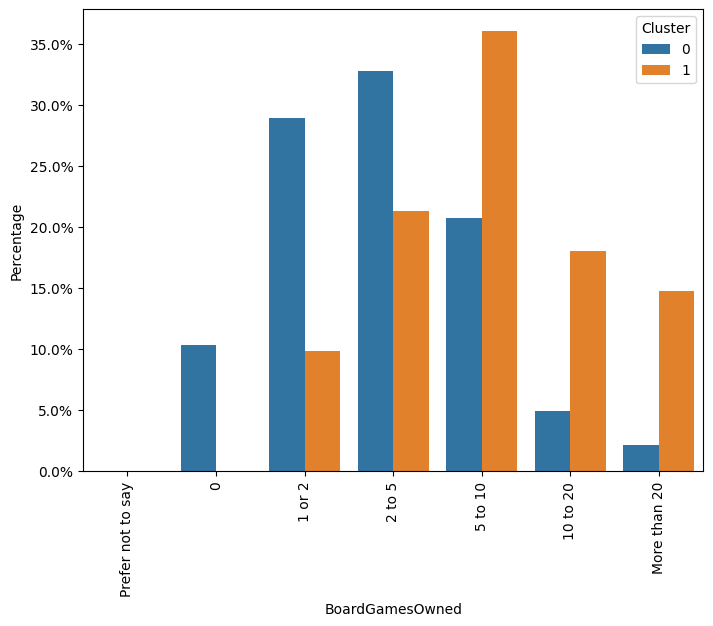

Cluster  FrequencyOfPlay      
0        Every few months         45
         Several times a month    41
         Monthly                  28
         Rarely/Seldom            27
         Weekly                   22
         Several times a week     10
         Daily                     5
         Never                     5
         Prefer not to say         0
1        Several times a month    21
         Every few months          9
         Several times a week      9
         Monthly                   9
         Weekly                    8
         Rarely/Seldom             3
         Daily                     2
         Never                     0
         Prefer not to say         0
Name: count, dtype: int64


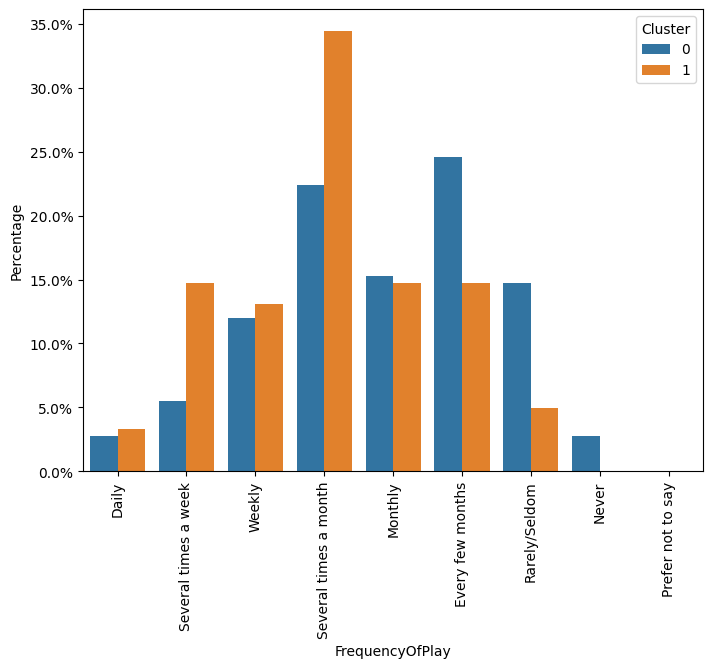

Cluster  Style             
0        Casual                66
         Situation-Specific    52
         Strategic             33
         Party/Social          19
         Simple                 8
         Not Interested         4
         Other                  1
1        Situation-Specific    39
         Casual                13
         Strategic              9
Name: count, dtype: int64


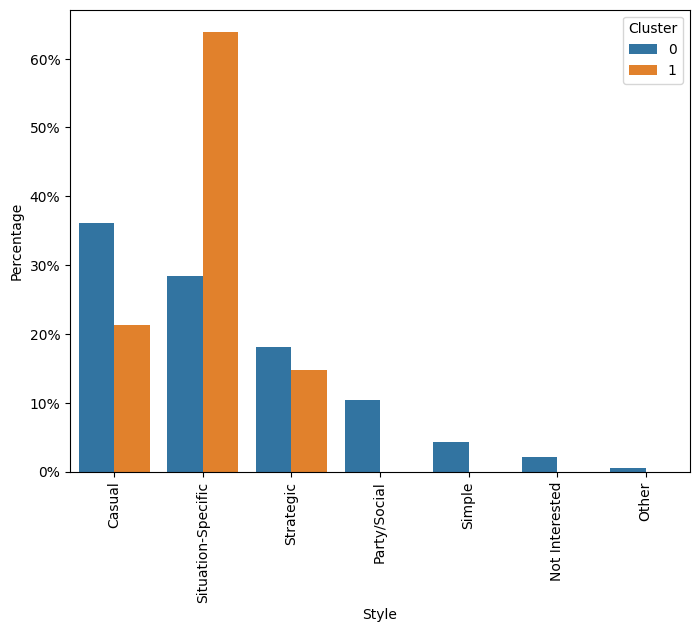

Cluster  ChessRating
0        1              36
         7              34
         2              21
         4              17
         5              17
         8              17
         6              16
         3              15
         10              5
         9               4
         Unknown         1
1        4               9
         7               9
         8               9
         5               8
         6               7
         1               7
         10              4
         3               3
         Unknown         2
         2               2
         9               1
Name: count, dtype: int64


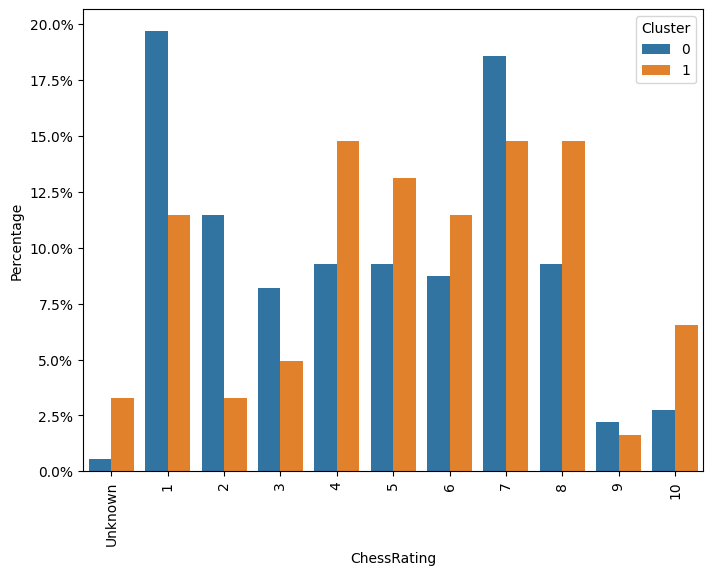

In [703]:
features = single_select_features.copy()
features.remove("Age")
categories_against_category(X,features,"Cluster")

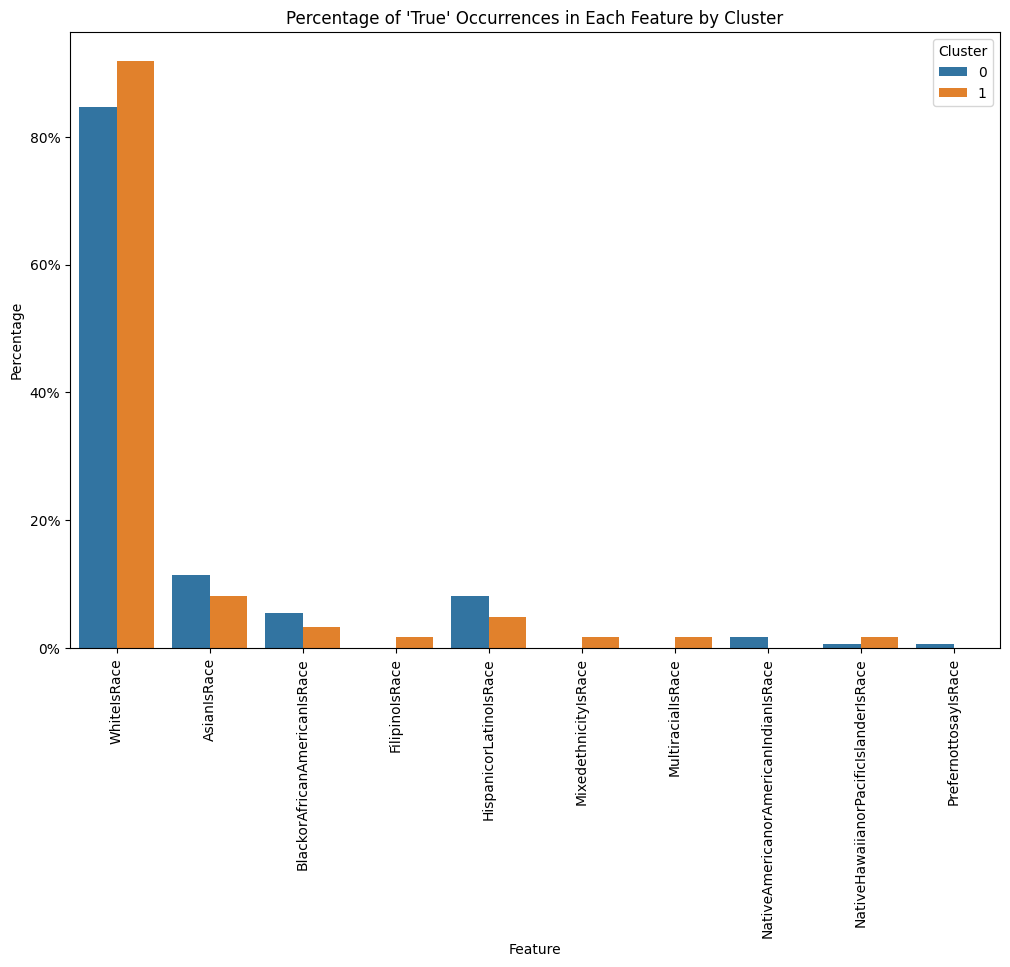

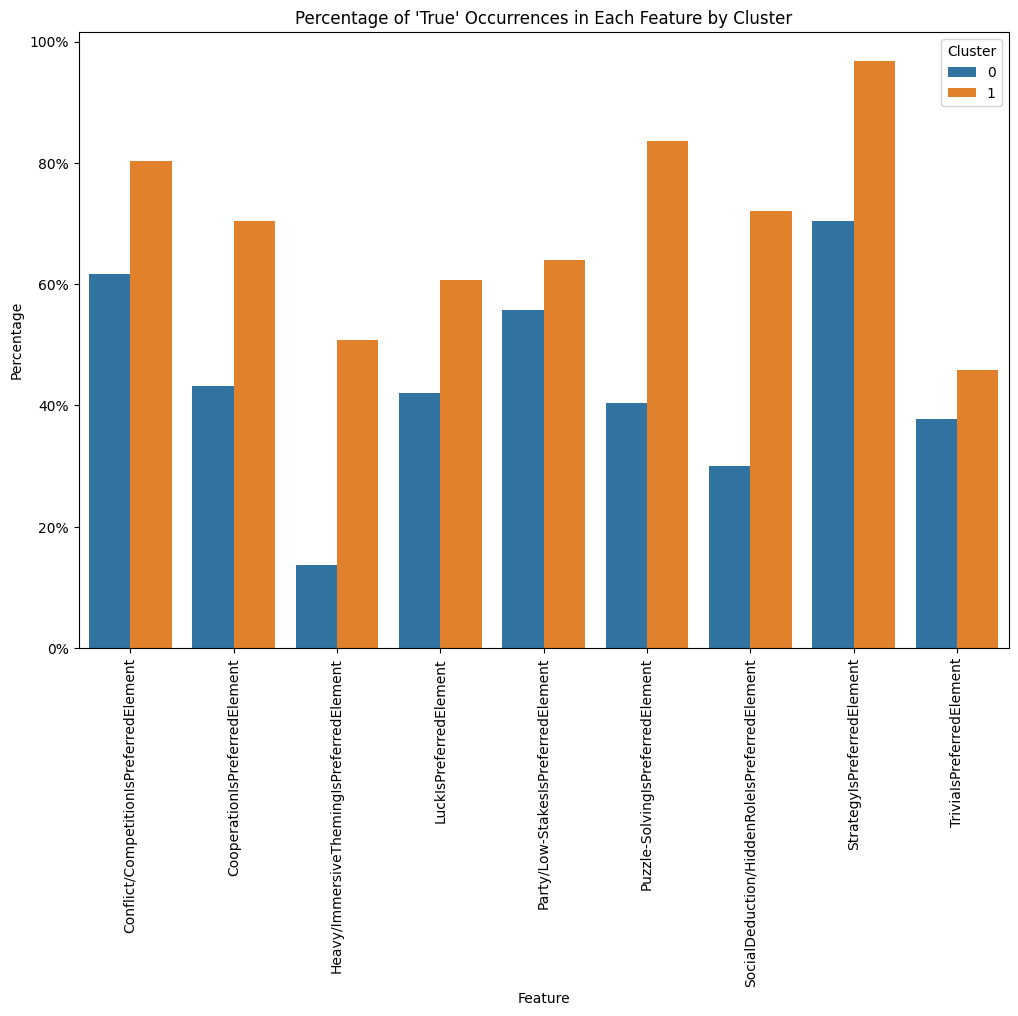

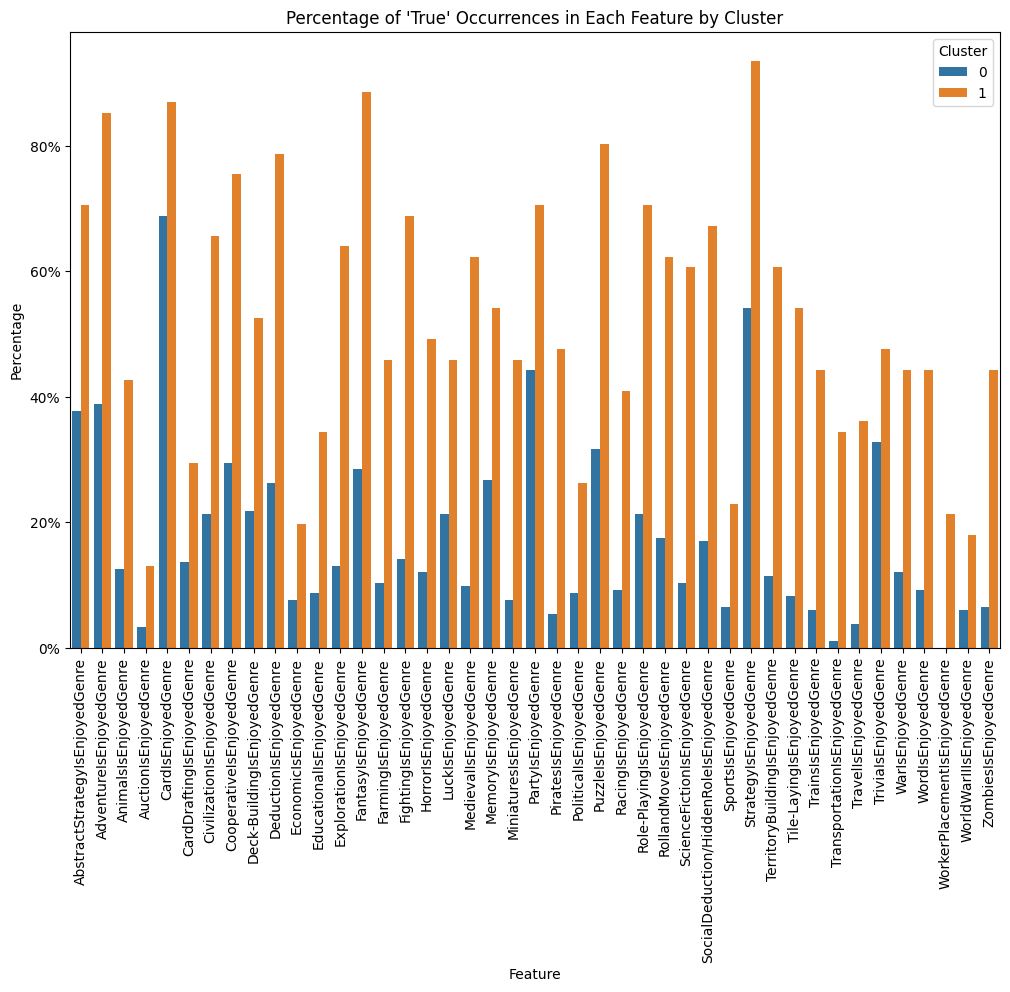

In [704]:
bools_against_category(X,race_bool_features,"Cluster")
bools_against_category(X,element_bool_features,"Cluster")
bools_against_category(X,genre_bool_features,"Cluster")

### Machine Learning Predictive Model

#### First Attempt at Machine Learning Model, Predicting Different Board Game Stats Based on Demographics

In [705]:
# load dataset
data = cleaned_df.copy()
data = data[['Gender', 'Age', 'AOSCat', 'Religiosity',
       
            "BoardGamesOwned","FrequencyOfPlay","Style","ChessRating",]]

# data = data.drop(columns=["WWUStatus","EmploymentStatus","Vision","Religiosity","AOS","EnjoysBoardGames",
#                           "EnjoyedBoardGames"])



data = filter_threshold(data,"Gender",20)
# data = data[data["Gender"] != "Other"]
#filter_threshold(data,"Age",10)["Age"].value_counts()
# data = filter_threshold
data = filter_threshold(data,"AOSCat",15)
data = filter_threshold(data,"Style",15)

data["FrequencyOfPlay"] = data["FrequencyOfPlay"].apply(lambda x: "At Least Weekly" if x in ["Daily","Several times a week","Weekly"] else x)


data["FrequencyOfPlay"] = pd.Categorical(data["FrequencyOfPlay"],
    categories=["At Least Weekly","Several times a month","Monthly","Every few months","Rarely/Seldom","Never","Prefer not to say"],ordered=True)

data["ChessRating"] = data["ChessRating"].replace('Unknown', np.nan).astype(float)

In [706]:
data = data.dropna(subset=['ChessRating'])

In [707]:
len(data)

241

Age, Gender, and AOSCat cannot predict ChessRating

In [708]:
from sklearn.linear_model import LinearRegression


X, y = data.drop(columns=["BoardGamesOwned","FrequencyOfPlay","Style","ChessRating"]), data["ChessRating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, test_size=0.5, stratify=y, random_state=10)


onehot_and_ordinal_transform = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(handle_unknown="ignore"), ["Gender","AOSCat","Religiosity" ]),
        # ("ordinal", make_pipeline(OrdinalEncoder(categories=[["Prefer not to say", "0", "1 or 2", "2 to 5", "5 to 10", "10 to 20", "More than 20"],
        #                                        ["Daily", "Several times a week", "Weekly", "Several times a month", "Monthly", "Every few months", "Rarely/Seldom", "Never", "Prefer not to say"],
        #                                        ["Unknown", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]]),StandardScaler()),
                                                
        #                                        ["BoardGamesOwned",
        #                                         "FrequencyOfPlay",
        #                                         "ChessRating"])                         
    ], remainder="passthrough"
)


linear_pipe = make_pipeline(
    onehot_and_ordinal_transform,
    LinearRegression()
)


dummy_classifier = DummyClassifier(strategy='uniform')


current_pipe = linear_pipe

print(f"Model Cross Val Scores: {cross_val_score(current_pipe,X_train,y_train,cv=3,scoring=make_scorer(r2_score))}")
print(f"Dummy Cross Val Scores: {cross_val_score(dummy_classifier,X_train,y_train,cv=3,scoring=make_scorer(r2_score))}")

Model Cross Val Scores: [-0.06687053 -0.0988698  -0.28592042]
Dummy Cross Val Scores: [-1.44601889 -1.20756063 -0.85796028]


Age, Gender, and AOSCat cannot predict BoardGamesOwned

In [709]:
data["BoardGamesOwned"]

0                 0
1            2 to 5
2          10 to 20
3          10 to 20
4      More than 20
           ...     
239          2 to 5
240          1 or 2
241          2 to 5
242         5 to 10
243          2 to 5
Name: BoardGamesOwned, Length: 241, dtype: category
Categories (7, object): ['Prefer not to say' < '0' < '1 or 2' < '2 to 5' < '5 to 10' < '10 to 20' < 'More than 20']

In [710]:
y_encoder = OrdinalEncoder()
y_translated = y_encoder.fit_transform(data["BoardGamesOwned"].values.reshape(-1, 1))

X, y = data.drop(columns=["BoardGamesOwned","FrequencyOfPlay","Style","ChessRating"]), y_translated

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, test_size=0.5, stratify=y, random_state=20)


onehot_and_ordinal_transform = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(handle_unknown="ignore"), ["Gender","AOSCat","Religiosity" ]),
        # ("ordinal", make_pipeline(OrdinalEncoder(categories=[["Prefer not to say", "0", "1 or 2", "2 to 5", "5 to 10", "10 to 20", "More than 20"],
        #                                        ["Daily", "Several times a week", "Weekly", "Several times a month", "Monthly", "Every few months", "Rarely/Seldom", "Never", "Prefer not to say"],
        #                                        ["Unknown", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]]),StandardScaler()),
                                                
        #                                        ["BoardGamesOwned",
        #                                         "FrequencyOfPlay",
        #                                         "ChessRating"])                         
    ], remainder="passthrough"
)


linear_pipe = make_pipeline(
    onehot_and_ordinal_transform,
    LinearRegression()
)


dummy_classifier = DummyClassifier(strategy='uniform')


current_pipe = linear_pipe

print(f"Model Cross Val Scores: {cross_val_score(current_pipe,X_train,y_train,cv=3,scoring=make_scorer(r2_score))}")
print(f"Dummy Cross Val Scores: {cross_val_score(dummy_classifier,X_train,y_train,cv=3,scoring=make_scorer(r2_score))}")

Model Cross Val Scores: [-0.3498374  -0.34265182 -0.10069824]
Dummy Cross Val Scores: [-1.93643688 -1.11514393 -1.27448645]


In [711]:
current_pipe.fit(X_train,y_train)
y_encoder.inverse_transform(current_pipe.predict(X_train))

array([['10 to 20'],
       ['10 to 20'],
       ['2 to 5'],
       ['2 to 5'],
       ['2 to 5'],
       ['10 to 20'],
       ['10 to 20'],
       ['10 to 20'],
       ['10 to 20'],
       ['1 or 2'],
       ['10 to 20'],
       ['10 to 20'],
       ['10 to 20'],
       ['10 to 20'],
       ['10 to 20'],
       ['2 to 5'],
       ['2 to 5'],
       ['10 to 20'],
       ['2 to 5'],
       ['10 to 20'],
       ['2 to 5'],
       ['10 to 20'],
       ['2 to 5'],
       ['10 to 20'],
       ['2 to 5'],
       ['10 to 20'],
       ['2 to 5'],
       ['10 to 20'],
       ['10 to 20'],
       ['10 to 20'],
       ['10 to 20'],
       ['10 to 20'],
       ['10 to 20'],
       ['1 or 2'],
       ['10 to 20'],
       ['10 to 20'],
       ['2 to 5'],
       ['10 to 20'],
       ['2 to 5'],
       ['10 to 20'],
       ['10 to 20'],
       ['10 to 20'],
       ['10 to 20'],
       ['1 or 2'],
       ['10 to 20'],
       ['10 to 20'],
       ['10 to 20'],
       ['2 to 5'],
       ['10 to 20'],
   

In [712]:
y_encoder.inverse_transform(y_train)

array([['2 to 5'],
       ['More than 20'],
       ['5 to 10'],
       ['5 to 10'],
       ['5 to 10'],
       ['1 or 2'],
       ['5 to 10'],
       ['2 to 5'],
       ['2 to 5'],
       ['10 to 20'],
       ['5 to 10'],
       ['5 to 10'],
       ['0'],
       ['5 to 10'],
       ['5 to 10'],
       ['5 to 10'],
       ['5 to 10'],
       ['2 to 5'],
       ['2 to 5'],
       ['1 or 2'],
       ['2 to 5'],
       ['1 or 2'],
       ['5 to 10'],
       ['2 to 5'],
       ['2 to 5'],
       ['2 to 5'],
       ['2 to 5'],
       ['More than 20'],
       ['0'],
       ['5 to 10'],
       ['1 or 2'],
       ['10 to 20'],
       ['5 to 10'],
       ['1 or 2'],
       ['10 to 20'],
       ['5 to 10'],
       ['2 to 5'],
       ['5 to 10'],
       ['2 to 5'],
       ['More than 20'],
       ['2 to 5'],
       ['1 or 2'],
       ['2 to 5'],
       ['0'],
       ['2 to 5'],
       ['10 to 20'],
       ['1 or 2'],
       ['5 to 10'],
       ['1 or 2'],
       ['10 to 20'],
       ['2 to 5'],
  

In [713]:
current_pipe.fit(X_train,y_train)

current_pipe.score(X_train,y_train)

0.21278765153429802

Age, Gender, and AOSCat cannot predict FrequencyOfPlay

In [714]:
y_encoder = OrdinalEncoder()
y_translated = y_encoder.fit_transform(data["FrequencyOfPlay"].values.reshape(-1, 1))

X, y = data.drop(columns=["BoardGamesOwned","FrequencyOfPlay","Style","ChessRating"]), y_translated

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, test_size=0.5, stratify=y, random_state=20)


onehot_and_ordinal_transform = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(handle_unknown="ignore"), ["Gender","AOSCat", "Religiosity"]),
        # ("ordinal", make_pipeline(OrdinalEncoder(categories=[["Prefer not to say", "0", "1 or 2", "2 to 5", "5 to 10", "10 to 20", "More than 20"],
        #                                        ["Daily", "Several times a week", "Weekly", "Several times a month", "Monthly", "Every few months", "Rarely/Seldom", "Never", "Prefer not to say"],
        #                                        ["Unknown", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]]),StandardScaler()),
                                                
        #                                        ["BoardGamesOwned",
        #                                         "FrequencyOfPlay",
        #                                         "ChessRating"])                         
    ], remainder="passthrough"
)


linear_pipe = make_pipeline(
    onehot_and_ordinal_transform,
    LinearRegression()
)


dummy_classifier = DummyClassifier(strategy='uniform')


current_pipe = linear_pipe

print(f"Model Cross Val Scores: {cross_val_score(current_pipe,X_train,y_train,cv=3,scoring=make_scorer(r2_score))}")
print(f"Dummy Cross Val Scores: {cross_val_score(dummy_classifier,X_train,y_train,cv=3,scoring=make_scorer(r2_score))}")

Model Cross Val Scores: [-0.23147247 -0.35061097  0.03098001]
Dummy Cross Val Scores: [-0.91789609 -0.95896757 -0.54202515]


In [720]:
y_encoder = OrdinalEncoder()
y_translated = y_encoder.fit_transform(data["FrequencyOfPlay"].values.reshape(-1, 1))

X, y = data.drop(columns=["BoardGamesOwned","FrequencyOfPlay","Style","ChessRating"]), y_translated

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, test_size=0.5, stratify=y, random_state=20)


onehot_and_ordinal_transform = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(handle_unknown="ignore"), ["Gender","AOSCat", "Religiosity"]),
        # ("ordinal", make_pipeline(OrdinalEncoder(categories=[["Prefer not to say", "0", "1 or 2", "2 to 5", "5 to 10", "10 to 20", "More than 20"],
        #                                        ["Daily", "Several times a week", "Weekly", "Several times a month", "Monthly", "Every few months", "Rarely/Seldom", "Never", "Prefer not to say"],
        #                                        ["Unknown", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]]),StandardScaler()),
                                                
        #                                        ["BoardGamesOwned",
        #                                         "FrequencyOfPlay",
        #                                         "ChessRating"])                         
    ], remainder="passthrough"
)


linear_pipe = make_pipeline(
    onehot_and_ordinal_transform,
    LinearRegression()
)


dummy_classifier = DummyClassifier(strategy='uniform')


current_pipe = linear_pipe

print(f"Model Cross Val Scores: {cross_val_score(current_pipe,X_train,y_train,cv=3,scoring=make_scorer(r2_score))}")
print(f"Dummy Cross Val Scores: {cross_val_score(dummy_classifier,X_train,y_train,cv=3,scoring=make_scorer(r2_score))}")

Model Cross Val Scores: [-0.23147247 -0.35061097  0.03098001]
Dummy Cross Val Scores: [-0.82809493 -0.71409662 -0.66776969]


In [721]:
current_pipe.fit(X_train,y_train)
y_encoder.inverse_transform(current_pipe.predict(X_train))

array([['Monthly'],
       ['Monthly'],
       ['Rarely/Seldom'],
       ['Monthly'],
       ['Every few months'],
       ['Rarely/Seldom'],
       ['Monthly'],
       ['Monthly'],
       ['Monthly'],
       ['Every few months'],
       ['Every few months'],
       ['Monthly'],
       ['Monthly'],
       ['Monthly'],
       ['Monthly'],
       ['Never'],
       ['Monthly'],
       ['Monthly'],
       ['Monthly'],
       ['Monthly'],
       ['Monthly'],
       ['Monthly'],
       ['Every few months'],
       ['Monthly'],
       ['Monthly'],
       ['Every few months'],
       ['Every few months'],
       ['Monthly'],
       ['Every few months'],
       ['Rarely/Seldom'],
       ['Monthly'],
       ['Monthly'],
       ['Monthly'],
       ['Monthly'],
       ['Every few months'],
       ['Monthly'],
       ['Monthly'],
       ['Monthly'],
       ['At Least Weekly'],
       ['Every few months'],
       ['Monthly'],
       ['Monthly'],
       ['Monthly'],
       ['Every few months'],
      

In [722]:
y_encoder.inverse_transform(y_train)

array([['Monthly'],
       ['Several times a month'],
       ['Rarely/Seldom'],
       ['At Least Weekly'],
       ['Several times a month'],
       ['Several times a month'],
       ['Several times a month'],
       ['Monthly'],
       ['Every few months'],
       ['At Least Weekly'],
       ['At Least Weekly'],
       ['Several times a month'],
       ['Several times a month'],
       ['Every few months'],
       ['Monthly'],
       ['Several times a month'],
       ['Rarely/Seldom'],
       ['Rarely/Seldom'],
       ['At Least Weekly'],
       ['Several times a month'],
       ['Monthly'],
       ['Rarely/Seldom'],
       ['Every few months'],
       ['Monthly'],
       ['At Least Weekly'],
       ['Several times a month'],
       ['At Least Weekly'],
       ['Several times a month'],
       ['Every few months'],
       ['Rarely/Seldom'],
       ['Several times a month'],
       ['Monthly'],
       ['Rarely/Seldom'],
       ['Several times a month'],
       ['Rarely/Seldom'],
      

#### Second Attempt at Building a Machine Learning Model, Predict Gender from Board Game Preferences

In [723]:
# load dataset
data = cleaned_df.copy()
data = data.drop(columns=["WWUStatus","Age","EmploymentStatus","Vision","Religiosity","AOS","AOSCat","EnjoyedBoardGames"] + race_bool_features)



data = filter_threshold(data,"Gender",40)
data = data[data["Gender"] != "Other"]
# data = filter_threshold(data,"AOSCat",15)
data = filter_threshold(data,"Style",15)


In [724]:
X, y = data.drop(columns=["Gender"]), data["Gender"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, stratify=y, random_state=40)


onehot_and_ordinal_transform = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(handle_unknown="ignore"), ["Style","EnjoysBoardGames"]),
        ("ordinal", make_pipeline(OrdinalEncoder(categories=[["Prefer not to say", "0", "1 or 2", "2 to 5", "5 to 10", "10 to 20", "More than 20"],
                                               ["Daily", "Several times a week", "Weekly", "Several times a month", "Monthly", "Every few months", "Rarely/Seldom", "Never", "Prefer not to say"],
                                               ["Unknown", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]]),StandardScaler()),
                                                
                                               ["BoardGamesOwned",
                                                "FrequencyOfPlay",
                                                "ChessRating"])                         
    ], remainder="passthrough"
)


logistic_pipe = make_pipeline(
    onehot_and_ordinal_transform,
    LogisticRegression(max_iter=10000)
)

k_neighbors_classifier_pipe = make_pipeline(
    onehot_and_ordinal_transform,
    KNeighborsClassifier()
)

decision_tree_classifier_pipe = make_pipeline(
    onehot_and_ordinal_transform,
    DecisionTreeClassifier()
)

random_forest_classifier_pipe = make_pipeline(
    onehot_and_ordinal_transform,
    RandomForestClassifier(random_state=40)
)

baseline_most_frequent = DummyClassifier(strategy='most_frequent')
baseline_uniform = DummyClassifier(strategy='uniform',random_state=40)


current_pipe = logistic_pipe

print(f"Model Cross Val Scores: {cross_val_score(current_pipe,X_train,y_train,cv=4,scoring=make_scorer(accuracy_score))}")
print(f"Dummy Cross Val Scores: {cross_val_score(baseline_most_frequent,X_train,y_train,cv=4,scoring=make_scorer(accuracy_score))}")
print(f"Dummy Cross Val Scores: {cross_val_score(baseline_uniform,X_train,y_train,cv=4,scoring=make_scorer(accuracy_score))}")

Model Cross Val Scores: [0.76190476 0.66666667 0.69047619 0.80952381]
Dummy Cross Val Scores: [0.52380952 0.52380952 0.52380952 0.5       ]
Dummy Cross Val Scores: [0.57142857 0.52380952 0.52380952 0.5       ]


In [725]:
current_pipe = k_neighbors_classifier_pipe

print(f"Model Cross Val Scores: {cross_val_score(current_pipe,X_train,y_train,cv=4,scoring=make_scorer(accuracy_score))}")
print(f"Dummy Cross Val Scores: {cross_val_score(baseline_most_frequent,X_train,y_train,cv=4,scoring=make_scorer(accuracy_score))}")
print(f"Dummy Cross Val Scores: {cross_val_score(baseline_uniform,X_train,y_train,cv=4,scoring=make_scorer(accuracy_score))}")

Model Cross Val Scores: [0.54761905 0.5952381  0.64285714 0.5952381 ]
Dummy Cross Val Scores: [0.52380952 0.52380952 0.52380952 0.5       ]
Dummy Cross Val Scores: [0.57142857 0.52380952 0.52380952 0.5       ]


In [726]:
current_pipe = decision_tree_classifier_pipe

print(f"Model Cross Val Scores: {cross_val_score(current_pipe,X_train,y_train,cv=4,scoring=make_scorer(accuracy_score))}")
print(f"Dummy Cross Val Scores: {cross_val_score(baseline_most_frequent,X_train,y_train,cv=4,scoring=make_scorer(accuracy_score))}")
print(f"Dummy Cross Val Scores: {cross_val_score(baseline_uniform,X_train,y_train,cv=4,scoring=make_scorer(accuracy_score))}")

Model Cross Val Scores: [0.5952381  0.54761905 0.57142857 0.57142857]
Dummy Cross Val Scores: [0.52380952 0.52380952 0.52380952 0.5       ]
Dummy Cross Val Scores: [0.57142857 0.52380952 0.52380952 0.5       ]


In [727]:
current_pipe = random_forest_classifier_pipe

print(f"Model Cross Val Scores: {cross_val_score(current_pipe,X_train,y_train,cv=4,scoring=make_scorer(accuracy_score))}")
print(f"Dummy Cross Val Scores: {cross_val_score(baseline_most_frequent,X_train,y_train,cv=4,scoring=make_scorer(accuracy_score))}")
print(f"Dummy Cross Val Scores: {cross_val_score(baseline_uniform,X_train,y_train,cv=4,scoring=make_scorer(accuracy_score))}")

Model Cross Val Scores: [0.5952381  0.57142857 0.69047619 0.71428571]
Dummy Cross Val Scores: [0.52380952 0.52380952 0.52380952 0.5       ]
Dummy Cross Val Scores: [0.57142857 0.52380952 0.52380952 0.5       ]


In [728]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in Random Forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier(random_state=40)

random_forest_randomized_search_cv = make_pipeline(
    onehot_and_ordinal_transform,
    RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 4, verbose=2, random_state=42, n_jobs = -1)
)

random_forest_randomized_search_cv.fit(X_train, y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Style',
                                                   'EnjoysBoardGames']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Prefer '
                                                                                               'not '
                                                                                               'to '
                                                                                               'say',
                                                                                               '0',
                                                                                               '1 '
                                                                                               'or '
                                                                                               '2',
                                                                                               '2 '
                                                                                               'to '
                                                                                               '5',
                                                                                               '5 '
                                                                                               'to '
                                                                                               '10',
                                                                                               '10 '
                                                                                               'to '
                                                                                               '20',
                                                                                               'More '
                                                                                               'than '
                                                                                               '20'],
                                                                                              ['Daily',
                                                                                               'Sev...
                ('randomizedsearchcv',
                 RandomizedSearchCV(cv=4,
                                    estimator=RandomForestClassifier(random_state=40),
                                    n_iter=100, n_jobs=-1,
                                    param_distributions={'bootstrap': [True,
                                                                       False],
                                                         'max_depth': [10, 20,
                                                                       30, 40,
                                                                       50, 60,
                                                                       70, 80,
                                                                       90, 100,
                                                                       110,
                                                                       None],
                                                         'min_samples_leaf': [1,
                                                                              2,
                                                                              4],
                                                         'min_sa

In [729]:
cv_results = random_forest_randomized_search_cv.named_steps['randomizedsearchcv'].cv_results_

In [730]:
# for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
#     print(params, 'has a cross-validated score of', mean_score)

In [731]:
random_forest_randomized_search_cv.named_steps['randomizedsearchcv'].best_params_

{'n_estimators': 2000,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 110,
 'bootstrap': True}

In [732]:
random_forest_randomized_search_cv.named_steps['randomizedsearchcv'].best_score_

0.7202380952380953

In [733]:
conf_matrix = confusion_matrix(y_test, random_forest_randomized_search_cv.predict(X_test),labels=["Man","Woman",])

print(conf_matrix)

print(f"Model Accuracy Score: {accuracy_score(random_forest_randomized_search_cv.predict(X_test),y_test)}")



baseline_most_frequent.fit(X_train, y_train)
y_pred_most_frequent = baseline_most_frequent.predict(X_test)

baseline_uniform.fit(X_train,y_train)
y_pred_uniform = baseline_uniform.predict(X_test)

print(f"Baseline Most Frequent Score: {accuracy_score(y_test, y_pred_most_frequent)}")
print(f"Baseline Uniform Score: {accuracy_score(y_test, y_pred_uniform)}")

[[15  5]
 [ 4 18]]
Model Accuracy Score: 0.7857142857142857
Baseline Most Frequent Score: 0.5238095238095238
Baseline Uniform Score: 0.42857142857142855


In [745]:
random_forest_randomized_search_cv.named_steps

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehot',
                                  OneHotEncoder(handle_unknown='ignore'),
                                  ['Style', 'EnjoysBoardGames']),
                                 ('ordinal',
                                  Pipeline(steps=[('ordinalencoder',
                                                   OrdinalEncoder(categories=[['Prefer '
                                                                               'not '
                                                                               'to '
                                                                               'say',
                                                                               '0',
                                                                               '1 '
                                                                               'or '
                                      

In [ ]:
logistic_pipe.fit(X_train,y_train)

conf_matrix = confusion_matrix(y_test, logistic_pipe.predict(X_test),labels=["Man","Woman"])

print(conf_matrix)

print(f"Model Accuracy Score: {accuracy_score(logistic_pipe.predict(X_test),y_test)}")



baseline_most_frequent.fit(X_train, y_train)
y_pred_most_frequent = baseline_most_frequent.predict(X_test)

baseline_uniform.fit(X_train,y_train)
y_pred_uniform = baseline_uniform.predict(X_test)

print(f"Baseline Most Frequent Score: {accuracy_score(y_test, y_pred_most_frequent)}")
print(f"Baseline Uniform Score: {accuracy_score(y_test, y_pred_uniform)}")

[[12  8]
 [ 5 17]]
Model Accuracy Score: 0.6904761904761905
Baseline Most Frequent Score: 0.5238095238095238
Baseline Uniform Score: 0.42857142857142855
